# TABLE OF CONTENTS:
---
* [Notebook Summary](#Notebook-Summary)
* [Setup](#Setup)
    * [Connect to Workspace](#Connect-to-Workspace)
* [Data](#Data)
    * [Overview](#Overview)
    * [Download & Extract Data](#Download-&-Extract-Data)
    * [Upload Data](#Upload-Data)
    * [Explore Data](#Explore-Data)
    * [Create and Register AML Dataset](#Create-and-Register-AML-Dataset)
---

# Notebook Summary

This notebook will download the [Stanford Dogs Dataset](http://vision.stanford.edu/aditya86/ImageNetDogs/) from the Stanford Vision website to the local compute and then upload it to the Azure Machine Learning (AML) workspace default blob storage. It will also create an AML file dataset that can be used for easy data access during the ML lifecycle.

Run this notebook from the Jupyter kernel that has been created in `00_environment_setup`.

# Setup

Append parent directory to sys path to be able to import created modules from src directory.

In [1]:
import sys
sys.path.append(os.path.dirname(os.path.abspath("")))

Automatically reload modules when changes are made.

In [2]:
%load_ext autoreload
%autoreload 2

Import libraries and modules.

In [24]:
# Import libraries
import azureml.core
import torchvision
from azureml.core import Dataset, Workspace

# Import created modules
from src.utils import download_stanford_dogs_archives, extract_stanford_dogs_archives
from src.utils import get_mean_std, load_data, load_unnormalized_train_data
from src.utils import show_image, show_batch_of_images

print(f"azureml.core version: {azureml.core.VERSION}")

azureml.core version: 1.20.0


### Connect to Workspace

In order to connect and communicate with the AML workspace, a workspace object needs to be instantiated using the AML Python SDK.

In [4]:
# Connect to the AML workspace using interactive authentication
ws = Workspace.from_config()

# Data

### Overview

The [Stanford Dogs Dataset](http://vision.stanford.edu/aditya86/ImageNetDogs/) is an image dataset that will be used to train a multiclass dog breed classification model. In total there are 120 different dog breeds/classes and 20,580 images. The dataset has been built using images and annotations from ImageNet for the task of fine-grained image categorization. The images are three-channel color images of variable pixels in size. While a file with a given train/test split can be downloaded from the website, the train dataset will be further split into a validation and train set (80:20). This will ultimately lead into a data distribution as follows:
- 9600 training images (47.65%)
- 2400 validation images (11.66%)
- 8580 test images (41.69%)

### Download & Extract Data

Download the data to the local compute.

A utility file with functions to download the dogs dataset archive files from the Stanford Vision website and to extract the archives into a format expected by the [torchvision.datasets.ImageFolder](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder) has been created (`<PROJECT_ROOT>/src/utils/data_utils.py`).

In [5]:
# Download the dataset archive files
download_stanford_dogs_archives()

0it [00:00, ?it/s]

100%|█████████▉| 792420352/793579520 [00:46<00:00, 20162740.72it/s]
0it [00:00, ?it/s]


 66%|██████▋   | 319488/481280 [00:01<00:00, 268047.17it/s]
483328it [00:01, 260145.52it/s]                            


In [6]:
# Extract the dataset archives and remove them after extraction
extract_stanford_dogs_archives()

Lists.tar archive has been extracted successfully.
File lists have been read successfully.
Extracting images.tar archive...


793583616it [01:00, 20162740.72it/s]                               
  2%|▏         | 426/20701 [00:55<43:46,  7.72it/s]


  4%|▍         | 837/20701 [01:53<55:19,  5.98it/s]  


  6%|▌         | 1232/20701 [02:48<37:03,  8.75it/s]


  8%|▊         | 1618/20701 [03:42<47:35,  6.68it/s]


  9%|▉         | 1966/20701 [04:38<1:09:41,  4.48it/s]


 11%|█         | 2326/20701 [05:32<56:51,  5.39it/s]


 13%|█▎        | 2707/20701 [06:26<41:01,  7.31it/s]


 15%|█▍        | 3097/20701 [07:22<43:28,  6.75it/s]


 17%|█▋        | 3478/20701 [08:16<31:34,  9.09it/s]


 19%|█▊        | 3860/20701 [09:10<37:53,  7.41it/s]


 20%|██        | 4231/20701 [10:08<51:50,  5.30it/s]  


 22%|██▏       | 4627/20701 [11:05<35:36,  7.52it/s]


 24%|██▍       | 5004/20701 [12:01<39:55,  6.55it/s]


 26%|██▌       | 5395/20701 [12:54<28:08,  9.06it/s]


 28%|██▊       | 5813/20701 [13:49<34:09,  7.26it/s]


 30%|███       | 6231/20701 [14:45<34:01,  7.09it/s]


 32%|███▏      | 6624/20701 [15:39<29:04,  8.07it/s]


 34%|███▍      | 7032/20701 [16:32<46:50,  4.86it/s]


 36%|███▌      | 7424/20701 [17:27<28:14,  7.83it/s]


 38%|███▊      | 7887/20701 [18:24<22:10,  9.63it/s]


 41%|████      | 8455/20701 [19:20<19:21, 10.54it/s]


 44%|████▎     | 9020/20701 [20:15<19:18, 10.08it/s]


 46%|████▋     | 9594/20701 [21:12<15:21, 12.06it/s]


 49%|████▉     | 10145/20701 [22:07<26:48,  6.56it/s]


 52%|█████▏    | 10683/20701 [23:00<16:54,  9.87it/s]


 54%|█████▍    | 11244/20701 [23:55<23:12,  6.79it/s]


 57%|█████▋    | 11796/20701 [24:49<13:01, 11.39it/s]


 60%|█████▉    | 12321/20701 [25:46<13:48, 10.12it/s]


 62%|██████▏   | 12872/20701 [26:42<25:22,  5.14it/s]


 65%|██████▍   | 13423/20701 [27:36<11:25, 10.61it/s]


 67%|██████▋   | 13970/20701 [28:30<11:59,  9.35it/s]


 70%|███████   | 14518/20701 [29:28<10:09, 10.15it/s]


 73%|███████▎  | 15035/20701 [30:27<10:04,  9.37it/s]


 75%|███████▍  | 15485/20701 [31:28<11:07,  7.82it/s]


 77%|███████▋  | 15973/20701 [32:27<08:22,  9.40it/s]


 79%|███████▉  | 16421/20701 [33:28<09:50,  7.24it/s]


 81%|████████▏ | 16851/20701 [34:23<13:15,  4.84it/s]


 84%|████████▍ | 17353/20701 [35:21<06:11,  9.00it/s]


 86%|████████▌ | 17836/20701 [36:17<09:26,  5.06it/s]


 89%|████████▊ | 18348/20701 [37:12<04:54,  8.00it/s]


 91%|█████████ | 18833/20701 [38:09<03:12,  9.73it/s]


 93%|█████████▎| 19355/20701 [39:05<02:44,  8.19it/s]


 96%|█████████▌| 19787/20701 [40:02<02:15,  6.76it/s]


 98%|█████████▊| 20231/20701 [40:59<00:55,  8.49it/s]


100%|█████████▉| 20637/20701 [42:00<00:10,  5.89it/s]


100%|██████████| 20701/20701 [42:10<00:00,  8.18it/s]


Images.tar archive has been extracted successfully.
Removing archive files.


### Upload Data

Upload the data to the default AML datastore.

In [7]:
datastore = ws.get_default_datastore()
datastore.upload(src_dir="../data", target_path="data/stanford_dogs", overwrite=True)

Uploading an estimated of 20580 files
Uploading ../data/test/n02085620-Chihuahua/n02085620_10074.jpg
Uploaded ../data/test/n02085620-Chihuahua/n02085620_10074.jpg, 1 files out of an estimated total of 20580
Uploading ../data/test/n02085620-Chihuahua/n02085620_10131.jpg
Uploaded ../data/test/n02085620-Chihuahua/n02085620_10131.jpg, 2 files out of an estimated total of 20580
Uploading ../data/test/n02085620-Chihuahua/n02085620_1073.jpg
Uploaded ../data/test/n02085620-Chihuahua/n02085620_1073.jpg, 3 files out of an estimated total of 20580
Uploading ../data/test/n02085620-Chihuahua/n02085620_11337.jpg
Uploaded ../data/test/n02085620-Chihuahua/n02085620_11337.jpg, 4 files out of an estimated total of 20580
Uploading ../data/test/n02085620-Chihuahua/n02085620_11477.jpg
Uploaded ../data/test/n02085620-Chihuahua/n02085620_11477.jpg, 5 files out of an estimated total of 20580
Uploading ../data/test/n02085620-Chihuahua/n02085620_11696.jpg
Uploaded ../data/test/n02085620-Chihuahua/n02085620_1169

Uploading ../data/test/n02085620-Chihuahua/n02085620_806.jpg
Uploaded ../data/test/n02085620-Chihuahua/n02085620_806.jpg, 63 files out of an estimated total of 20580
Uploading ../data/test/n02085782-Japanese_spaniel/n02085782_1503.jpg
Uploaded ../data/test/n02085782-Japanese_spaniel/n02085782_1503.jpg, 64 files out of an estimated total of 20580
Uploading ../data/test/n02085782-Japanese_spaniel/n02085782_1724.jpg
Uploaded ../data/test/n02085782-Japanese_spaniel/n02085782_1724.jpg, 65 files out of an estimated total of 20580
Uploading ../data/test/n02085782-Japanese_spaniel/n02085782_191.jpg
Uploaded ../data/test/n02085782-Japanese_spaniel/n02085782_191.jpg, 66 files out of an estimated total of 20580
Uploading ../data/test/n02085782-Japanese_spaniel/n02085782_1929.jpg
Uploaded ../data/test/n02085782-Japanese_spaniel/n02085782_1929.jpg, 67 files out of an estimated total of 20580
Uploading ../data/test/n02085782-Japanese_spaniel/n02085782_1964.jpg
Uploaded ../data/test/n02085782-Japanes

Uploading ../data/test/n02085936-Maltese_dog/n02085936_11541.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_11541.jpg, 143 files out of an estimated total of 20580
Uploading ../data/test/n02085936-Maltese_dog/n02085936_13378.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_13378.jpg, 144 files out of an estimated total of 20580
Uploading ../data/test/n02085936-Maltese_dog/n02085936_16014.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_16014.jpg, 145 files out of an estimated total of 20580
Uploading ../data/test/n02085936-Maltese_dog/n02085936_16188.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_16188.jpg, 146 files out of an estimated total of 20580
Uploading ../data/test/n02085936-Maltese_dog/n02085936_16331.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_16331.jpg, 147 files out of an estimated total of 20580
Uploading ../data/test/n02085936-Maltese_dog/n02085936_16998.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_16998.

Uploading ../data/test/n02085936-Maltese_dog/n02085936_3326.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_3326.jpg, 199 files out of an estimated total of 20580
Uploading ../data/test/n02085936-Maltese_dog/n02085936_3348.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_3348.jpg, 200 files out of an estimated total of 20580
Uploading ../data/test/n02085936-Maltese_dog/n02085936_4004.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_4004.jpg, 201 files out of an estimated total of 20580
Uploading ../data/test/n02085936-Maltese_dog/n02085936_4480.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_4480.jpg, 202 files out of an estimated total of 20580
Uploading ../data/test/n02085936-Maltese_dog/n02085936_4695.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_4695.jpg, 203 files out of an estimated total of 20580
Uploading ../data/test/n02085936-Maltese_dog/n02085936_4713.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_4713.jpg, 204 fil

Uploading ../data/test/n02085936-Maltese_dog/n02085936_7941.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_7941.jpg, 250 files out of an estimated total of 20580
Uploading ../data/test/n02085936-Maltese_dog/n02085936_807.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_807.jpg, 251 files out of an estimated total of 20580
Uploading ../data/test/n02085936-Maltese_dog/n02085936_8447.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_8447.jpg, 252 files out of an estimated total of 20580
Uploading ../data/test/n02085936-Maltese_dog/n02085936_8735.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_8735.jpg, 253 files out of an estimated total of 20580
Uploading ../data/test/n02085936-Maltese_dog/n02085936_8981.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_8981.jpg, 254 files out of an estimated total of 20580
Uploading ../data/test/n02085936-Maltese_dog/n02085936_899.jpg
Uploaded ../data/test/n02085936-Maltese_dog/n02085936_899.jpg, 255 files o

Uploading ../data/test/n02086240-Shih-Tzu/n02086240_1059.jpg
Uploaded ../data/test/n02086240-Shih-Tzu/n02086240_1059.jpg, 310 files out of an estimated total of 20580
Uploading ../data/test/n02086240-Shih-Tzu/n02086240_110.jpg
Uploaded ../data/test/n02086240-Shih-Tzu/n02086240_110.jpg, 311 files out of an estimated total of 20580
Uploading ../data/test/n02086240-Shih-Tzu/n02086240_11139.jpg
Uploaded ../data/test/n02086240-Shih-Tzu/n02086240_11139.jpg, 312 files out of an estimated total of 20580
Uploading ../data/test/n02086240-Shih-Tzu/n02086240_11551.jpg
Uploaded ../data/test/n02086240-Shih-Tzu/n02086240_11551.jpg, 313 files out of an estimated total of 20580
Uploading ../data/test/n02086240-Shih-Tzu/n02086240_11692.jpg
Uploaded ../data/test/n02086240-Shih-Tzu/n02086240_11692.jpg, 314 files out of an estimated total of 20580
Uploading ../data/test/n02086240-Shih-Tzu/n02086240_12057.jpg
Uploaded ../data/test/n02086240-Shih-Tzu/n02086240_12057.jpg, 315 files out of an estimated total o

Uploading ../data/test/n02086240-Shih-Tzu/n02086240_6795.jpg
Uploaded ../data/test/n02086240-Shih-Tzu/n02086240_6795.jpg, 395 files out of an estimated total of 20580
Uploading ../data/test/n02086240-Shih-Tzu/n02086240_6911.jpg
Uploaded ../data/test/n02086240-Shih-Tzu/n02086240_6911.jpg, 396 files out of an estimated total of 20580
Uploading ../data/test/n02086240-Shih-Tzu/n02086240_6992.jpg
Uploaded ../data/test/n02086240-Shih-Tzu/n02086240_6992.jpg, 397 files out of an estimated total of 20580
Uploading ../data/test/n02086240-Shih-Tzu/n02086240_7100.jpg
Uploaded ../data/test/n02086240-Shih-Tzu/n02086240_7100.jpg, 398 files out of an estimated total of 20580
Uploading ../data/test/n02086240-Shih-Tzu/n02086240_7170.jpg
Uploaded ../data/test/n02086240-Shih-Tzu/n02086240_7170.jpg, 399 files out of an estimated total of 20580
Uploading ../data/test/n02086240-Shih-Tzu/n02086240_7195.jpg
Uploaded ../data/test/n02086240-Shih-Tzu/n02086240_7195.jpg, 400 files out of an estimated total of 2058

Uploading ../data/test/n02086646-Blenheim_spaniel/n02086646_1674.jpg
Uploaded ../data/test/n02086646-Blenheim_spaniel/n02086646_1674.jpg, 445 files out of an estimated total of 20580
Uploading ../data/test/n02086646-Blenheim_spaniel/n02086646_172.jpg
Uploaded ../data/test/n02086646-Blenheim_spaniel/n02086646_172.jpg, 446 files out of an estimated total of 20580
Uploading ../data/test/n02086646-Blenheim_spaniel/n02086646_1993.jpg
Uploaded ../data/test/n02086646-Blenheim_spaniel/n02086646_1993.jpg, 447 files out of an estimated total of 20580
Uploading ../data/test/n02086646-Blenheim_spaniel/n02086646_2005.jpg
Uploaded ../data/test/n02086646-Blenheim_spaniel/n02086646_2005.jpg, 448 files out of an estimated total of 20580
Uploading ../data/test/n02086646-Blenheim_spaniel/n02086646_2011.jpg
Uploaded ../data/test/n02086646-Blenheim_spaniel/n02086646_2011.jpg, 449 files out of an estimated total of 20580
Uploading ../data/test/n02086646-Blenheim_spaniel/n02086646_2171.jpg
Uploaded ../data/t

Uploading ../data/test/n02086646-Blenheim_spaniel/n02086646_4026.jpg
Uploaded ../data/test/n02086646-Blenheim_spaniel/n02086646_4026.jpg, 492 files out of an estimated total of 20580
Uploading ../data/test/n02086646-Blenheim_spaniel/n02086646_4041.jpg
Uploaded ../data/test/n02086646-Blenheim_spaniel/n02086646_4041.jpg, 493 files out of an estimated total of 20580
Uploading ../data/test/n02086646-Blenheim_spaniel/n02086646_4045.jpg
Uploaded ../data/test/n02086646-Blenheim_spaniel/n02086646_4045.jpg, 494 files out of an estimated total of 20580
Uploading ../data/test/n02086646-Blenheim_spaniel/n02086646_4084.jpg
Uploaded ../data/test/n02086646-Blenheim_spaniel/n02086646_4084.jpg, 495 files out of an estimated total of 20580
Uploading ../data/test/n02086646-Blenheim_spaniel/n02086646_4133.jpg
Uploaded ../data/test/n02086646-Blenheim_spaniel/n02086646_4133.jpg, 496 files out of an estimated total of 20580
Uploading ../data/test/n02086646-Blenheim_spaniel/n02086646_416.jpg
Uploaded ../data/

Uploading ../data/test/n02086910-papillon/n02086910_7019.jpg
Uploaded ../data/test/n02086910-papillon/n02086910_7019.jpg, 574 files out of an estimated total of 20580
Uploading ../data/test/n02086910-papillon/n02086910_7842.jpg
Uploaded ../data/test/n02086910-papillon/n02086910_7842.jpg, 575 files out of an estimated total of 20580
Uploading ../data/test/n02086910-papillon/n02086910_7998.jpg
Uploaded ../data/test/n02086910-papillon/n02086910_7998.jpg, 576 files out of an estimated total of 20580
Uploading ../data/test/n02086910-papillon/n02086910_8120.jpg
Uploaded ../data/test/n02086910-papillon/n02086910_8120.jpg, 577 files out of an estimated total of 20580
Uploading ../data/test/n02086910-papillon/n02086910_8241.jpg
Uploaded ../data/test/n02086910-papillon/n02086910_8241.jpg, 578 files out of an estimated total of 20580
Uploading ../data/test/n02086910-papillon/n02086910_8342.jpg
Uploaded ../data/test/n02086910-papillon/n02086910_8342.jpg, 579 files out of an estimated total of 2058

Uploading ../data/test/n02087046-toy_terrier/n02087046_4575.jpg
Uploaded ../data/test/n02087046-toy_terrier/n02087046_4575.jpg, 649 files out of an estimated total of 20580
Uploading ../data/test/n02087046-toy_terrier/n02087046_6179.jpg
Uploaded ../data/test/n02087046-toy_terrier/n02087046_6179.jpg, 650 files out of an estimated total of 20580
Uploading ../data/test/n02087046-toy_terrier/n02087046_6205.jpg
Uploaded ../data/test/n02087046-toy_terrier/n02087046_6205.jpg, 651 files out of an estimated total of 20580
Uploading ../data/test/n02087046-toy_terrier/n02087046_6513.jpg
Uploaded ../data/test/n02087046-toy_terrier/n02087046_6513.jpg, 652 files out of an estimated total of 20580
Uploading ../data/test/n02087394-Rhodesian_ridgeback/n02087394_101.jpg
Uploaded ../data/test/n02087394-Rhodesian_ridgeback/n02087394_101.jpg, 653 files out of an estimated total of 20580
Uploading ../data/test/n02087394-Rhodesian_ridgeback/n02087394_10351.jpg
Uploaded ../data/test/n02087394-Rhodesian_ridgeb

Uploading ../data/test/n02087394-Rhodesian_ridgeback/n02087394_7467.jpg
Uploaded ../data/test/n02087394-Rhodesian_ridgeback/n02087394_7467.jpg, 698 files out of an estimated total of 20580
Uploading ../data/test/n02087394-Rhodesian_ridgeback/n02087394_7495.jpg
Uploaded ../data/test/n02087394-Rhodesian_ridgeback/n02087394_7495.jpg, 699 files out of an estimated total of 20580
Uploading ../data/test/n02087394-Rhodesian_ridgeback/n02087394_7644.jpg
Uploaded ../data/test/n02087394-Rhodesian_ridgeback/n02087394_7644.jpg, 700 files out of an estimated total of 20580
Uploading ../data/test/n02087394-Rhodesian_ridgeback/n02087394_7777.jpg
Uploaded ../data/test/n02087394-Rhodesian_ridgeback/n02087394_7777.jpg, 701 files out of an estimated total of 20580
Uploading ../data/test/n02087394-Rhodesian_ridgeback/n02087394_8591.jpg
Uploaded ../data/test/n02087394-Rhodesian_ridgeback/n02087394_8591.jpg, 702 files out of an estimated total of 20580
Uploading ../data/test/n02087394-Rhodesian_ridgeback/n0

Uploading ../data/test/n02088094-Afghan_hound/n02088094_1592.jpg
Uploaded ../data/test/n02088094-Afghan_hound/n02088094_1592.jpg, 751 files out of an estimated total of 20580
Uploading ../data/test/n02088094-Afghan_hound/n02088094_1611.jpg
Uploaded ../data/test/n02088094-Afghan_hound/n02088094_1611.jpg, 752 files out of an estimated total of 20580
Uploading ../data/test/n02088094-Afghan_hound/n02088094_1829.jpg
Uploaded ../data/test/n02088094-Afghan_hound/n02088094_1829.jpg, 753 files out of an estimated total of 20580
Uploading ../data/test/n02088094-Afghan_hound/n02088094_1882.jpg
Uploaded ../data/test/n02088094-Afghan_hound/n02088094_1882.jpg, 754 files out of an estimated total of 20580
Uploading ../data/test/n02088094-Afghan_hound/n02088094_2062.jpg
Uploaded ../data/test/n02088094-Afghan_hound/n02088094_2062.jpg, 755 files out of an estimated total of 20580
Uploading ../data/test/n02088094-Afghan_hound/n02088094_2131.jpg
Uploaded ../data/test/n02088094-Afghan_hound/n02088094_2131.

Uploading ../data/test/n02088094-Afghan_hound/n02088094_713.jpg
Uploaded ../data/test/n02088094-Afghan_hound/n02088094_713.jpg, 844 files out of an estimated total of 20580
Uploading ../data/test/n02088094-Afghan_hound/n02088094_890.jpg
Uploaded ../data/test/n02088094-Afghan_hound/n02088094_890.jpg, 845 files out of an estimated total of 20580
Uploading ../data/test/n02088094-Afghan_hound/n02088094_913.jpg
Uploaded ../data/test/n02088094-Afghan_hound/n02088094_913.jpg, 846 files out of an estimated total of 20580
Uploading ../data/test/n02088094-Afghan_hound/n02088094_9220.jpg
Uploaded ../data/test/n02088094-Afghan_hound/n02088094_9220.jpg, 847 files out of an estimated total of 20580
Uploading ../data/test/n02088094-Afghan_hound/n02088094_9229.jpg
Uploaded ../data/test/n02088094-Afghan_hound/n02088094_9229.jpg, 848 files out of an estimated total of 20580
Uploading ../data/test/n02088094-Afghan_hound/n02088094_93.jpg
Uploaded ../data/test/n02088094-Afghan_hound/n02088094_93.jpg, 849 f

Uploading ../data/test/n02088238-basset/n02088238_9933.jpg
Uploaded ../data/test/n02088238-basset/n02088238_9933.jpg, 920 files out of an estimated total of 20580
Uploading ../data/test/n02088238-basset/n02088238_9947.jpg
Uploaded ../data/test/n02088238-basset/n02088238_9947.jpg, 921 files out of an estimated total of 20580
Uploading ../data/test/n02088364-beagle/n02088364_10108.jpg
Uploaded ../data/test/n02088364-beagle/n02088364_10108.jpg, 922 files out of an estimated total of 20580
Uploading ../data/test/n02088364-beagle/n02088364_10296.jpg
Uploaded ../data/test/n02088364-beagle/n02088364_10296.jpg, 923 files out of an estimated total of 20580
Uploading ../data/test/n02088364-beagle/n02088364_10575.jpg
Uploaded ../data/test/n02088364-beagle/n02088364_10575.jpg, 924 files out of an estimated total of 20580
Uploading ../data/test/n02088364-beagle/n02088364_10585.jpg
Uploaded ../data/test/n02088364-beagle/n02088364_10585.jpg, 925 files out of an estimated total of 20580
Uploading ../d

Uploading ../data/test/n02088364-beagle/n02088364_15787.jpg
Uploaded ../data/test/n02088364-beagle/n02088364_15787.jpg, 976 files out of an estimated total of 20580
Uploading ../data/test/n02088364-beagle/n02088364_17167.jpg
Uploaded ../data/test/n02088364-beagle/n02088364_17167.jpg, 977 files out of an estimated total of 20580
Uploading ../data/test/n02088364-beagle/n02088364_17406.jpg
Uploaded ../data/test/n02088364-beagle/n02088364_17406.jpg, 978 files out of an estimated total of 20580
Uploading ../data/test/n02088364-beagle/n02088364_17474.jpg
Uploaded ../data/test/n02088364-beagle/n02088364_17474.jpg, 979 files out of an estimated total of 20580
Uploading ../data/test/n02088364-beagle/n02088364_17553.jpg
Uploaded ../data/test/n02088364-beagle/n02088364_17553.jpg, 980 files out of an estimated total of 20580
Uploading ../data/test/n02088364-beagle/n02088364_2106.jpg
Uploaded ../data/test/n02088364-beagle/n02088364_2106.jpg, 981 files out of an estimated total of 20580
Uploading ..

Uploading ../data/test/n02088466-bloodhound/n02088466_6901.jpg
Uploaded ../data/test/n02088466-bloodhound/n02088466_6901.jpg, 1045 files out of an estimated total of 20580
Uploading ../data/test/n02088466-bloodhound/n02088466_7048.jpg
Uploaded ../data/test/n02088466-bloodhound/n02088466_7048.jpg, 1046 files out of an estimated total of 20580
Uploading ../data/test/n02088466-bloodhound/n02088466_7091.jpg
Uploaded ../data/test/n02088466-bloodhound/n02088466_7091.jpg, 1047 files out of an estimated total of 20580
Uploading ../data/test/n02088466-bloodhound/n02088466_7162.jpg
Uploaded ../data/test/n02088466-bloodhound/n02088466_7162.jpg, 1048 files out of an estimated total of 20580
Uploading ../data/test/n02088466-bloodhound/n02088466_7178.jpg
Uploaded ../data/test/n02088466-bloodhound/n02088466_7178.jpg, 1049 files out of an estimated total of 20580
Uploading ../data/test/n02088466-bloodhound/n02088466_7191.jpg
Uploaded ../data/test/n02088466-bloodhound/n02088466_7191.jpg, 1050 files out

Uploading ../data/test/n02088466-bloodhound/n02088466_9058.jpg
Uploaded ../data/test/n02088466-bloodhound/n02088466_9058.jpg, 1095 files out of an estimated total of 20580
Uploading ../data/test/n02088466-bloodhound/n02088466_9245.jpg
Uploaded ../data/test/n02088466-bloodhound/n02088466_9245.jpg, 1096 files out of an estimated total of 20580
Uploading ../data/test/n02088466-bloodhound/n02088466_9356.jpg
Uploaded ../data/test/n02088466-bloodhound/n02088466_9356.jpg, 1097 files out of an estimated total of 20580
Uploading ../data/test/n02088632-bluetick/n02088632_101.jpg
Uploaded ../data/test/n02088632-bluetick/n02088632_101.jpg, 1098 files out of an estimated total of 20580
Uploading ../data/test/n02088632-bluetick/n02088632_108.jpg
Uploaded ../data/test/n02088632-bluetick/n02088632_108.jpg, 1099 files out of an estimated total of 20580
Uploading ../data/test/n02088632-bluetick/n02088632_1173.jpg
Uploaded ../data/test/n02088632-bluetick/n02088632_1173.jpg, 1100 files out of an estimated

Uploading ../data/test/n02088632-bluetick/n02088632_562.jpg
Uploaded ../data/test/n02088632-bluetick/n02088632_562.jpg, 1168 files out of an estimated total of 20580
Uploading ../data/test/n02089078-black-and-tan_coonhound/n02089078_1472.jpg
Uploaded ../data/test/n02089078-black-and-tan_coonhound/n02089078_1472.jpg, 1169 files out of an estimated total of 20580
Uploading ../data/test/n02089078-black-and-tan_coonhound/n02089078_1617.jpg
Uploaded ../data/test/n02089078-black-and-tan_coonhound/n02089078_1617.jpg, 1170 files out of an estimated total of 20580
Uploading ../data/test/n02089078-black-and-tan_coonhound/n02089078_1680.jpg
Uploaded ../data/test/n02089078-black-and-tan_coonhound/n02089078_1680.jpg, 1171 files out of an estimated total of 20580
Uploading ../data/test/n02089078-black-and-tan_coonhound/n02089078_1735.jpg
Uploaded ../data/test/n02089078-black-and-tan_coonhound/n02089078_1735.jpg, 1172 files out of an estimated total of 20580
Uploading ../data/test/n02089078-black-and

Uploading ../data/test/n02089867-Walker_hound/n02089867_1599.jpg
Uploaded ../data/test/n02089867-Walker_hound/n02089867_1599.jpg, 1238 files out of an estimated total of 20580
Uploading ../data/test/n02089867-Walker_hound/n02089867_1882.jpg
Uploaded ../data/test/n02089867-Walker_hound/n02089867_1882.jpg, 1239 files out of an estimated total of 20580
Uploading ../data/test/n02089867-Walker_hound/n02089867_2010.jpg
Uploaded ../data/test/n02089867-Walker_hound/n02089867_2010.jpg, 1240 files out of an estimated total of 20580
Uploading ../data/test/n02089867-Walker_hound/n02089867_2446.jpg
Uploaded ../data/test/n02089867-Walker_hound/n02089867_2446.jpg, 1241 files out of an estimated total of 20580
Uploading ../data/test/n02089867-Walker_hound/n02089867_2559.jpg
Uploaded ../data/test/n02089867-Walker_hound/n02089867_2559.jpg, 1242 files out of an estimated total of 20580
Uploading ../data/test/n02089867-Walker_hound/n02089867_2582.jpg
Uploaded ../data/test/n02089867-Walker_hound/n02089867_

Uploading ../data/test/n02089973-English_foxhound/n02089973_3159.jpg
Uploaded ../data/test/n02089973-English_foxhound/n02089973_3159.jpg, 1313 files out of an estimated total of 20580
Uploading ../data/test/n02089973-English_foxhound/n02089973_3243.jpg
Uploaded ../data/test/n02089973-English_foxhound/n02089973_3243.jpg, 1314 files out of an estimated total of 20580
Uploading ../data/test/n02089973-English_foxhound/n02089973_3307.jpg
Uploaded ../data/test/n02089973-English_foxhound/n02089973_3307.jpg, 1315 files out of an estimated total of 20580
Uploading ../data/test/n02089973-English_foxhound/n02089973_3426.jpg
Uploaded ../data/test/n02089973-English_foxhound/n02089973_3426.jpg, 1316 files out of an estimated total of 20580
Uploading ../data/test/n02089973-English_foxhound/n02089973_3480.jpg
Uploaded ../data/test/n02089973-English_foxhound/n02089973_3480.jpg, 1317 files out of an estimated total of 20580
Uploading ../data/test/n02089973-English_foxhound/n02089973_3820.jpg
Uploaded ..

Uploading ../data/test/n02090379-redbone/n02090379_709.jpg
Uploaded ../data/test/n02090379-redbone/n02090379_709.jpg, 1371 files out of an estimated total of 20580
Uploading ../data/test/n02090379-redbone/n02090379_859.jpg
Uploaded ../data/test/n02090379-redbone/n02090379_859.jpg, 1372 files out of an estimated total of 20580
Uploading ../data/test/n02090622-borzoi/n02090622_10343.jpg
Uploaded ../data/test/n02090622-borzoi/n02090622_10343.jpg, 1373 files out of an estimated total of 20580
Uploading ../data/test/n02090622-borzoi/n02090622_1047.jpg
Uploaded ../data/test/n02090622-borzoi/n02090622_1047.jpg, 1374 files out of an estimated total of 20580
Uploading ../data/test/n02090622-borzoi/n02090622_1253.jpg
Uploaded ../data/test/n02090622-borzoi/n02090622_1253.jpg, 1375 files out of an estimated total of 20580
Uploading ../data/test/n02090622-borzoi/n02090622_1391.jpg
Uploaded ../data/test/n02090622-borzoi/n02090622_1391.jpg, 1376 files out of an estimated total of 20580
Uploading ../d

Uploading ../data/test/n02090622-borzoi/n02090622_8745.jpg
Uploaded ../data/test/n02090622-borzoi/n02090622_8745.jpg, 1423 files out of an estimated total of 20580
Uploading ../data/test/n02090622-borzoi/n02090622_9358.jpg
Uploaded ../data/test/n02090622-borzoi/n02090622_9358.jpg, 1424 files out of an estimated total of 20580
Uploading ../data/test/n02090721-Irish_wolfhound/n02090721_1417.jpg
Uploaded ../data/test/n02090721-Irish_wolfhound/n02090721_1417.jpg, 1425 files out of an estimated total of 20580
Uploading ../data/test/n02090721-Irish_wolfhound/n02090721_1527.jpg
Uploaded ../data/test/n02090721-Irish_wolfhound/n02090721_1527.jpg, 1426 files out of an estimated total of 20580
Uploading ../data/test/n02090721-Irish_wolfhound/n02090721_1534.jpg
Uploaded ../data/test/n02090721-Irish_wolfhound/n02090721_1534.jpg, 1427 files out of an estimated total of 20580
Uploading ../data/test/n02090721-Irish_wolfhound/n02090721_1636.jpg
Uploaded ../data/test/n02090721-Irish_wolfhound/n02090721_

Uploading ../data/test/n02090721-Irish_wolfhound/n02090721_4006.jpg
Uploaded ../data/test/n02090721-Irish_wolfhound/n02090721_4006.jpg, 1491 files out of an estimated total of 20580
Uploading ../data/test/n02090721-Irish_wolfhound/n02090721_4032.jpg
Uploaded ../data/test/n02090721-Irish_wolfhound/n02090721_4032.jpg, 1492 files out of an estimated total of 20580
Uploading ../data/test/n02090721-Irish_wolfhound/n02090721_4089.jpg
Uploaded ../data/test/n02090721-Irish_wolfhound/n02090721_4089.jpg, 1493 files out of an estimated total of 20580
Uploading ../data/test/n02090721-Irish_wolfhound/n02090721_4133.jpg
Uploaded ../data/test/n02090721-Irish_wolfhound/n02090721_4133.jpg, 1494 files out of an estimated total of 20580
Uploading ../data/test/n02090721-Irish_wolfhound/n02090721_4203.jpg
Uploaded ../data/test/n02090721-Irish_wolfhound/n02090721_4203.jpg, 1495 files out of an estimated total of 20580
Uploading ../data/test/n02090721-Irish_wolfhound/n02090721_4207.jpg
Uploaded ../data/test/

Uploading ../data/test/n02091032-Italian_greyhound/n02091032_1389.jpg
Uploaded ../data/test/n02091032-Italian_greyhound/n02091032_1389.jpg, 1553 files out of an estimated total of 20580
Uploading ../data/test/n02091032-Italian_greyhound/n02091032_1574.jpg
Uploaded ../data/test/n02091032-Italian_greyhound/n02091032_1574.jpg, 1554 files out of an estimated total of 20580
Uploading ../data/test/n02091032-Italian_greyhound/n02091032_1635.jpg
Uploaded ../data/test/n02091032-Italian_greyhound/n02091032_1635.jpg, 1555 files out of an estimated total of 20580
Uploading ../data/test/n02091032-Italian_greyhound/n02091032_1636.jpg
Uploaded ../data/test/n02091032-Italian_greyhound/n02091032_1636.jpg, 1556 files out of an estimated total of 20580
Uploading ../data/test/n02091032-Italian_greyhound/n02091032_1679.jpg
Uploaded ../data/test/n02091032-Italian_greyhound/n02091032_1679.jpg, 1557 files out of an estimated total of 20580
Uploading ../data/test/n02091032-Italian_greyhound/n02091032_1684.jpg


Uploading ../data/test/n02091134-whippet/n02091134_14209.jpg
Uploaded ../data/test/n02091134-whippet/n02091134_14209.jpg, 1651 files out of an estimated total of 20580
Uploading ../data/test/n02091134-whippet/n02091134_14363.jpg
Uploaded ../data/test/n02091134-whippet/n02091134_14363.jpg, 1652 files out of an estimated total of 20580
Uploading ../data/test/n02091134-whippet/n02091134_14646.jpg
Uploaded ../data/test/n02091134-whippet/n02091134_14646.jpg, 1653 files out of an estimated total of 20580
Uploading ../data/test/n02091134-whippet/n02091134_16200.jpg
Uploaded ../data/test/n02091134-whippet/n02091134_16200.jpg, 1654 files out of an estimated total of 20580
Uploading ../data/test/n02091134-whippet/n02091134_17394.jpg
Uploaded ../data/test/n02091134-whippet/n02091134_17394.jpg, 1655 files out of an estimated total of 20580
Uploading ../data/test/n02091134-whippet/n02091134_17467.jpg
Uploaded ../data/test/n02091134-whippet/n02091134_17467.jpg, 1656 files out of an estimated total o

Uploading ../data/test/n02091244-Ibizan_hound/n02091244_2198.jpg
Uploaded ../data/test/n02091244-Ibizan_hound/n02091244_2198.jpg, 1723 files out of an estimated total of 20580
Uploading ../data/test/n02091244-Ibizan_hound/n02091244_2275.jpg
Uploaded ../data/test/n02091244-Ibizan_hound/n02091244_2275.jpg, 1724 files out of an estimated total of 20580
Uploading ../data/test/n02091244-Ibizan_hound/n02091244_25.jpg
Uploaded ../data/test/n02091244-Ibizan_hound/n02091244_25.jpg, 1725 files out of an estimated total of 20580
Uploading ../data/test/n02091244-Ibizan_hound/n02091244_2648.jpg
Uploaded ../data/test/n02091244-Ibizan_hound/n02091244_2648.jpg, 1726 files out of an estimated total of 20580
Uploading ../data/test/n02091244-Ibizan_hound/n02091244_2653.jpg
Uploaded ../data/test/n02091244-Ibizan_hound/n02091244_2653.jpg, 1727 files out of an estimated total of 20580
Uploading ../data/test/n02091244-Ibizan_hound/n02091244_2747.jpg
Uploaded ../data/test/n02091244-Ibizan_hound/n02091244_2747

Uploading ../data/test/n02091244-Ibizan_hound/n02091244_736.jpg
Uploaded ../data/test/n02091244-Ibizan_hound/n02091244_736.jpg, 1782 files out of an estimated total of 20580
Uploading ../data/test/n02091244-Ibizan_hound/n02091244_746.jpg
Uploaded ../data/test/n02091244-Ibizan_hound/n02091244_746.jpg, 1783 files out of an estimated total of 20580
Uploading ../data/test/n02091244-Ibizan_hound/n02091244_966.jpg
Uploaded ../data/test/n02091244-Ibizan_hound/n02091244_966.jpg, 1784 files out of an estimated total of 20580
Uploading ../data/test/n02091467-Norwegian_elkhound/n02091467_1487.jpg
Uploaded ../data/test/n02091467-Norwegian_elkhound/n02091467_1487.jpg, 1785 files out of an estimated total of 20580
Uploading ../data/test/n02091467-Norwegian_elkhound/n02091467_1491.jpg
Uploaded ../data/test/n02091467-Norwegian_elkhound/n02091467_1491.jpg, 1786 files out of an estimated total of 20580
Uploading ../data/test/n02091467-Norwegian_elkhound/n02091467_1544.jpg
Uploaded ../data/test/n02091467

Uploading ../data/test/n02091467-Norwegian_elkhound/n02091467_5592.jpg
Uploaded ../data/test/n02091467-Norwegian_elkhound/n02091467_5592.jpg, 1858 files out of an estimated total of 20580
Uploading ../data/test/n02091467-Norwegian_elkhound/n02091467_5640.jpg
Uploaded ../data/test/n02091467-Norwegian_elkhound/n02091467_5640.jpg, 1859 files out of an estimated total of 20580
Uploading ../data/test/n02091467-Norwegian_elkhound/n02091467_5755.jpg
Uploaded ../data/test/n02091467-Norwegian_elkhound/n02091467_5755.jpg, 1860 files out of an estimated total of 20580
Uploading ../data/test/n02091467-Norwegian_elkhound/n02091467_6103.jpg
Uploaded ../data/test/n02091467-Norwegian_elkhound/n02091467_6103.jpg, 1861 files out of an estimated total of 20580
Uploading ../data/test/n02091467-Norwegian_elkhound/n02091467_6726.jpg
Uploaded ../data/test/n02091467-Norwegian_elkhound/n02091467_6726.jpg, 1862 files out of an estimated total of 20580
Uploading ../data/test/n02091467-Norwegian_elkhound/n0209146

Uploading ../data/test/n02091635-otterhound/n02091635_758.jpg
Uploaded ../data/test/n02091635-otterhound/n02091635_758.jpg, 1918 files out of an estimated total of 20580
Uploading ../data/test/n02091635-otterhound/n02091635_971.jpg
Uploaded ../data/test/n02091635-otterhound/n02091635_971.jpg, 1919 files out of an estimated total of 20580
Uploading ../data/test/n02091831-Saluki/n02091831_10215.jpg
Uploaded ../data/test/n02091831-Saluki/n02091831_10215.jpg, 1920 files out of an estimated total of 20580
Uploading ../data/test/n02091831-Saluki/n02091831_10576.jpg
Uploaded ../data/test/n02091831-Saluki/n02091831_10576.jpg, 1921 files out of an estimated total of 20580
Uploading ../data/test/n02091831-Saluki/n02091831_10803.jpg
Uploaded ../data/test/n02091831-Saluki/n02091831_10803.jpg, 1922 files out of an estimated total of 20580
Uploading ../data/test/n02091831-Saluki/n02091831_1110.jpg
Uploaded ../data/test/n02091831-Saluki/n02091831_1110.jpg, 1923 files out of an estimated total of 2058

Uploading ../data/test/n02091831-Saluki/n02091831_648.jpg
Uploaded ../data/test/n02091831-Saluki/n02091831_648.jpg, 1999 files out of an estimated total of 20580
Uploading ../data/test/n02091831-Saluki/n02091831_7237.jpg
Uploaded ../data/test/n02091831-Saluki/n02091831_7237.jpg, 2000 files out of an estimated total of 20580
Uploading ../data/test/n02091831-Saluki/n02091831_736.jpg
Uploaded ../data/test/n02091831-Saluki/n02091831_736.jpg, 2001 files out of an estimated total of 20580
Uploading ../data/test/n02091831-Saluki/n02091831_7393.jpg
Uploaded ../data/test/n02091831-Saluki/n02091831_7393.jpg, 2002 files out of an estimated total of 20580
Uploading ../data/test/n02091831-Saluki/n02091831_764.jpg
Uploaded ../data/test/n02091831-Saluki/n02091831_764.jpg, 2003 files out of an estimated total of 20580
Uploading ../data/test/n02091831-Saluki/n02091831_7665.jpg
Uploaded ../data/test/n02091831-Saluki/n02091831_7665.jpg, 2004 files out of an estimated total of 20580
Uploading ../data/test

Uploading ../data/test/n02092002-Scottish_deerhound/n02092002_4220.jpg
Uploaded ../data/test/n02092002-Scottish_deerhound/n02092002_4220.jpg, 2079 files out of an estimated total of 20580
Uploading ../data/test/n02092002-Scottish_deerhound/n02092002_4258.jpg
Uploaded ../data/test/n02092002-Scottish_deerhound/n02092002_4258.jpg, 2080 files out of an estimated total of 20580
Uploading ../data/test/n02092002-Scottish_deerhound/n02092002_4296.jpg
Uploaded ../data/test/n02092002-Scottish_deerhound/n02092002_4296.jpg, 2081 files out of an estimated total of 20580
Uploading ../data/test/n02092002-Scottish_deerhound/n02092002_4555.jpg
Uploaded ../data/test/n02092002-Scottish_deerhound/n02092002_4555.jpg, 2082 files out of an estimated total of 20580
Uploading ../data/test/n02092002-Scottish_deerhound/n02092002_4657.jpg
Uploaded ../data/test/n02092002-Scottish_deerhound/n02092002_4657.jpg, 2083 files out of an estimated total of 20580
Uploading ../data/test/n02092002-Scottish_deerhound/n0209200

Uploading ../data/test/n02092339-Weimaraner/n02092339_2640.jpg
Uploaded ../data/test/n02092339-Weimaraner/n02092339_2640.jpg, 2167 files out of an estimated total of 20580
Uploading ../data/test/n02092339-Weimaraner/n02092339_3804.jpg
Uploaded ../data/test/n02092339-Weimaraner/n02092339_3804.jpg, 2168 files out of an estimated total of 20580
Uploading ../data/test/n02092339-Weimaraner/n02092339_452.jpg
Uploaded ../data/test/n02092339-Weimaraner/n02092339_452.jpg, 2169 files out of an estimated total of 20580
Uploading ../data/test/n02092339-Weimaraner/n02092339_4644.jpg
Uploaded ../data/test/n02092339-Weimaraner/n02092339_4644.jpg, 2170 files out of an estimated total of 20580
Uploading ../data/test/n02092339-Weimaraner/n02092339_49.jpg
Uploaded ../data/test/n02092339-Weimaraner/n02092339_49.jpg, 2171 files out of an estimated total of 20580
Uploading ../data/test/n02092339-Weimaraner/n02092339_511.jpg
Uploaded ../data/test/n02092339-Weimaraner/n02092339_511.jpg, 2172 files out of an e

Uploading ../data/test/n02093256-Staffordshire_bullterrier/n02093256_8623.jpg
Uploaded ../data/test/n02093256-Staffordshire_bullterrier/n02093256_8623.jpg, 2244 files out of an estimated total of 20580
Uploading ../data/test/n02093428-American_Staffordshire_terrier/n02093428_10245.jpg
Uploaded ../data/test/n02093428-American_Staffordshire_terrier/n02093428_10245.jpg, 2245 files out of an estimated total of 20580
Uploading ../data/test/n02093428-American_Staffordshire_terrier/n02093428_10896.jpg
Uploaded ../data/test/n02093428-American_Staffordshire_terrier/n02093428_10896.jpg, 2246 files out of an estimated total of 20580
Uploading ../data/test/n02093428-American_Staffordshire_terrier/n02093428_10929.jpg
Uploaded ../data/test/n02093428-American_Staffordshire_terrier/n02093428_10929.jpg, 2247 files out of an estimated total of 20580
Uploading ../data/test/n02093428-American_Staffordshire_terrier/n02093428_10947.jpg
Uploaded ../data/test/n02093428-American_Staffordshire_terrier/n02093428

Uploading ../data/test/n02093428-American_Staffordshire_terrier/n02093428_277.jpg
Uploaded ../data/test/n02093428-American_Staffordshire_terrier/n02093428_277.jpg, 2283 files out of an estimated total of 20580
Uploading ../data/test/n02093428-American_Staffordshire_terrier/n02093428_3331.jpg
Uploaded ../data/test/n02093428-American_Staffordshire_terrier/n02093428_3331.jpg, 2284 files out of an estimated total of 20580
Uploading ../data/test/n02093428-American_Staffordshire_terrier/n02093428_3481.jpg
Uploaded ../data/test/n02093428-American_Staffordshire_terrier/n02093428_3481.jpg, 2285 files out of an estimated total of 20580
Uploading ../data/test/n02093428-American_Staffordshire_terrier/n02093428_4619.jpg
Uploaded ../data/test/n02093428-American_Staffordshire_terrier/n02093428_4619.jpg, 2286 files out of an estimated total of 20580
Uploading ../data/test/n02093428-American_Staffordshire_terrier/n02093428_4939.jpg
Uploaded ../data/test/n02093428-American_Staffordshire_terrier/n0209342

Uploading ../data/test/n02093647-Bedlington_terrier/n02093647_3079.jpg
Uploaded ../data/test/n02093647-Bedlington_terrier/n02093647_3079.jpg, 2367 files out of an estimated total of 20580
Uploading ../data/test/n02093647-Bedlington_terrier/n02093647_3169.jpg
Uploaded ../data/test/n02093647-Bedlington_terrier/n02093647_3169.jpg, 2368 files out of an estimated total of 20580
Uploading ../data/test/n02093647-Bedlington_terrier/n02093647_3232.jpg
Uploaded ../data/test/n02093647-Bedlington_terrier/n02093647_3232.jpg, 2369 files out of an estimated total of 20580
Uploading ../data/test/n02093647-Bedlington_terrier/n02093647_3277.jpg
Uploaded ../data/test/n02093647-Bedlington_terrier/n02093647_3277.jpg, 2370 files out of an estimated total of 20580
Uploading ../data/test/n02093647-Bedlington_terrier/n02093647_3338.jpg
Uploaded ../data/test/n02093647-Bedlington_terrier/n02093647_3338.jpg, 2371 files out of an estimated total of 20580
Uploading ../data/test/n02093647-Bedlington_terrier/n0209364

Uploading ../data/test/n02093754-Border_terrier/n02093754_6453.jpg
Uploaded ../data/test/n02093754-Border_terrier/n02093754_6453.jpg, 2440 files out of an estimated total of 20580
Uploading ../data/test/n02093754-Border_terrier/n02093754_6483.jpg
Uploaded ../data/test/n02093754-Border_terrier/n02093754_6483.jpg, 2441 files out of an estimated total of 20580
Uploading ../data/test/n02093754-Border_terrier/n02093754_687.jpg
Uploaded ../data/test/n02093754-Border_terrier/n02093754_687.jpg, 2442 files out of an estimated total of 20580
Uploading ../data/test/n02093754-Border_terrier/n02093754_7025.jpg
Uploaded ../data/test/n02093754-Border_terrier/n02093754_7025.jpg, 2443 files out of an estimated total of 20580
Uploading ../data/test/n02093754-Border_terrier/n02093754_7028.jpg
Uploaded ../data/test/n02093754-Border_terrier/n02093754_7028.jpg, 2444 files out of an estimated total of 20580
Uploading ../data/test/n02093754-Border_terrier/n02093754_7356.jpg
Uploaded ../data/test/n02093754-Bor

Uploading ../data/test/n02093859-Kerry_blue_terrier/n02093859_262.jpg
Uploaded ../data/test/n02093859-Kerry_blue_terrier/n02093859_262.jpg, 2501 files out of an estimated total of 20580
Uploading ../data/test/n02093859-Kerry_blue_terrier/n02093859_2699.jpg
Uploaded ../data/test/n02093859-Kerry_blue_terrier/n02093859_2699.jpg, 2502 files out of an estimated total of 20580
Uploading ../data/test/n02093859-Kerry_blue_terrier/n02093859_3110.jpg
Uploaded ../data/test/n02093859-Kerry_blue_terrier/n02093859_3110.jpg, 2503 files out of an estimated total of 20580
Uploading ../data/test/n02093859-Kerry_blue_terrier/n02093859_3125.jpg
Uploaded ../data/test/n02093859-Kerry_blue_terrier/n02093859_3125.jpg, 2504 files out of an estimated total of 20580
Uploading ../data/test/n02093859-Kerry_blue_terrier/n02093859_3166.jpg
Uploaded ../data/test/n02093859-Kerry_blue_terrier/n02093859_3166.jpg, 2505 files out of an estimated total of 20580
Uploading ../data/test/n02093859-Kerry_blue_terrier/n02093859_

Uploading ../data/test/n02093991-Irish_terrier/n02093991_3002.jpg
Uploaded ../data/test/n02093991-Irish_terrier/n02093991_3002.jpg, 2564 files out of an estimated total of 20580
Uploading ../data/test/n02093991-Irish_terrier/n02093991_3095.jpg
Uploaded ../data/test/n02093991-Irish_terrier/n02093991_3095.jpg, 2565 files out of an estimated total of 20580
Uploading ../data/test/n02093991-Irish_terrier/n02093991_3330.jpg
Uploaded ../data/test/n02093991-Irish_terrier/n02093991_3330.jpg, 2566 files out of an estimated total of 20580
Uploading ../data/test/n02093991-Irish_terrier/n02093991_3453.jpg
Uploaded ../data/test/n02093991-Irish_terrier/n02093991_3453.jpg, 2567 files out of an estimated total of 20580
Uploading ../data/test/n02093991-Irish_terrier/n02093991_3516.jpg
Uploaded ../data/test/n02093991-Irish_terrier/n02093991_3516.jpg, 2568 files out of an estimated total of 20580
Uploading ../data/test/n02093991-Irish_terrier/n02093991_3536.jpg
Uploaded ../data/test/n02093991-Irish_terrie

Uploading ../data/test/n02094114-Norfolk_terrier/n02094114_3970.jpg
Uploaded ../data/test/n02094114-Norfolk_terrier/n02094114_3970.jpg, 2643 files out of an estimated total of 20580
Uploading ../data/test/n02094114-Norfolk_terrier/n02094114_409.jpg
Uploaded ../data/test/n02094114-Norfolk_terrier/n02094114_409.jpg, 2644 files out of an estimated total of 20580
Uploading ../data/test/n02094114-Norfolk_terrier/n02094114_4305.jpg
Uploaded ../data/test/n02094114-Norfolk_terrier/n02094114_4305.jpg, 2645 files out of an estimated total of 20580
Uploading ../data/test/n02094114-Norfolk_terrier/n02094114_4397.jpg
Uploaded ../data/test/n02094114-Norfolk_terrier/n02094114_4397.jpg, 2646 files out of an estimated total of 20580
Uploading ../data/test/n02094114-Norfolk_terrier/n02094114_4445.jpg
Uploaded ../data/test/n02094114-Norfolk_terrier/n02094114_4445.jpg, 2647 files out of an estimated total of 20580
Uploading ../data/test/n02094114-Norfolk_terrier/n02094114_445.jpg
Uploaded ../data/test/n02

Uploading ../data/test/n02094258-Norwich_terrier/n02094258_1862.jpg
Uploaded ../data/test/n02094258-Norwich_terrier/n02094258_1862.jpg, 2690 files out of an estimated total of 20580
Uploading ../data/test/n02094258-Norwich_terrier/n02094258_1864.jpg
Uploaded ../data/test/n02094258-Norwich_terrier/n02094258_1864.jpg, 2691 files out of an estimated total of 20580
Uploading ../data/test/n02094258-Norwich_terrier/n02094258_1897.jpg
Uploaded ../data/test/n02094258-Norwich_terrier/n02094258_1897.jpg, 2692 files out of an estimated total of 20580
Uploading ../data/test/n02094258-Norwich_terrier/n02094258_1985.jpg
Uploaded ../data/test/n02094258-Norwich_terrier/n02094258_1985.jpg, 2693 files out of an estimated total of 20580
Uploading ../data/test/n02094258-Norwich_terrier/n02094258_1996.jpg
Uploaded ../data/test/n02094258-Norwich_terrier/n02094258_1996.jpg, 2694 files out of an estimated total of 20580
Uploading ../data/test/n02094258-Norwich_terrier/n02094258_2032.jpg
Uploaded ../data/test/

Uploading ../data/test/n02094433-Yorkshire_terrier/n02094433_5500.jpg
Uploaded ../data/test/n02094433-Yorkshire_terrier/n02094433_5500.jpg, 2786 files out of an estimated total of 20580
Uploading ../data/test/n02094433-Yorkshire_terrier/n02094433_716.jpg
Uploaded ../data/test/n02094433-Yorkshire_terrier/n02094433_716.jpg, 2787 files out of an estimated total of 20580
Uploading ../data/test/n02094433-Yorkshire_terrier/n02094433_719.jpg
Uploaded ../data/test/n02094433-Yorkshire_terrier/n02094433_719.jpg, 2788 files out of an estimated total of 20580
Uploading ../data/test/n02094433-Yorkshire_terrier/n02094433_7191.jpg
Uploaded ../data/test/n02094433-Yorkshire_terrier/n02094433_7191.jpg, 2789 files out of an estimated total of 20580
Uploading ../data/test/n02094433-Yorkshire_terrier/n02094433_7464.jpg
Uploaded ../data/test/n02094433-Yorkshire_terrier/n02094433_7464.jpg, 2790 files out of an estimated total of 20580
Uploading ../data/test/n02094433-Yorkshire_terrier/n02094433_8535.jpg
Uplo

Uploading ../data/test/n02095314-wire-haired_fox_terrier/n02095314_2247.jpg
Uploaded ../data/test/n02095314-wire-haired_fox_terrier/n02095314_2247.jpg, 2834 files out of an estimated total of 20580
Uploading ../data/test/n02095314-wire-haired_fox_terrier/n02095314_3052.jpg
Uploaded ../data/test/n02095314-wire-haired_fox_terrier/n02095314_3052.jpg, 2835 files out of an estimated total of 20580
Uploading ../data/test/n02095314-wire-haired_fox_terrier/n02095314_3240.jpg
Uploaded ../data/test/n02095314-wire-haired_fox_terrier/n02095314_3240.jpg, 2836 files out of an estimated total of 20580
Uploading ../data/test/n02095314-wire-haired_fox_terrier/n02095314_3299.jpg
Uploaded ../data/test/n02095314-wire-haired_fox_terrier/n02095314_3299.jpg, 2837 files out of an estimated total of 20580
Uploading ../data/test/n02095314-wire-haired_fox_terrier/n02095314_3395.jpg
Uploaded ../data/test/n02095314-wire-haired_fox_terrier/n02095314_3395.jpg, 2838 files out of an estimated total of 20580
Uploading 

Uploading ../data/test/n02095570-Lakeland_terrier/n02095570_2285.jpg
Uploaded ../data/test/n02095570-Lakeland_terrier/n02095570_2285.jpg, 2879 files out of an estimated total of 20580
Uploading ../data/test/n02095570-Lakeland_terrier/n02095570_2521.jpg
Uploaded ../data/test/n02095570-Lakeland_terrier/n02095570_2521.jpg, 2880 files out of an estimated total of 20580
Uploading ../data/test/n02095570-Lakeland_terrier/n02095570_2639.jpg
Uploaded ../data/test/n02095570-Lakeland_terrier/n02095570_2639.jpg, 2881 files out of an estimated total of 20580
Uploading ../data/test/n02095570-Lakeland_terrier/n02095570_269.jpg
Uploaded ../data/test/n02095570-Lakeland_terrier/n02095570_269.jpg, 2882 files out of an estimated total of 20580
Uploading ../data/test/n02095570-Lakeland_terrier/n02095570_2732.jpg
Uploaded ../data/test/n02095570-Lakeland_terrier/n02095570_2732.jpg, 2883 files out of an estimated total of 20580
Uploading ../data/test/n02095570-Lakeland_terrier/n02095570_2738.jpg
Uploaded ../d

Uploading ../data/test/n02095570-Lakeland_terrier/n02095570_539.jpg
Uploaded ../data/test/n02095570-Lakeland_terrier/n02095570_539.jpg, 2927 files out of an estimated total of 20580
Uploading ../data/test/n02095570-Lakeland_terrier/n02095570_563.jpg
Uploaded ../data/test/n02095570-Lakeland_terrier/n02095570_563.jpg, 2928 files out of an estimated total of 20580
Uploading ../data/test/n02095570-Lakeland_terrier/n02095570_5719.jpg
Uploaded ../data/test/n02095570-Lakeland_terrier/n02095570_5719.jpg, 2929 files out of an estimated total of 20580
Uploading ../data/test/n02095570-Lakeland_terrier/n02095570_5796.jpg
Uploaded ../data/test/n02095570-Lakeland_terrier/n02095570_5796.jpg, 2930 files out of an estimated total of 20580
Uploading ../data/test/n02095570-Lakeland_terrier/n02095570_585.jpg
Uploaded ../data/test/n02095570-Lakeland_terrier/n02095570_585.jpg, 2931 files out of an estimated total of 20580
Uploading ../data/test/n02095570-Lakeland_terrier/n02095570_5970.jpg
Uploaded ../data/

Uploading ../data/test/n02095889-Sealyham_terrier/n02095889_2897.jpg
Uploaded ../data/test/n02095889-Sealyham_terrier/n02095889_2897.jpg, 2994 files out of an estimated total of 20580
Uploading ../data/test/n02095889-Sealyham_terrier/n02095889_4030.jpg
Uploaded ../data/test/n02095889-Sealyham_terrier/n02095889_4030.jpg, 2995 files out of an estimated total of 20580
Uploading ../data/test/n02095889-Sealyham_terrier/n02095889_4034.jpg
Uploaded ../data/test/n02095889-Sealyham_terrier/n02095889_4034.jpg, 2996 files out of an estimated total of 20580
Uploading ../data/test/n02095889-Sealyham_terrier/n02095889_4078.jpg
Uploaded ../data/test/n02095889-Sealyham_terrier/n02095889_4078.jpg, 2997 files out of an estimated total of 20580
Uploading ../data/test/n02095889-Sealyham_terrier/n02095889_4099.jpg
Uploaded ../data/test/n02095889-Sealyham_terrier/n02095889_4099.jpg, 2998 files out of an estimated total of 20580
Uploading ../data/test/n02095889-Sealyham_terrier/n02095889_4159.jpg
Uploaded ..

Uploading ../data/test/n02095889-Sealyham_terrier/n02095889_6436.jpg
Uploaded ../data/test/n02095889-Sealyham_terrier/n02095889_6436.jpg, 3040 files out of an estimated total of 20580
Uploading ../data/test/n02096051-Airedale/n02096051_1110.jpg
Uploaded ../data/test/n02096051-Airedale/n02096051_1110.jpg, 3041 files out of an estimated total of 20580
Uploading ../data/test/n02096051-Airedale/n02096051_119.jpg
Uploaded ../data/test/n02096051-Airedale/n02096051_119.jpg, 3042 files out of an estimated total of 20580
Uploading ../data/test/n02096051-Airedale/n02096051_1235.jpg
Uploaded ../data/test/n02096051-Airedale/n02096051_1235.jpg, 3043 files out of an estimated total of 20580
Uploading ../data/test/n02096051-Airedale/n02096051_1244.jpg
Uploaded ../data/test/n02096051-Airedale/n02096051_1244.jpg, 3044 files out of an estimated total of 20580
Uploading ../data/test/n02096051-Airedale/n02096051_1430.jpg
Uploaded ../data/test/n02096051-Airedale/n02096051_1430.jpg, 3045 files out of an est

Uploading ../data/test/n02096051-Airedale/n02096051_3523.jpg
Uploaded ../data/test/n02096051-Airedale/n02096051_3523.jpg, 3093 files out of an estimated total of 20580
Uploading ../data/test/n02096051-Airedale/n02096051_4220.jpg
Uploaded ../data/test/n02096051-Airedale/n02096051_4220.jpg, 3094 files out of an estimated total of 20580
Uploading ../data/test/n02096051-Airedale/n02096051_5212.jpg
Uploaded ../data/test/n02096051-Airedale/n02096051_5212.jpg, 3095 files out of an estimated total of 20580
Uploading ../data/test/n02096051-Airedale/n02096051_5285.jpg
Uploaded ../data/test/n02096051-Airedale/n02096051_5285.jpg, 3096 files out of an estimated total of 20580
Uploading ../data/test/n02096051-Airedale/n02096051_5712.jpg
Uploaded ../data/test/n02096051-Airedale/n02096051_5712.jpg, 3097 files out of an estimated total of 20580
Uploading ../data/test/n02096051-Airedale/n02096051_5776.jpg
Uploaded ../data/test/n02096051-Airedale/n02096051_5776.jpg, 3098 files out of an estimated total o

Uploading ../data/test/n02096177-cairn/n02096177_2007.jpg
Uploaded ../data/test/n02096177-cairn/n02096177_2007.jpg, 3178 files out of an estimated total of 20580
Uploading ../data/test/n02096177-cairn/n02096177_2127.jpg
Uploaded ../data/test/n02096177-cairn/n02096177_2127.jpg, 3179 files out of an estimated total of 20580
Uploading ../data/test/n02096177-cairn/n02096177_2149.jpg
Uploaded ../data/test/n02096177-cairn/n02096177_2149.jpg, 3180 files out of an estimated total of 20580
Uploading ../data/test/n02096177-cairn/n02096177_218.jpg
Uploaded ../data/test/n02096177-cairn/n02096177_218.jpg, 3181 files out of an estimated total of 20580
Uploading ../data/test/n02096177-cairn/n02096177_244.jpg
Uploaded ../data/test/n02096177-cairn/n02096177_244.jpg, 3182 files out of an estimated total of 20580
Uploading ../data/test/n02096177-cairn/n02096177_2463.jpg
Uploaded ../data/test/n02096177-cairn/n02096177_2463.jpg, 3183 files out of an estimated total of 20580
Uploading ../data/test/n02096177

Uploading ../data/test/n02096294-Australian_terrier/n02096294_285.jpg
Uploaded ../data/test/n02096294-Australian_terrier/n02096294_285.jpg, 3266 files out of an estimated total of 20580
Uploading ../data/test/n02096294-Australian_terrier/n02096294_2920.jpg
Uploaded ../data/test/n02096294-Australian_terrier/n02096294_2920.jpg, 3267 files out of an estimated total of 20580
Uploading ../data/test/n02096294-Australian_terrier/n02096294_3137.jpg
Uploaded ../data/test/n02096294-Australian_terrier/n02096294_3137.jpg, 3268 files out of an estimated total of 20580
Uploading ../data/test/n02096294-Australian_terrier/n02096294_3413.jpg
Uploaded ../data/test/n02096294-Australian_terrier/n02096294_3413.jpg, 3269 files out of an estimated total of 20580
Uploading ../data/test/n02096294-Australian_terrier/n02096294_3533.jpg
Uploaded ../data/test/n02096294-Australian_terrier/n02096294_3533.jpg, 3270 files out of an estimated total of 20580
Uploading ../data/test/n02096294-Australian_terrier/n02096294_

Uploading ../data/test/n02096294-Australian_terrier/n02096294_836.jpg
Uploaded ../data/test/n02096294-Australian_terrier/n02096294_836.jpg, 3314 files out of an estimated total of 20580
Uploading ../data/test/n02096294-Australian_terrier/n02096294_8467.jpg
Uploaded ../data/test/n02096294-Australian_terrier/n02096294_8467.jpg, 3315 files out of an estimated total of 20580
Uploading ../data/test/n02096294-Australian_terrier/n02096294_8487.jpg
Uploaded ../data/test/n02096294-Australian_terrier/n02096294_8487.jpg, 3316 files out of an estimated total of 20580
Uploading ../data/test/n02096294-Australian_terrier/n02096294_8531.jpg
Uploaded ../data/test/n02096294-Australian_terrier/n02096294_8531.jpg, 3317 files out of an estimated total of 20580
Uploading ../data/test/n02096294-Australian_terrier/n02096294_8594.jpg
Uploaded ../data/test/n02096294-Australian_terrier/n02096294_8594.jpg, 3318 files out of an estimated total of 20580
Uploading ../data/test/n02096294-Australian_terrier/n02096294_

Uploading ../data/test/n02096437-Dandie_Dinmont/n02096437_470.jpg
Uploaded ../data/test/n02096437-Dandie_Dinmont/n02096437_470.jpg, 3390 files out of an estimated total of 20580
Uploading ../data/test/n02096437-Dandie_Dinmont/n02096437_866.jpg
Uploaded ../data/test/n02096437-Dandie_Dinmont/n02096437_866.jpg, 3391 files out of an estimated total of 20580
Uploading ../data/test/n02096437-Dandie_Dinmont/n02096437_91.jpg
Uploaded ../data/test/n02096437-Dandie_Dinmont/n02096437_91.jpg, 3392 files out of an estimated total of 20580
Uploading ../data/test/n02096437-Dandie_Dinmont/n02096437_930.jpg
Uploaded ../data/test/n02096437-Dandie_Dinmont/n02096437_930.jpg, 3393 files out of an estimated total of 20580
Uploading ../data/test/n02096585-Boston_bull/n02096585_10604.jpg
Uploaded ../data/test/n02096585-Boston_bull/n02096585_10604.jpg, 3394 files out of an estimated total of 20580
Uploading ../data/test/n02096585-Boston_bull/n02096585_10823.jpg
Uploaded ../data/test/n02096585-Boston_bull/n0209

Uploading ../data/test/n02096585-Boston_bull/n02096585_2828.jpg
Uploaded ../data/test/n02096585-Boston_bull/n02096585_2828.jpg, 3443 files out of an estimated total of 20580
Uploading ../data/test/n02096585-Boston_bull/n02096585_296.jpg
Uploaded ../data/test/n02096585-Boston_bull/n02096585_296.jpg, 3444 files out of an estimated total of 20580
Uploading ../data/test/n02096585-Boston_bull/n02096585_318.jpg
Uploaded ../data/test/n02096585-Boston_bull/n02096585_318.jpg, 3445 files out of an estimated total of 20580
Uploading ../data/test/n02096585-Boston_bull/n02096585_3738.jpg
Uploaded ../data/test/n02096585-Boston_bull/n02096585_3738.jpg, 3446 files out of an estimated total of 20580
Uploading ../data/test/n02096585-Boston_bull/n02096585_4103.jpg
Uploaded ../data/test/n02096585-Boston_bull/n02096585_4103.jpg, 3447 files out of an estimated total of 20580
Uploading ../data/test/n02096585-Boston_bull/n02096585_4136.jpg
Uploaded ../data/test/n02096585-Boston_bull/n02096585_4136.jpg, 3448 f

Uploading ../data/test/n02097047-miniature_schnauzer/n02097047_834.jpg
Uploaded ../data/test/n02097047-miniature_schnauzer/n02097047_834.jpg, 3528 files out of an estimated total of 20580
Uploading ../data/test/n02097130-giant_schnauzer/n02097130_1119.jpg
Uploaded ../data/test/n02097130-giant_schnauzer/n02097130_1119.jpg, 3529 files out of an estimated total of 20580
Uploading ../data/test/n02097130-giant_schnauzer/n02097130_1193.jpg
Uploaded ../data/test/n02097130-giant_schnauzer/n02097130_1193.jpg, 3530 files out of an estimated total of 20580
Uploading ../data/test/n02097130-giant_schnauzer/n02097130_1213.jpg
Uploaded ../data/test/n02097130-giant_schnauzer/n02097130_1213.jpg, 3531 files out of an estimated total of 20580
Uploading ../data/test/n02097130-giant_schnauzer/n02097130_1345.jpg
Uploaded ../data/test/n02097130-giant_schnauzer/n02097130_1345.jpg, 3532 files out of an estimated total of 20580
Uploading ../data/test/n02097130-giant_schnauzer/n02097130_1358.jpg
Uploaded ../data

Uploading ../data/test/n02097209-standard_schnauzer/n02097209_1954.jpg
Uploaded ../data/test/n02097209-standard_schnauzer/n02097209_1954.jpg, 3590 files out of an estimated total of 20580
Uploading ../data/test/n02097209-standard_schnauzer/n02097209_2084.jpg
Uploaded ../data/test/n02097209-standard_schnauzer/n02097209_2084.jpg, 3591 files out of an estimated total of 20580
Uploading ../data/test/n02097209-standard_schnauzer/n02097209_2205.jpg
Uploaded ../data/test/n02097209-standard_schnauzer/n02097209_2205.jpg, 3592 files out of an estimated total of 20580
Uploading ../data/test/n02097209-standard_schnauzer/n02097209_2502.jpg
Uploaded ../data/test/n02097209-standard_schnauzer/n02097209_2502.jpg, 3593 files out of an estimated total of 20580
Uploading ../data/test/n02097209-standard_schnauzer/n02097209_2555.jpg
Uploaded ../data/test/n02097209-standard_schnauzer/n02097209_2555.jpg, 3594 files out of an estimated total of 20580
Uploading ../data/test/n02097209-standard_schnauzer/n0209720

Uploading ../data/test/n02097298-Scotch_terrier/n02097298_378.jpg
Uploaded ../data/test/n02097298-Scotch_terrier/n02097298_378.jpg, 3653 files out of an estimated total of 20580
Uploading ../data/test/n02097298-Scotch_terrier/n02097298_4565.jpg
Uploaded ../data/test/n02097298-Scotch_terrier/n02097298_4565.jpg, 3654 files out of an estimated total of 20580
Uploading ../data/test/n02097298-Scotch_terrier/n02097298_4640.jpg
Uploaded ../data/test/n02097298-Scotch_terrier/n02097298_4640.jpg, 3655 files out of an estimated total of 20580
Uploading ../data/test/n02097298-Scotch_terrier/n02097298_6084.jpg
Uploaded ../data/test/n02097298-Scotch_terrier/n02097298_6084.jpg, 3656 files out of an estimated total of 20580
Uploading ../data/test/n02097298-Scotch_terrier/n02097298_6276.jpg
Uploaded ../data/test/n02097298-Scotch_terrier/n02097298_6276.jpg, 3657 files out of an estimated total of 20580
Uploading ../data/test/n02097298-Scotch_terrier/n02097298_6474.jpg
Uploaded ../data/test/n02097298-Sco

Uploading ../data/test/n02097474-Tibetan_terrier/n02097474_5786.jpg
Uploaded ../data/test/n02097474-Tibetan_terrier/n02097474_5786.jpg, 3747 files out of an estimated total of 20580
Uploading ../data/test/n02097474-Tibetan_terrier/n02097474_6021.jpg
Uploaded ../data/test/n02097474-Tibetan_terrier/n02097474_6021.jpg, 3748 files out of an estimated total of 20580
Uploading ../data/test/n02097474-Tibetan_terrier/n02097474_6102.jpg
Uploaded ../data/test/n02097474-Tibetan_terrier/n02097474_6102.jpg, 3749 files out of an estimated total of 20580
Uploading ../data/test/n02097474-Tibetan_terrier/n02097474_6113.jpg
Uploaded ../data/test/n02097474-Tibetan_terrier/n02097474_6113.jpg, 3750 files out of an estimated total of 20580
Uploading ../data/test/n02097474-Tibetan_terrier/n02097474_6290.jpg
Uploaded ../data/test/n02097474-Tibetan_terrier/n02097474_6290.jpg, 3751 files out of an estimated total of 20580
Uploading ../data/test/n02097474-Tibetan_terrier/n02097474_6298.jpg
Uploaded ../data/test/

Uploading ../data/test/n02097658-silky_terrier/n02097658_214.jpg
Uploaded ../data/test/n02097658-silky_terrier/n02097658_214.jpg, 3818 files out of an estimated total of 20580
Uploading ../data/test/n02097658-silky_terrier/n02097658_2173.jpg
Uploaded ../data/test/n02097658-silky_terrier/n02097658_2173.jpg, 3819 files out of an estimated total of 20580
Uploading ../data/test/n02097658-silky_terrier/n02097658_2330.jpg
Uploaded ../data/test/n02097658-silky_terrier/n02097658_2330.jpg, 3820 files out of an estimated total of 20580
Uploading ../data/test/n02097658-silky_terrier/n02097658_3207.jpg
Uploaded ../data/test/n02097658-silky_terrier/n02097658_3207.jpg, 3821 files out of an estimated total of 20580
Uploading ../data/test/n02097658-silky_terrier/n02097658_3484.jpg
Uploaded ../data/test/n02097658-silky_terrier/n02097658_3484.jpg, 3822 files out of an estimated total of 20580
Uploading ../data/test/n02097658-silky_terrier/n02097658_422.jpg
Uploaded ../data/test/n02097658-silky_terrier/n

Uploading ../data/test/n02098105-soft-coated_wheaten_terrier/n02098105_1089.jpg
Uploaded ../data/test/n02098105-soft-coated_wheaten_terrier/n02098105_1089.jpg, 3872 files out of an estimated total of 20580
Uploading ../data/test/n02098105-soft-coated_wheaten_terrier/n02098105_2404.jpg
Uploaded ../data/test/n02098105-soft-coated_wheaten_terrier/n02098105_2404.jpg, 3873 files out of an estimated total of 20580
Uploading ../data/test/n02098105-soft-coated_wheaten_terrier/n02098105_3048.jpg
Uploaded ../data/test/n02098105-soft-coated_wheaten_terrier/n02098105_3048.jpg, 3874 files out of an estimated total of 20580
Uploading ../data/test/n02098105-soft-coated_wheaten_terrier/n02098105_3136.jpg
Uploaded ../data/test/n02098105-soft-coated_wheaten_terrier/n02098105_3136.jpg, 3875 files out of an estimated total of 20580
Uploading ../data/test/n02098105-soft-coated_wheaten_terrier/n02098105_3142.jpg
Uploaded ../data/test/n02098105-soft-coated_wheaten_terrier/n02098105_3142.jpg, 3876 files out o

Uploading ../data/test/n02098286-West_Highland_white_terrier/n02098286_3293.jpg
Uploaded ../data/test/n02098286-West_Highland_white_terrier/n02098286_3293.jpg, 3936 files out of an estimated total of 20580
Uploading ../data/test/n02098286-West_Highland_white_terrier/n02098286_3307.jpg
Uploaded ../data/test/n02098286-West_Highland_white_terrier/n02098286_3307.jpg, 3937 files out of an estimated total of 20580
Uploading ../data/test/n02098286-West_Highland_white_terrier/n02098286_3462.jpg
Uploaded ../data/test/n02098286-West_Highland_white_terrier/n02098286_3462.jpg, 3938 files out of an estimated total of 20580
Uploading ../data/test/n02098286-West_Highland_white_terrier/n02098286_3995.jpg
Uploaded ../data/test/n02098286-West_Highland_white_terrier/n02098286_3995.jpg, 3939 files out of an estimated total of 20580
Uploading ../data/test/n02098286-West_Highland_white_terrier/n02098286_4106.jpg
Uploaded ../data/test/n02098286-West_Highland_white_terrier/n02098286_4106.jpg, 3940 files out o

Uploading ../data/test/n02098413-Lhasa/n02098413_20356.jpg
Uploaded ../data/test/n02098413-Lhasa/n02098413_20356.jpg, 4003 files out of an estimated total of 20580
Uploading ../data/test/n02098413-Lhasa/n02098413_3114.jpg
Uploaded ../data/test/n02098413-Lhasa/n02098413_3114.jpg, 4004 files out of an estimated total of 20580
Uploading ../data/test/n02098413-Lhasa/n02098413_3741.jpg
Uploaded ../data/test/n02098413-Lhasa/n02098413_3741.jpg, 4005 files out of an estimated total of 20580
Uploading ../data/test/n02098413-Lhasa/n02098413_387.jpg
Uploaded ../data/test/n02098413-Lhasa/n02098413_387.jpg, 4006 files out of an estimated total of 20580
Uploading ../data/test/n02098413-Lhasa/n02098413_4141.jpg
Uploaded ../data/test/n02098413-Lhasa/n02098413_4141.jpg, 4007 files out of an estimated total of 20580
Uploading ../data/test/n02098413-Lhasa/n02098413_4316.jpg
Uploaded ../data/test/n02098413-Lhasa/n02098413_4316.jpg, 4008 files out of an estimated total of 20580
Uploading ../data/test/n0209

Uploading ../data/test/n02099267-flat-coated_retriever/n02099267_4906.jpg
Uploaded ../data/test/n02099267-flat-coated_retriever/n02099267_4906.jpg, 4092 files out of an estimated total of 20580
Uploading ../data/test/n02099267-flat-coated_retriever/n02099267_911.jpg
Uploaded ../data/test/n02099267-flat-coated_retriever/n02099267_911.jpg, 4093 files out of an estimated total of 20580
Uploading ../data/test/n02099267-flat-coated_retriever/n02099267_913.jpg
Uploaded ../data/test/n02099267-flat-coated_retriever/n02099267_913.jpg, 4094 files out of an estimated total of 20580
Uploading ../data/test/n02099267-flat-coated_retriever/n02099267_931.jpg
Uploaded ../data/test/n02099267-flat-coated_retriever/n02099267_931.jpg, 4095 files out of an estimated total of 20580
Uploading ../data/test/n02099429-curly-coated_retriever/n02099429_1039.jpg
Uploaded ../data/test/n02099429-curly-coated_retriever/n02099429_1039.jpg, 4096 files out of an estimated total of 20580
Uploading ../data/test/n02099429-c

Uploading ../data/test/n02099429-curly-coated_retriever/n02099429_411.jpg
Uploaded ../data/test/n02099429-curly-coated_retriever/n02099429_411.jpg, 4135 files out of an estimated total of 20580
Uploading ../data/test/n02099429-curly-coated_retriever/n02099429_458.jpg
Uploaded ../data/test/n02099429-curly-coated_retriever/n02099429_458.jpg, 4136 files out of an estimated total of 20580
Uploading ../data/test/n02099429-curly-coated_retriever/n02099429_583.jpg
Uploaded ../data/test/n02099429-curly-coated_retriever/n02099429_583.jpg, 4137 files out of an estimated total of 20580
Uploading ../data/test/n02099429-curly-coated_retriever/n02099429_664.jpg
Uploaded ../data/test/n02099429-curly-coated_retriever/n02099429_664.jpg, 4138 files out of an estimated total of 20580
Uploading ../data/test/n02099429-curly-coated_retriever/n02099429_708.jpg
Uploaded ../data/test/n02099429-curly-coated_retriever/n02099429_708.jpg, 4139 files out of an estimated total of 20580
Uploading ../data/test/n020994

Uploading ../data/test/n02099712-Labrador_retriever/n02099712_3835.jpg
Uploaded ../data/test/n02099712-Labrador_retriever/n02099712_3835.jpg, 4218 files out of an estimated total of 20580
Uploading ../data/test/n02099712-Labrador_retriever/n02099712_384.jpg
Uploaded ../data/test/n02099712-Labrador_retriever/n02099712_384.jpg, 4219 files out of an estimated total of 20580
Uploading ../data/test/n02099712-Labrador_retriever/n02099712_3854.jpg
Uploaded ../data/test/n02099712-Labrador_retriever/n02099712_3854.jpg, 4220 files out of an estimated total of 20580
Uploading ../data/test/n02099712-Labrador_retriever/n02099712_3865.jpg
Uploaded ../data/test/n02099712-Labrador_retriever/n02099712_3865.jpg, 4221 files out of an estimated total of 20580
Uploading ../data/test/n02099712-Labrador_retriever/n02099712_3980.jpg
Uploaded ../data/test/n02099712-Labrador_retriever/n02099712_3980.jpg, 4222 files out of an estimated total of 20580
Uploading ../data/test/n02099712-Labrador_retriever/n02099712_

Uploading ../data/test/n02099849-Chesapeake_Bay_retriever/n02099849_3881.jpg
Uploaded ../data/test/n02099849-Chesapeake_Bay_retriever/n02099849_3881.jpg, 4310 files out of an estimated total of 20580
Uploading ../data/test/n02099849-Chesapeake_Bay_retriever/n02099849_3911.jpg
Uploaded ../data/test/n02099849-Chesapeake_Bay_retriever/n02099849_3911.jpg, 4311 files out of an estimated total of 20580
Uploading ../data/test/n02099849-Chesapeake_Bay_retriever/n02099849_410.jpg
Uploaded ../data/test/n02099849-Chesapeake_Bay_retriever/n02099849_410.jpg, 4312 files out of an estimated total of 20580
Uploading ../data/test/n02099849-Chesapeake_Bay_retriever/n02099849_415.jpg
Uploaded ../data/test/n02099849-Chesapeake_Bay_retriever/n02099849_415.jpg, 4313 files out of an estimated total of 20580
Uploading ../data/test/n02099849-Chesapeake_Bay_retriever/n02099849_4278.jpg
Uploaded ../data/test/n02099849-Chesapeake_Bay_retriever/n02099849_4278.jpg, 4314 files out of an estimated total of 20580
Uplo

Uploading ../data/test/n02100236-German_short-haired_pointer/n02100236_5201.jpg
Uploaded ../data/test/n02100236-German_short-haired_pointer/n02100236_5201.jpg, 4381 files out of an estimated total of 20580
Uploading ../data/test/n02100236-German_short-haired_pointer/n02100236_5956.jpg
Uploaded ../data/test/n02100236-German_short-haired_pointer/n02100236_5956.jpg, 4382 files out of an estimated total of 20580
Uploading ../data/test/n02100236-German_short-haired_pointer/n02100236_817.jpg
Uploaded ../data/test/n02100236-German_short-haired_pointer/n02100236_817.jpg, 4383 files out of an estimated total of 20580
Uploading ../data/test/n02100583-vizsla/n02100583_10249.jpg
Uploaded ../data/test/n02100583-vizsla/n02100583_10249.jpg, 4384 files out of an estimated total of 20580
Uploading ../data/test/n02100583-vizsla/n02100583_10721.jpg
Uploaded ../data/test/n02100583-vizsla/n02100583_10721.jpg, 4385 files out of an estimated total of 20580
Uploading ../data/test/n02100583-vizsla/n02100583_11

Uploading ../data/test/n02100735-English_setter/n02100735_1305.jpg
Uploaded ../data/test/n02100735-English_setter/n02100735_1305.jpg, 4445 files out of an estimated total of 20580
Uploading ../data/test/n02100735-English_setter/n02100735_1534.jpg
Uploaded ../data/test/n02100735-English_setter/n02100735_1534.jpg, 4446 files out of an estimated total of 20580
Uploading ../data/test/n02100735-English_setter/n02100735_2065.jpg
Uploaded ../data/test/n02100735-English_setter/n02100735_2065.jpg, 4447 files out of an estimated total of 20580
Uploading ../data/test/n02100735-English_setter/n02100735_2684.jpg
Uploaded ../data/test/n02100735-English_setter/n02100735_2684.jpg, 4448 files out of an estimated total of 20580
Uploading ../data/test/n02100735-English_setter/n02100735_2851.jpg
Uploaded ../data/test/n02100735-English_setter/n02100735_2851.jpg, 4449 files out of an estimated total of 20580
Uploading ../data/test/n02100735-English_setter/n02100735_3458.jpg
Uploaded ../data/test/n02100735-E

Uploading ../data/test/n02100735-English_setter/n02100735_7575.jpg
Uploaded ../data/test/n02100735-English_setter/n02100735_7575.jpg, 4495 files out of an estimated total of 20580
Uploading ../data/test/n02100735-English_setter/n02100735_9914.jpg
Uploaded ../data/test/n02100735-English_setter/n02100735_9914.jpg, 4496 files out of an estimated total of 20580
Uploading ../data/test/n02100877-Irish_setter/n02100877_102.jpg
Uploaded ../data/test/n02100877-Irish_setter/n02100877_102.jpg, 4497 files out of an estimated total of 20580
Uploading ../data/test/n02100877-Irish_setter/n02100877_1062.jpg
Uploaded ../data/test/n02100877-Irish_setter/n02100877_1062.jpg, 4498 files out of an estimated total of 20580
Uploading ../data/test/n02100877-Irish_setter/n02100877_123.jpg
Uploaded ../data/test/n02100877-Irish_setter/n02100877_123.jpg, 4499 files out of an estimated total of 20580
Uploading ../data/test/n02100877-Irish_setter/n02100877_131.jpg
Uploaded ../data/test/n02100877-Irish_setter/n021008

Uploading ../data/test/n02100877-Irish_setter/n02100877_4639.jpg
Uploaded ../data/test/n02100877-Irish_setter/n02100877_4639.jpg, 4542 files out of an estimated total of 20580
Uploading ../data/test/n02100877-Irish_setter/n02100877_6160.jpg
Uploaded ../data/test/n02100877-Irish_setter/n02100877_6160.jpg, 4543 files out of an estimated total of 20580
Uploading ../data/test/n02100877-Irish_setter/n02100877_7560.jpg
Uploaded ../data/test/n02100877-Irish_setter/n02100877_7560.jpg, 4544 files out of an estimated total of 20580
Uploading ../data/test/n02100877-Irish_setter/n02100877_856.jpg
Uploaded ../data/test/n02100877-Irish_setter/n02100877_856.jpg, 4545 files out of an estimated total of 20580
Uploading ../data/test/n02100877-Irish_setter/n02100877_863.jpg
Uploaded ../data/test/n02100877-Irish_setter/n02100877_863.jpg, 4546 files out of an estimated total of 20580
Uploading ../data/test/n02101006-Gordon_setter/n02101006_1389.jpg
Uploaded ../data/test/n02101006-Gordon_setter/n02101006_13

Uploading ../data/test/n02101006-Gordon_setter/n02101006_627.jpg
Uploaded ../data/test/n02101006-Gordon_setter/n02101006_627.jpg, 4608 files out of an estimated total of 20580
Uploading ../data/test/n02101388-Brittany_spaniel/n02101388_10107.jpg
Uploaded ../data/test/n02101388-Brittany_spaniel/n02101388_10107.jpg, 4609 files out of an estimated total of 20580
Uploading ../data/test/n02101388-Brittany_spaniel/n02101388_10502.jpg
Uploaded ../data/test/n02101388-Brittany_spaniel/n02101388_10502.jpg, 4610 files out of an estimated total of 20580
Uploading ../data/test/n02101388-Brittany_spaniel/n02101388_10509.jpg
Uploaded ../data/test/n02101388-Brittany_spaniel/n02101388_10509.jpg, 4611 files out of an estimated total of 20580
Uploading ../data/test/n02101388-Brittany_spaniel/n02101388_1445.jpg
Uploaded ../data/test/n02101388-Brittany_spaniel/n02101388_1445.jpg, 4612 files out of an estimated total of 20580
Uploading ../data/test/n02101388-Brittany_spaniel/n02101388_149.jpg
Uploaded ../da

Uploading ../data/test/n02101556-clumber/n02101556_5252.jpg
Uploaded ../data/test/n02101556-clumber/n02101556_5252.jpg, 4683 files out of an estimated total of 20580
Uploading ../data/test/n02101556-clumber/n02101556_5291.jpg
Uploaded ../data/test/n02101556-clumber/n02101556_5291.jpg, 4684 files out of an estimated total of 20580
Uploading ../data/test/n02101556-clumber/n02101556_5387.jpg
Uploaded ../data/test/n02101556-clumber/n02101556_5387.jpg, 4685 files out of an estimated total of 20580
Uploading ../data/test/n02101556-clumber/n02101556_5603.jpg
Uploaded ../data/test/n02101556-clumber/n02101556_5603.jpg, 4686 files out of an estimated total of 20580
Uploading ../data/test/n02101556-clumber/n02101556_5694.jpg
Uploaded ../data/test/n02101556-clumber/n02101556_5694.jpg, 4687 files out of an estimated total of 20580
Uploading ../data/test/n02101556-clumber/n02101556_5771.jpg
Uploaded ../data/test/n02101556-clumber/n02101556_5771.jpg, 4688 files out of an estimated total of 20580
Uplo

Uploading ../data/test/n02102040-English_springer/n02102040_7011.jpg
Uploaded ../data/test/n02102040-English_springer/n02102040_7011.jpg, 4748 files out of an estimated total of 20580
Uploading ../data/test/n02102040-English_springer/n02102040_7056.jpg
Uploaded ../data/test/n02102040-English_springer/n02102040_7056.jpg, 4749 files out of an estimated total of 20580
Uploading ../data/test/n02102040-English_springer/n02102040_7091.jpg
Uploaded ../data/test/n02102040-English_springer/n02102040_7091.jpg, 4750 files out of an estimated total of 20580
Uploading ../data/test/n02102040-English_springer/n02102040_7124.jpg
Uploaded ../data/test/n02102040-English_springer/n02102040_7124.jpg, 4751 files out of an estimated total of 20580
Uploading ../data/test/n02102040-English_springer/n02102040_7195.jpg
Uploaded ../data/test/n02102040-English_springer/n02102040_7195.jpg, 4752 files out of an estimated total of 20580
Uploading ../data/test/n02102040-English_springer/n02102040_797.jpg
Uploaded ../

Uploading ../data/test/n02102318-cocker_spaniel/n02102318_11221.jpg
Uploaded ../data/test/n02102318-cocker_spaniel/n02102318_11221.jpg, 4824 files out of an estimated total of 20580
Uploading ../data/test/n02102318-cocker_spaniel/n02102318_11605.jpg
Uploaded ../data/test/n02102318-cocker_spaniel/n02102318_11605.jpg, 4825 files out of an estimated total of 20580
Uploading ../data/test/n02102318-cocker_spaniel/n02102318_12613.jpg
Uploaded ../data/test/n02102318-cocker_spaniel/n02102318_12613.jpg, 4826 files out of an estimated total of 20580
Uploading ../data/test/n02102318-cocker_spaniel/n02102318_3415.jpg
Uploaded ../data/test/n02102318-cocker_spaniel/n02102318_3415.jpg, 4827 files out of an estimated total of 20580
Uploading ../data/test/n02102318-cocker_spaniel/n02102318_3504.jpg
Uploaded ../data/test/n02102318-cocker_spaniel/n02102318_3504.jpg, 4828 files out of an estimated total of 20580
Uploading ../data/test/n02102318-cocker_spaniel/n02102318_3511.jpg
Uploaded ../data/test/n0210

Uploading ../data/test/n02102480-Sussex_spaniel/n02102480_5733.jpg
Uploaded ../data/test/n02102480-Sussex_spaniel/n02102480_5733.jpg, 4884 files out of an estimated total of 20580
Uploading ../data/test/n02102480-Sussex_spaniel/n02102480_5734.jpg
Uploaded ../data/test/n02102480-Sussex_spaniel/n02102480_5734.jpg, 4885 files out of an estimated total of 20580
Uploading ../data/test/n02102480-Sussex_spaniel/n02102480_5906.jpg
Uploaded ../data/test/n02102480-Sussex_spaniel/n02102480_5906.jpg, 4886 files out of an estimated total of 20580
Uploading ../data/test/n02102480-Sussex_spaniel/n02102480_5937.jpg
Uploaded ../data/test/n02102480-Sussex_spaniel/n02102480_5937.jpg, 4887 files out of an estimated total of 20580
Uploading ../data/test/n02102480-Sussex_spaniel/n02102480_6483.jpg
Uploaded ../data/test/n02102480-Sussex_spaniel/n02102480_6483.jpg, 4888 files out of an estimated total of 20580
Uploading ../data/test/n02102480-Sussex_spaniel/n02102480_7126.jpg
Uploaded ../data/test/n02102480-S

Uploading ../data/test/n02104029-kuvasz/n02104029_2071.jpg
Uploaded ../data/test/n02104029-kuvasz/n02104029_2071.jpg, 4976 files out of an estimated total of 20580
Uploading ../data/test/n02104029-kuvasz/n02104029_409.jpg
Uploaded ../data/test/n02104029-kuvasz/n02104029_409.jpg, 4977 files out of an estimated total of 20580
Uploading ../data/test/n02104029-kuvasz/n02104029_4392.jpg
Uploaded ../data/test/n02104029-kuvasz/n02104029_4392.jpg, 4978 files out of an estimated total of 20580
Uploading ../data/test/n02104029-kuvasz/n02104029_4415.jpg
Uploaded ../data/test/n02104029-kuvasz/n02104029_4415.jpg, 4979 files out of an estimated total of 20580
Uploading ../data/test/n02104029-kuvasz/n02104029_4431.jpg
Uploaded ../data/test/n02104029-kuvasz/n02104029_4431.jpg, 4980 files out of an estimated total of 20580
Uploading ../data/test/n02104029-kuvasz/n02104029_4494.jpg
Uploaded ../data/test/n02104029-kuvasz/n02104029_4494.jpg, 4981 files out of an estimated total of 20580
Uploading ../data/

Uploading ../data/test/n02105056-groenendael/n02105056_2894.jpg
Uploaded ../data/test/n02105056-groenendael/n02105056_2894.jpg, 5061 files out of an estimated total of 20580
Uploading ../data/test/n02105056-groenendael/n02105056_3123.jpg
Uploaded ../data/test/n02105056-groenendael/n02105056_3123.jpg, 5062 files out of an estimated total of 20580
Uploading ../data/test/n02105056-groenendael/n02105056_3294.jpg
Uploaded ../data/test/n02105056-groenendael/n02105056_3294.jpg, 5063 files out of an estimated total of 20580
Uploading ../data/test/n02105056-groenendael/n02105056_3394.jpg
Uploaded ../data/test/n02105056-groenendael/n02105056_3394.jpg, 5064 files out of an estimated total of 20580
Uploading ../data/test/n02105056-groenendael/n02105056_3599.jpg
Uploaded ../data/test/n02105056-groenendael/n02105056_3599.jpg, 5065 files out of an estimated total of 20580
Uploading ../data/test/n02105056-groenendael/n02105056_4283.jpg
Uploaded ../data/test/n02105056-groenendael/n02105056_4283.jpg, 50

Uploading ../data/test/n02105162-malinois/n02105162_2158.jpg
Uploaded ../data/test/n02105162-malinois/n02105162_2158.jpg, 5117 files out of an estimated total of 20580
Uploading ../data/test/n02105162-malinois/n02105162_5800.jpg
Uploaded ../data/test/n02105162-malinois/n02105162_5800.jpg, 5118 files out of an estimated total of 20580
Uploading ../data/test/n02105162-malinois/n02105162_5802.jpg
Uploaded ../data/test/n02105162-malinois/n02105162_5802.jpg, 5119 files out of an estimated total of 20580
Uploading ../data/test/n02105162-malinois/n02105162_6343.jpg
Uploaded ../data/test/n02105162-malinois/n02105162_6343.jpg, 5120 files out of an estimated total of 20580
Uploading ../data/test/n02105162-malinois/n02105162_6501.jpg
Uploaded ../data/test/n02105162-malinois/n02105162_6501.jpg, 5121 files out of an estimated total of 20580
Uploading ../data/test/n02105162-malinois/n02105162_6513.jpg
Uploaded ../data/test/n02105162-malinois/n02105162_6513.jpg, 5122 files out of an estimated total o

Uploading ../data/test/n02105412-kelpie/n02105412_1106.jpg
Uploaded ../data/test/n02105412-kelpie/n02105412_1106.jpg, 5193 files out of an estimated total of 20580
Uploading ../data/test/n02105412-kelpie/n02105412_1201.jpg
Uploaded ../data/test/n02105412-kelpie/n02105412_1201.jpg, 5194 files out of an estimated total of 20580
Uploading ../data/test/n02105412-kelpie/n02105412_1217.jpg
Uploaded ../data/test/n02105412-kelpie/n02105412_1217.jpg, 5195 files out of an estimated total of 20580
Uploading ../data/test/n02105412-kelpie/n02105412_133.jpg
Uploaded ../data/test/n02105412-kelpie/n02105412_133.jpg, 5196 files out of an estimated total of 20580
Uploading ../data/test/n02105412-kelpie/n02105412_2386.jpg
Uploaded ../data/test/n02105412-kelpie/n02105412_2386.jpg, 5197 files out of an estimated total of 20580
Uploading ../data/test/n02105412-kelpie/n02105412_2451.jpg
Uploaded ../data/test/n02105412-kelpie/n02105412_2451.jpg, 5198 files out of an estimated total of 20580
Uploading ../data/

Uploading ../data/test/n02105505-komondor/n02105505_4186.jpg
Uploaded ../data/test/n02105505-komondor/n02105505_4186.jpg, 5282 files out of an estimated total of 20580
Uploading ../data/test/n02105505-komondor/n02105505_4256.jpg
Uploaded ../data/test/n02105505-komondor/n02105505_4256.jpg, 5283 files out of an estimated total of 20580
Uploading ../data/test/n02105505-komondor/n02105505_4394.jpg
Uploaded ../data/test/n02105505-komondor/n02105505_4394.jpg, 5284 files out of an estimated total of 20580
Uploading ../data/test/n02105505-komondor/n02105505_4398.jpg
Uploaded ../data/test/n02105505-komondor/n02105505_4398.jpg, 5285 files out of an estimated total of 20580
Uploading ../data/test/n02105505-komondor/n02105505_441.jpg
Uploaded ../data/test/n02105505-komondor/n02105505_441.jpg, 5286 files out of an estimated total of 20580
Uploading ../data/test/n02105505-komondor/n02105505_4458.jpg
Uploaded ../data/test/n02105505-komondor/n02105505_4458.jpg, 5287 files out of an estimated total of 

Uploading ../data/test/n02105641-Old_English_sheepdog/n02105641_9424.jpg
Uploaded ../data/test/n02105641-Old_English_sheepdog/n02105641_9424.jpg, 5359 files out of an estimated total of 20580
Uploading ../data/test/n02105641-Old_English_sheepdog/n02105641_9950.jpg
Uploaded ../data/test/n02105641-Old_English_sheepdog/n02105641_9950.jpg, 5360 files out of an estimated total of 20580
Uploading ../data/test/n02105855-Shetland_sheepdog/n02105855_10095.jpg
Uploaded ../data/test/n02105855-Shetland_sheepdog/n02105855_10095.jpg, 5361 files out of an estimated total of 20580
Uploading ../data/test/n02105855-Shetland_sheepdog/n02105855_11166.jpg
Uploaded ../data/test/n02105855-Shetland_sheepdog/n02105855_11166.jpg, 5362 files out of an estimated total of 20580
Uploading ../data/test/n02105855-Shetland_sheepdog/n02105855_11445.jpg
Uploaded ../data/test/n02105855-Shetland_sheepdog/n02105855_11445.jpg, 5363 files out of an estimated total of 20580
Uploading ../data/test/n02105855-Shetland_sheepdog/n

Uploading ../data/test/n02106030-collie/n02106030_15858.jpg
Uploaded ../data/test/n02106030-collie/n02106030_15858.jpg, 5436 files out of an estimated total of 20580
Uploading ../data/test/n02106030-collie/n02106030_16338.jpg
Uploaded ../data/test/n02106030-collie/n02106030_16338.jpg, 5437 files out of an estimated total of 20580
Uploading ../data/test/n02106030-collie/n02106030_16623.jpg
Uploaded ../data/test/n02106030-collie/n02106030_16623.jpg, 5438 files out of an estimated total of 20580
Uploading ../data/test/n02106030-collie/n02106030_17074.jpg
Uploaded ../data/test/n02106030-collie/n02106030_17074.jpg, 5439 files out of an estimated total of 20580
Uploading ../data/test/n02106030-collie/n02106030_17255.jpg
Uploaded ../data/test/n02106030-collie/n02106030_17255.jpg, 5440 files out of an estimated total of 20580
Uploading ../data/test/n02106030-collie/n02106030_17567.jpg
Uploaded ../data/test/n02106030-collie/n02106030_17567.jpg, 5441 files out of an estimated total of 20580
Uplo

Uploading ../data/test/n02106166-Border_collie/n02106166_3395.jpg
Uploaded ../data/test/n02106166-Border_collie/n02106166_3395.jpg, 5513 files out of an estimated total of 20580
Uploading ../data/test/n02106166-Border_collie/n02106166_950.jpg
Uploaded ../data/test/n02106166-Border_collie/n02106166_950.jpg, 5514 files out of an estimated total of 20580
Uploading ../data/test/n02106382-Bouvier_des_Flandres/n02106382_1005.jpg
Uploaded ../data/test/n02106382-Bouvier_des_Flandres/n02106382_1005.jpg, 5515 files out of an estimated total of 20580
Uploading ../data/test/n02106382-Bouvier_des_Flandres/n02106382_1131.jpg
Uploaded ../data/test/n02106382-Bouvier_des_Flandres/n02106382_1131.jpg, 5516 files out of an estimated total of 20580
Uploading ../data/test/n02106382-Bouvier_des_Flandres/n02106382_1311.jpg
Uploaded ../data/test/n02106382-Bouvier_des_Flandres/n02106382_1311.jpg, 5517 files out of an estimated total of 20580
Uploading ../data/test/n02106382-Bouvier_des_Flandres/n02106382_1399.j

Uploading ../data/test/n02106550-Rottweiler/n02106550_11415.jpg
Uploaded ../data/test/n02106550-Rottweiler/n02106550_11415.jpg, 5579 files out of an estimated total of 20580
Uploading ../data/test/n02106550-Rottweiler/n02106550_11693.jpg
Uploaded ../data/test/n02106550-Rottweiler/n02106550_11693.jpg, 5580 files out of an estimated total of 20580
Uploading ../data/test/n02106550-Rottweiler/n02106550_11903.jpg
Uploaded ../data/test/n02106550-Rottweiler/n02106550_11903.jpg, 5581 files out of an estimated total of 20580
Uploading ../data/test/n02106550-Rottweiler/n02106550_12073.jpg
Uploaded ../data/test/n02106550-Rottweiler/n02106550_12073.jpg, 5582 files out of an estimated total of 20580
Uploading ../data/test/n02106550-Rottweiler/n02106550_12160.jpg
Uploaded ../data/test/n02106550-Rottweiler/n02106550_12160.jpg, 5583 files out of an estimated total of 20580
Uploading ../data/test/n02106550-Rottweiler/n02106550_12424.jpg
Uploaded ../data/test/n02106550-Rottweiler/n02106550_12424.jpg, 55

Uploading ../data/test/n02106662-German_shepherd/n02106662_15666.jpg
Uploaded ../data/test/n02106662-German_shepherd/n02106662_15666.jpg, 5628 files out of an estimated total of 20580
Uploading ../data/test/n02106662-German_shepherd/n02106662_16342.jpg
Uploaded ../data/test/n02106662-German_shepherd/n02106662_16342.jpg, 5629 files out of an estimated total of 20580
Uploading ../data/test/n02106662-German_shepherd/n02106662_17449.jpg
Uploaded ../data/test/n02106662-German_shepherd/n02106662_17449.jpg, 5630 files out of an estimated total of 20580
Uploading ../data/test/n02106662-German_shepherd/n02106662_25775.jpg
Uploaded ../data/test/n02106662-German_shepherd/n02106662_25775.jpg, 5631 files out of an estimated total of 20580
Uploading ../data/test/n02106662-German_shepherd/n02106662_25917.jpg
Uploaded ../data/test/n02106662-German_shepherd/n02106662_25917.jpg, 5632 files out of an estimated total of 20580
Uploading ../data/test/n02106662-German_shepherd/n02106662_14842.jpg
Uploaded ..

Uploading ../data/test/n02107142-Doberman/n02107142_18020.jpg
Uploaded ../data/test/n02107142-Doberman/n02107142_18020.jpg, 5676 files out of an estimated total of 20580
Uploading ../data/test/n02107142-Doberman/n02107142_18214.jpg
Uploaded ../data/test/n02107142-Doberman/n02107142_18214.jpg, 5677 files out of an estimated total of 20580
Uploading ../data/test/n02107142-Doberman/n02107142_18610.jpg
Uploaded ../data/test/n02107142-Doberman/n02107142_18610.jpg, 5678 files out of an estimated total of 20580
Uploading ../data/test/n02107142-Doberman/n02107142_18779.jpg
Uploaded ../data/test/n02107142-Doberman/n02107142_18779.jpg, 5679 files out of an estimated total of 20580
Uploading ../data/test/n02107142-Doberman/n02107142_1886.jpg
Uploaded ../data/test/n02107142-Doberman/n02107142_1886.jpg, 5680 files out of an estimated total of 20580
Uploading ../data/test/n02107142-Doberman/n02107142_2213.jpg
Uploaded ../data/test/n02107142-Doberman/n02107142_2213.jpg, 5681 files out of an estimated

Uploading ../data/test/n02107312-miniature_pinscher/n02107312_6650.jpg
Uploaded ../data/test/n02107312-miniature_pinscher/n02107312_6650.jpg, 5769 files out of an estimated total of 20580
Uploading ../data/test/n02107312-miniature_pinscher/n02107312_6680.jpg
Uploaded ../data/test/n02107312-miniature_pinscher/n02107312_6680.jpg, 5770 files out of an estimated total of 20580
Uploading ../data/test/n02107312-miniature_pinscher/n02107312_6706.jpg
Uploaded ../data/test/n02107312-miniature_pinscher/n02107312_6706.jpg, 5771 files out of an estimated total of 20580
Uploading ../data/test/n02107312-miniature_pinscher/n02107312_7007.jpg
Uploaded ../data/test/n02107312-miniature_pinscher/n02107312_7007.jpg, 5772 files out of an estimated total of 20580
Uploading ../data/test/n02107312-miniature_pinscher/n02107312_7029.jpg
Uploaded ../data/test/n02107312-miniature_pinscher/n02107312_7029.jpg, 5773 files out of an estimated total of 20580
Uploading ../data/test/n02107312-miniature_pinscher/n0210731

Uploading ../data/test/n02107574-Greater_Swiss_Mountain_dog/n02107574_640.jpg
Uploaded ../data/test/n02107574-Greater_Swiss_Mountain_dog/n02107574_640.jpg, 5844 files out of an estimated total of 20580
Uploading ../data/test/n02107574-Greater_Swiss_Mountain_dog/n02107574_678.jpg
Uploaded ../data/test/n02107574-Greater_Swiss_Mountain_dog/n02107574_678.jpg, 5845 files out of an estimated total of 20580
Uploading ../data/test/n02107683-Bernese_mountain_dog/n02107683_1076.jpg
Uploaded ../data/test/n02107683-Bernese_mountain_dog/n02107683_1076.jpg, 5846 files out of an estimated total of 20580
Uploading ../data/test/n02107683-Bernese_mountain_dog/n02107683_1175.jpg
Uploaded ../data/test/n02107683-Bernese_mountain_dog/n02107683_1175.jpg, 5847 files out of an estimated total of 20580
Uploading ../data/test/n02107683-Bernese_mountain_dog/n02107683_1224.jpg
Uploaded ../data/test/n02107683-Bernese_mountain_dog/n02107683_1224.jpg, 5848 files out of an estimated total of 20580
Uploading ../data/te

Uploading ../data/test/n02107683-Bernese_mountain_dog/n02107683_2913.jpg
Uploaded ../data/test/n02107683-Bernese_mountain_dog/n02107683_2913.jpg, 5890 files out of an estimated total of 20580
Uploading ../data/test/n02107683-Bernese_mountain_dog/n02107683_33.jpg
Uploaded ../data/test/n02107683-Bernese_mountain_dog/n02107683_33.jpg, 5891 files out of an estimated total of 20580
Uploading ../data/test/n02107683-Bernese_mountain_dog/n02107683_3382.jpg
Uploaded ../data/test/n02107683-Bernese_mountain_dog/n02107683_3382.jpg, 5892 files out of an estimated total of 20580
Uploading ../data/test/n02107683-Bernese_mountain_dog/n02107683_34.jpg
Uploaded ../data/test/n02107683-Bernese_mountain_dog/n02107683_34.jpg, 5893 files out of an estimated total of 20580
Uploading ../data/test/n02107683-Bernese_mountain_dog/n02107683_342.jpg
Uploaded ../data/test/n02107683-Bernese_mountain_dog/n02107683_342.jpg, 5894 files out of an estimated total of 20580
Uploading ../data/test/n02107683-Bernese_mountain_

Uploading ../data/test/n02107683-Bernese_mountain_dog/n02107683_6200.jpg
Uploaded ../data/test/n02107683-Bernese_mountain_dog/n02107683_6200.jpg, 5940 files out of an estimated total of 20580
Uploading ../data/test/n02107683-Bernese_mountain_dog/n02107683_6998.jpg
Uploaded ../data/test/n02107683-Bernese_mountain_dog/n02107683_6998.jpg, 5941 files out of an estimated total of 20580
Uploading ../data/test/n02107683-Bernese_mountain_dog/n02107683_705.jpg
Uploaded ../data/test/n02107683-Bernese_mountain_dog/n02107683_705.jpg, 5942 files out of an estimated total of 20580
Uploading ../data/test/n02107683-Bernese_mountain_dog/n02107683_7183.jpg
Uploaded ../data/test/n02107683-Bernese_mountain_dog/n02107683_7183.jpg, 5943 files out of an estimated total of 20580
Uploading ../data/test/n02107683-Bernese_mountain_dog/n02107683_7202.jpg
Uploaded ../data/test/n02107683-Bernese_mountain_dog/n02107683_7202.jpg, 5944 files out of an estimated total of 20580
Uploading ../data/test/n02107683-Bernese_m

Uploading ../data/test/n02108000-EntleBucher/n02108000_1122.jpg
Uploaded ../data/test/n02108000-EntleBucher/n02108000_1122.jpg, 6019 files out of an estimated total of 20580
Uploading ../data/test/n02108000-EntleBucher/n02108000_1302.jpg
Uploaded ../data/test/n02108000-EntleBucher/n02108000_1302.jpg, 6020 files out of an estimated total of 20580
Uploading ../data/test/n02108000-EntleBucher/n02108000_1462.jpg
Uploaded ../data/test/n02108000-EntleBucher/n02108000_1462.jpg, 6021 files out of an estimated total of 20580
Uploading ../data/test/n02108000-EntleBucher/n02108000_1798.jpg
Uploaded ../data/test/n02108000-EntleBucher/n02108000_1798.jpg, 6022 files out of an estimated total of 20580
Uploading ../data/test/n02108000-EntleBucher/n02108000_187.jpg
Uploaded ../data/test/n02108000-EntleBucher/n02108000_187.jpg, 6023 files out of an estimated total of 20580
Uploading ../data/test/n02108000-EntleBucher/n02108000_1885.jpg
Uploaded ../data/test/n02108000-EntleBucher/n02108000_1885.jpg, 6024

Uploading ../data/test/n02108000-EntleBucher/n02108000_972.jpg
Uploaded ../data/test/n02108000-EntleBucher/n02108000_972.jpg, 6095 files out of an estimated total of 20580
Uploading ../data/test/n02108000-EntleBucher/n02108000_976.jpg
Uploaded ../data/test/n02108000-EntleBucher/n02108000_976.jpg, 6096 files out of an estimated total of 20580
Uploading ../data/test/n02108000-EntleBucher/n02108000_986.jpg
Uploaded ../data/test/n02108000-EntleBucher/n02108000_986.jpg, 6097 files out of an estimated total of 20580
Uploading ../data/test/n02108000-EntleBucher/n02108000_987.jpg
Uploaded ../data/test/n02108000-EntleBucher/n02108000_987.jpg, 6098 files out of an estimated total of 20580
Uploading ../data/test/n02108089-boxer/n02108089_10774.jpg
Uploaded ../data/test/n02108089-boxer/n02108089_10774.jpg, 6099 files out of an estimated total of 20580
Uploading ../data/test/n02108089-boxer/n02108089_1104.jpg
Uploaded ../data/test/n02108089-boxer/n02108089_1104.jpg, 6100 files out of an estimated t

Uploading ../data/test/n02108422-bull_mastiff/n02108422_2052.jpg
Uploaded ../data/test/n02108422-bull_mastiff/n02108422_2052.jpg, 6169 files out of an estimated total of 20580
Uploading ../data/test/n02108422-bull_mastiff/n02108422_2082.jpg
Uploaded ../data/test/n02108422-bull_mastiff/n02108422_2082.jpg, 6170 files out of an estimated total of 20580
Uploading ../data/test/n02108422-bull_mastiff/n02108422_2353.jpg
Uploaded ../data/test/n02108422-bull_mastiff/n02108422_2353.jpg, 6171 files out of an estimated total of 20580
Uploading ../data/test/n02108422-bull_mastiff/n02108422_251.jpg
Uploaded ../data/test/n02108422-bull_mastiff/n02108422_251.jpg, 6172 files out of an estimated total of 20580
Uploading ../data/test/n02108422-bull_mastiff/n02108422_2867.jpg
Uploaded ../data/test/n02108422-bull_mastiff/n02108422_2867.jpg, 6173 files out of an estimated total of 20580
Uploading ../data/test/n02108422-bull_mastiff/n02108422_2947.jpg
Uploaded ../data/test/n02108422-bull_mastiff/n02108422_29

Uploading ../data/test/n02108551-Tibetan_mastiff/n02108551_5216.jpg
Uploaded ../data/test/n02108551-Tibetan_mastiff/n02108551_5216.jpg, 6232 files out of an estimated total of 20580
Uploading ../data/test/n02108551-Tibetan_mastiff/n02108551_5682.jpg
Uploaded ../data/test/n02108551-Tibetan_mastiff/n02108551_5682.jpg, 6233 files out of an estimated total of 20580
Uploading ../data/test/n02108551-Tibetan_mastiff/n02108551_572.jpg
Uploaded ../data/test/n02108551-Tibetan_mastiff/n02108551_572.jpg, 6234 files out of an estimated total of 20580
Uploading ../data/test/n02108551-Tibetan_mastiff/n02108551_581.jpg
Uploaded ../data/test/n02108551-Tibetan_mastiff/n02108551_581.jpg, 6235 files out of an estimated total of 20580
Uploading ../data/test/n02108551-Tibetan_mastiff/n02108551_5830.jpg
Uploaded ../data/test/n02108551-Tibetan_mastiff/n02108551_5830.jpg, 6236 files out of an estimated total of 20580
Uploading ../data/test/n02108551-Tibetan_mastiff/n02108551_6179.jpg
Uploaded ../data/test/n021

Uploading ../data/test/n02109047-Great_Dane/n02109047_12916.jpg
Uploaded ../data/test/n02109047-Great_Dane/n02109047_12916.jpg, 6306 files out of an estimated total of 20580
Uploading ../data/test/n02109047-Great_Dane/n02109047_13211.jpg
Uploaded ../data/test/n02109047-Great_Dane/n02109047_13211.jpg, 6307 files out of an estimated total of 20580
Uploading ../data/test/n02109047-Great_Dane/n02109047_18490.jpg
Uploaded ../data/test/n02109047-Great_Dane/n02109047_18490.jpg, 6308 files out of an estimated total of 20580
Uploading ../data/test/n02109047-Great_Dane/n02109047_20229.jpg
Uploaded ../data/test/n02109047-Great_Dane/n02109047_20229.jpg, 6309 files out of an estimated total of 20580
Uploading ../data/test/n02109047-Great_Dane/n02109047_2248.jpg
Uploaded ../data/test/n02109047-Great_Dane/n02109047_2248.jpg, 6310 files out of an estimated total of 20580
Uploading ../data/test/n02109047-Great_Dane/n02109047_24258.jpg
Uploaded ../data/test/n02109047-Great_Dane/n02109047_24258.jpg, 6311

Uploading ../data/test/n02109525-Saint_Bernard/n02109525_13627.jpg
Uploaded ../data/test/n02109525-Saint_Bernard/n02109525_13627.jpg, 6380 files out of an estimated total of 20580
Uploading ../data/test/n02109525-Saint_Bernard/n02109525_14297.jpg
Uploaded ../data/test/n02109525-Saint_Bernard/n02109525_14297.jpg, 6381 files out of an estimated total of 20580
Uploading ../data/test/n02109525-Saint_Bernard/n02109525_1502.jpg
Uploaded ../data/test/n02109525-Saint_Bernard/n02109525_1502.jpg, 6382 files out of an estimated total of 20580
Uploading ../data/test/n02109525-Saint_Bernard/n02109525_15376.jpg
Uploaded ../data/test/n02109525-Saint_Bernard/n02109525_15376.jpg, 6383 files out of an estimated total of 20580
Uploading ../data/test/n02109525-Saint_Bernard/n02109525_16346.jpg
Uploaded ../data/test/n02109525-Saint_Bernard/n02109525_16346.jpg, 6384 files out of an estimated total of 20580
Uploading ../data/test/n02109525-Saint_Bernard/n02109525_16487.jpg
Uploaded ../data/test/n02109525-Sai

Uploading ../data/test/n02109961-Eskimo_dog/n02109961_9765.jpg
Uploaded ../data/test/n02109961-Eskimo_dog/n02109961_9765.jpg, 6460 files out of an estimated total of 20580
Uploading ../data/test/n02109961-Eskimo_dog/n02109961_977.jpg
Uploaded ../data/test/n02109961-Eskimo_dog/n02109961_977.jpg, 6461 files out of an estimated total of 20580
Uploading ../data/test/n02110063-malamute/n02110063_1034.jpg
Uploaded ../data/test/n02110063-malamute/n02110063_1034.jpg, 6462 files out of an estimated total of 20580
Uploading ../data/test/n02110063-malamute/n02110063_10567.jpg
Uploaded ../data/test/n02110063-malamute/n02110063_10567.jpg, 6463 files out of an estimated total of 20580
Uploading ../data/test/n02110063-malamute/n02110063_10965.jpg
Uploaded ../data/test/n02110063-malamute/n02110063_10965.jpg, 6464 files out of an estimated total of 20580
Uploading ../data/test/n02110063-malamute/n02110063_11034.jpg
Uploaded ../data/test/n02110063-malamute/n02110063_11034.jpg, 6465 files out of an estim

Uploading ../data/test/n02110063-malamute/n02110063_8359.jpg
Uploaded ../data/test/n02110063-malamute/n02110063_8359.jpg, 6539 files out of an estimated total of 20580
Uploading ../data/test/n02110185-Siberian_husky/n02110185_10175.jpg
Uploaded ../data/test/n02110185-Siberian_husky/n02110185_10175.jpg, 6540 files out of an estimated total of 20580
Uploading ../data/test/n02110185-Siberian_husky/n02110185_10597.jpg
Uploaded ../data/test/n02110185-Siberian_husky/n02110185_10597.jpg, 6541 files out of an estimated total of 20580
Uploading ../data/test/n02110185-Siberian_husky/n02110185_10844.jpg
Uploaded ../data/test/n02110185-Siberian_husky/n02110185_10844.jpg, 6542 files out of an estimated total of 20580
Uploading ../data/test/n02110185-Siberian_husky/n02110185_10849.jpg
Uploaded ../data/test/n02110185-Siberian_husky/n02110185_10849.jpg, 6543 files out of an estimated total of 20580
Uploading ../data/test/n02110185-Siberian_husky/n02110185_10955.jpg
Uploaded ../data/test/n02110185-Sibe

Uploading ../data/test/n02110185-Siberian_husky/n02110185_4186.jpg
Uploaded ../data/test/n02110185-Siberian_husky/n02110185_4186.jpg, 6593 files out of an estimated total of 20580
Uploading ../data/test/n02110185-Siberian_husky/n02110185_5172.jpg
Uploaded ../data/test/n02110185-Siberian_husky/n02110185_5172.jpg, 6594 files out of an estimated total of 20580
Uploading ../data/test/n02110185-Siberian_husky/n02110185_519.jpg
Uploaded ../data/test/n02110185-Siberian_husky/n02110185_519.jpg, 6595 files out of an estimated total of 20580
Uploading ../data/test/n02110185-Siberian_husky/n02110185_56.jpg
Uploaded ../data/test/n02110185-Siberian_husky/n02110185_56.jpg, 6596 files out of an estimated total of 20580
Uploading ../data/test/n02110185-Siberian_husky/n02110185_5624.jpg
Uploaded ../data/test/n02110185-Siberian_husky/n02110185_5624.jpg, 6597 files out of an estimated total of 20580
Uploading ../data/test/n02110185-Siberian_husky/n02110185_5628.jpg
Uploaded ../data/test/n02110185-Siberia

Uploading ../data/test/n02110627-affenpinscher/n02110627_3409.jpg
Uploaded ../data/test/n02110627-affenpinscher/n02110627_3409.jpg, 6672 files out of an estimated total of 20580
Uploading ../data/test/n02110627-affenpinscher/n02110627_4275.jpg
Uploaded ../data/test/n02110627-affenpinscher/n02110627_4275.jpg, 6673 files out of an estimated total of 20580
Uploading ../data/test/n02110627-affenpinscher/n02110627_7013.jpg
Uploaded ../data/test/n02110627-affenpinscher/n02110627_7013.jpg, 6674 files out of an estimated total of 20580
Uploading ../data/test/n02110627-affenpinscher/n02110627_7404.jpg
Uploaded ../data/test/n02110627-affenpinscher/n02110627_7404.jpg, 6675 files out of an estimated total of 20580
Uploading ../data/test/n02110627-affenpinscher/n02110627_8033.jpg
Uploaded ../data/test/n02110627-affenpinscher/n02110627_8033.jpg, 6676 files out of an estimated total of 20580
Uploading ../data/test/n02110627-affenpinscher/n02110627_8050.jpg
Uploaded ../data/test/n02110627-affenpinsche

Uploading ../data/test/n02110806-basenji/n02110806_4051.jpg
Uploaded ../data/test/n02110806-basenji/n02110806_4051.jpg, 6751 files out of an estimated total of 20580
Uploading ../data/test/n02110806-basenji/n02110806_4062.jpg
Uploaded ../data/test/n02110806-basenji/n02110806_4062.jpg, 6752 files out of an estimated total of 20580
Uploading ../data/test/n02110806-basenji/n02110806_4167.jpg
Uploaded ../data/test/n02110806-basenji/n02110806_4167.jpg, 6753 files out of an estimated total of 20580
Uploading ../data/test/n02110806-basenji/n02110806_433.jpg
Uploaded ../data/test/n02110806-basenji/n02110806_433.jpg, 6754 files out of an estimated total of 20580
Uploading ../data/test/n02110806-basenji/n02110806_4370.jpg
Uploaded ../data/test/n02110806-basenji/n02110806_4370.jpg, 6755 files out of an estimated total of 20580
Uploading ../data/test/n02110806-basenji/n02110806_469.jpg
Uploaded ../data/test/n02110806-basenji/n02110806_469.jpg, 6756 files out of an estimated total of 20580
Uploadin

Uploading ../data/test/n02110958-pug/n02110958_11288.jpg
Uploaded ../data/test/n02110958-pug/n02110958_11288.jpg, 6806 files out of an estimated total of 20580
Uploading ../data/test/n02110958-pug/n02110958_11732.jpg
Uploaded ../data/test/n02110958-pug/n02110958_11732.jpg, 6807 files out of an estimated total of 20580
Uploading ../data/test/n02110958-pug/n02110958_13276.jpg
Uploaded ../data/test/n02110958-pug/n02110958_13276.jpg, 6808 files out of an estimated total of 20580
Uploading ../data/test/n02110958-pug/n02110958_13469.jpg
Uploaded ../data/test/n02110958-pug/n02110958_13469.jpg, 6809 files out of an estimated total of 20580
Uploading ../data/test/n02110958-pug/n02110958_13993.jpg
Uploaded ../data/test/n02110958-pug/n02110958_13993.jpg, 6810 files out of an estimated total of 20580
Uploading ../data/test/n02110958-pug/n02110958_14017.jpg
Uploaded ../data/test/n02110958-pug/n02110958_14017.jpg, 6811 files out of an estimated total of 20580
Uploading ../data/test/n02110958-pug/n02

Uploading ../data/test/n02110958-pug/n02110958_9929.jpg
Uploaded ../data/test/n02110958-pug/n02110958_9929.jpg, 6878 files out of an estimated total of 20580
Uploading ../data/test/n02111129-Leonberg/n02111129_1.jpg
Uploaded ../data/test/n02111129-Leonberg/n02111129_1.jpg, 6879 files out of an estimated total of 20580
Uploading ../data/test/n02111129-Leonberg/n02111129_1111.jpg
Uploaded ../data/test/n02111129-Leonberg/n02111129_1111.jpg, 6880 files out of an estimated total of 20580
Uploading ../data/test/n02111129-Leonberg/n02111129_1178.jpg
Uploaded ../data/test/n02111129-Leonberg/n02111129_1178.jpg, 6881 files out of an estimated total of 20580
Uploading ../data/test/n02111129-Leonberg/n02111129_1390.jpg
Uploaded ../data/test/n02111129-Leonberg/n02111129_1390.jpg, 6882 files out of an estimated total of 20580
Uploading ../data/test/n02111129-Leonberg/n02111129_1419.jpg
Uploaded ../data/test/n02111129-Leonberg/n02111129_1419.jpg, 6883 files out of an estimated total of 20580
Uploadin

Uploading ../data/test/n02111129-Leonberg/n02111129_3573.jpg
Uploaded ../data/test/n02111129-Leonberg/n02111129_3573.jpg, 6951 files out of an estimated total of 20580
Uploading ../data/test/n02111129-Leonberg/n02111129_3892.jpg
Uploaded ../data/test/n02111129-Leonberg/n02111129_3892.jpg, 6952 files out of an estimated total of 20580
Uploading ../data/test/n02111129-Leonberg/n02111129_4069.jpg
Uploaded ../data/test/n02111129-Leonberg/n02111129_4069.jpg, 6953 files out of an estimated total of 20580
Uploading ../data/test/n02111129-Leonberg/n02111129_4366.jpg
Uploaded ../data/test/n02111129-Leonberg/n02111129_4366.jpg, 6954 files out of an estimated total of 20580
Uploading ../data/test/n02111129-Leonberg/n02111129_4423.jpg
Uploaded ../data/test/n02111129-Leonberg/n02111129_4423.jpg, 6955 files out of an estimated total of 20580
Uploading ../data/test/n02111129-Leonberg/n02111129_4435.jpg
Uploaded ../data/test/n02111129-Leonberg/n02111129_4435.jpg, 6956 files out of an estimated total o

Uploading ../data/test/n02111277-Newfoundland/n02111277_14689.jpg
Uploaded ../data/test/n02111277-Newfoundland/n02111277_14689.jpg, 7010 files out of an estimated total of 20580
Uploading ../data/test/n02111277-Newfoundland/n02111277_1818.jpg
Uploaded ../data/test/n02111277-Newfoundland/n02111277_1818.jpg, 7011 files out of an estimated total of 20580
Uploading ../data/test/n02111277-Newfoundland/n02111277_1910.jpg
Uploaded ../data/test/n02111277-Newfoundland/n02111277_1910.jpg, 7012 files out of an estimated total of 20580
Uploading ../data/test/n02111277-Newfoundland/n02111277_2066.jpg
Uploaded ../data/test/n02111277-Newfoundland/n02111277_2066.jpg, 7013 files out of an estimated total of 20580
Uploading ../data/test/n02111277-Newfoundland/n02111277_2255.jpg
Uploaded ../data/test/n02111277-Newfoundland/n02111277_2255.jpg, 7014 files out of an estimated total of 20580
Uploading ../data/test/n02111277-Newfoundland/n02111277_2261.jpg
Uploaded ../data/test/n02111277-Newfoundland/n0211127

Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_1233.jpg
Uploaded ../data/test/n02111500-Great_Pyrenees/n02111500_1233.jpg, 7078 files out of an estimated total of 20580
Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_1474.jpg
Uploaded ../data/test/n02111500-Great_Pyrenees/n02111500_1474.jpg, 7079 files out of an estimated total of 20580
Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_149.jpg
Uploaded ../data/test/n02111500-Great_Pyrenees/n02111500_149.jpg, 7080 files out of an estimated total of 20580
Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_1557.jpg
Uploaded ../data/test/n02111500-Great_Pyrenees/n02111500_1557.jpg, 7081 files out of an estimated total of 20580
Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_1576.jpg
Uploaded ../data/test/n02111500-Great_Pyrenees/n02111500_1576.jpg, 7082 files out of an estimated total of 20580
Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_1590.jpg
Uploaded ../data/test/n02111500-Gre

Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_5826.jpg
Uploaded ../data/test/n02111500-Great_Pyrenees/n02111500_5826.jpg, 7157 files out of an estimated total of 20580
Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_6227.jpg
Uploaded ../data/test/n02111500-Great_Pyrenees/n02111500_6227.jpg, 7158 files out of an estimated total of 20580
Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_6835.jpg
Uploaded ../data/test/n02111500-Great_Pyrenees/n02111500_6835.jpg, 7159 files out of an estimated total of 20580
Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_6857.jpg
Uploaded ../data/test/n02111500-Great_Pyrenees/n02111500_6857.jpg, 7160 files out of an estimated total of 20580
Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_7006.jpg
Uploaded ../data/test/n02111500-Great_Pyrenees/n02111500_7006.jpg, 7161 files out of an estimated total of 20580
Uploading ../data/test/n02111500-Great_Pyrenees/n02111500_7194.jpg
Uploaded ../data/test/n02111500-G

Uploading ../data/test/n02111889-Samoyed/n02111889_1421.jpg
Uploaded ../data/test/n02111889-Samoyed/n02111889_1421.jpg, 7208 files out of an estimated total of 20580
Uploading ../data/test/n02111889-Samoyed/n02111889_16283.jpg
Uploaded ../data/test/n02111889-Samoyed/n02111889_16283.jpg, 7209 files out of an estimated total of 20580
Uploading ../data/test/n02111889-Samoyed/n02111889_16666.jpg
Uploaded ../data/test/n02111889-Samoyed/n02111889_16666.jpg, 7210 files out of an estimated total of 20580
Uploading ../data/test/n02111889-Samoyed/n02111889_1714.jpg
Uploaded ../data/test/n02111889-Samoyed/n02111889_1714.jpg, 7211 files out of an estimated total of 20580
Uploading ../data/test/n02111889-Samoyed/n02111889_17192.jpg
Uploaded ../data/test/n02111889-Samoyed/n02111889_17192.jpg, 7212 files out of an estimated total of 20580
Uploading ../data/test/n02111889-Samoyed/n02111889_1772.jpg
Uploaded ../data/test/n02111889-Samoyed/n02111889_1772.jpg, 7213 files out of an estimated total of 2058

Uploading ../data/test/n02111889-Samoyed/n02111889_5786.jpg
Uploaded ../data/test/n02111889-Samoyed/n02111889_5786.jpg, 7270 files out of an estimated total of 20580
Uploading ../data/test/n02111889-Samoyed/n02111889_6595.jpg
Uploaded ../data/test/n02111889-Samoyed/n02111889_6595.jpg, 7271 files out of an estimated total of 20580
Uploading ../data/test/n02111889-Samoyed/n02111889_6622.jpg
Uploaded ../data/test/n02111889-Samoyed/n02111889_6622.jpg, 7272 files out of an estimated total of 20580
Uploading ../data/test/n02111889-Samoyed/n02111889_6625.jpg
Uploaded ../data/test/n02111889-Samoyed/n02111889_6625.jpg, 7273 files out of an estimated total of 20580
Uploading ../data/test/n02111889-Samoyed/n02111889_6750.jpg
Uploaded ../data/test/n02111889-Samoyed/n02111889_6750.jpg, 7274 files out of an estimated total of 20580
Uploading ../data/test/n02111889-Samoyed/n02111889_6781.jpg
Uploaded ../data/test/n02111889-Samoyed/n02111889_6781.jpg, 7275 files out of an estimated total of 20580
Uplo

Uploading ../data/test/n02112018-Pomeranian/n02112018_4597.jpg
Uploaded ../data/test/n02112018-Pomeranian/n02112018_4597.jpg, 7357 files out of an estimated total of 20580
Uploading ../data/test/n02112018-Pomeranian/n02112018_4928.jpg
Uploaded ../data/test/n02112018-Pomeranian/n02112018_4928.jpg, 7358 files out of an estimated total of 20580
Uploading ../data/test/n02112018-Pomeranian/n02112018_5554.jpg
Uploaded ../data/test/n02112018-Pomeranian/n02112018_5554.jpg, 7359 files out of an estimated total of 20580
Uploading ../data/test/n02112018-Pomeranian/n02112018_5697.jpg
Uploaded ../data/test/n02112018-Pomeranian/n02112018_5697.jpg, 7360 files out of an estimated total of 20580
Uploading ../data/test/n02112018-Pomeranian/n02112018_5700.jpg
Uploaded ../data/test/n02112018-Pomeranian/n02112018_5700.jpg, 7361 files out of an estimated total of 20580
Uploading ../data/test/n02112018-Pomeranian/n02112018_5738.jpg
Uploaded ../data/test/n02112018-Pomeranian/n02112018_5738.jpg, 7362 files out

Uploading ../data/test/n02112018-Pomeranian/n02112018_7802.jpg
Uploaded ../data/test/n02112018-Pomeranian/n02112018_7802.jpg, 7409 files out of an estimated total of 20580
Uploading ../data/test/n02112018-Pomeranian/n02112018_9263.jpg
Uploaded ../data/test/n02112018-Pomeranian/n02112018_9263.jpg, 7410 files out of an estimated total of 20580
Uploading ../data/test/n02112018-Pomeranian/n02112018_9753.jpg
Uploaded ../data/test/n02112018-Pomeranian/n02112018_9753.jpg, 7411 files out of an estimated total of 20580
Uploading ../data/test/n02112137-chow/n02112137_10176.jpg
Uploaded ../data/test/n02112137-chow/n02112137_10176.jpg, 7412 files out of an estimated total of 20580
Uploading ../data/test/n02112137-chow/n02112137_11549.jpg
Uploaded ../data/test/n02112137-chow/n02112137_11549.jpg, 7413 files out of an estimated total of 20580
Uploading ../data/test/n02112137-chow/n02112137_11858.jpg
Uploaded ../data/test/n02112137-chow/n02112137_11858.jpg, 7414 files out of an estimated total of 2058

Uploading ../data/test/n02112137-chow/n02112137_9761.jpg
Uploaded ../data/test/n02112137-chow/n02112137_9761.jpg, 7495 files out of an estimated total of 20580
Uploading ../data/test/n02112137-chow/n02112137_9866.jpg
Uploaded ../data/test/n02112137-chow/n02112137_9866.jpg, 7496 files out of an estimated total of 20580
Uploading ../data/test/n02112350-keeshond/n02112350_10079.jpg
Uploaded ../data/test/n02112350-keeshond/n02112350_10079.jpg, 7497 files out of an estimated total of 20580
Uploading ../data/test/n02112350-keeshond/n02112350_10128.jpg
Uploaded ../data/test/n02112350-keeshond/n02112350_10128.jpg, 7498 files out of an estimated total of 20580
Uploading ../data/test/n02112350-keeshond/n02112350_10177.jpg
Uploaded ../data/test/n02112350-keeshond/n02112350_10177.jpg, 7499 files out of an estimated total of 20580
Uploading ../data/test/n02112350-keeshond/n02112350_10239.jpg
Uploaded ../data/test/n02112350-keeshond/n02112350_10239.jpg, 7500 files out of an estimated total of 20580


Uploading ../data/test/n02112706-Brabancon_griffon/n02112706_1409.jpg
Uploaded ../data/test/n02112706-Brabancon_griffon/n02112706_1409.jpg, 7581 files out of an estimated total of 20580
Uploading ../data/test/n02112706-Brabancon_griffon/n02112706_1568.jpg
Uploaded ../data/test/n02112706-Brabancon_griffon/n02112706_1568.jpg, 7582 files out of an estimated total of 20580
Uploading ../data/test/n02112706-Brabancon_griffon/n02112706_1598.jpg
Uploaded ../data/test/n02112706-Brabancon_griffon/n02112706_1598.jpg, 7583 files out of an estimated total of 20580
Uploading ../data/test/n02112706-Brabancon_griffon/n02112706_1833.jpg
Uploaded ../data/test/n02112706-Brabancon_griffon/n02112706_1833.jpg, 7584 files out of an estimated total of 20580
Uploading ../data/test/n02112706-Brabancon_griffon/n02112706_2070.jpg
Uploaded ../data/test/n02112706-Brabancon_griffon/n02112706_2070.jpg, 7585 files out of an estimated total of 20580
Uploading ../data/test/n02112706-Brabancon_griffon/n02112706_2123.jpg


Uploading ../data/test/n02113023-Pembroke/n02113023_265.jpg
Uploaded ../data/test/n02113023-Pembroke/n02113023_265.jpg, 7650 files out of an estimated total of 20580
Uploading ../data/test/n02113023-Pembroke/n02113023_3927.jpg
Uploaded ../data/test/n02113023-Pembroke/n02113023_3927.jpg, 7651 files out of an estimated total of 20580
Uploading ../data/test/n02113023-Pembroke/n02113023_4082.jpg
Uploaded ../data/test/n02113023-Pembroke/n02113023_4082.jpg, 7652 files out of an estimated total of 20580
Uploading ../data/test/n02113023-Pembroke/n02113023_436.jpg
Uploaded ../data/test/n02113023-Pembroke/n02113023_436.jpg, 7653 files out of an estimated total of 20580
Uploading ../data/test/n02113023-Pembroke/n02113023_476.jpg
Uploaded ../data/test/n02113023-Pembroke/n02113023_476.jpg, 7654 files out of an estimated total of 20580
Uploading ../data/test/n02113023-Pembroke/n02113023_4881.jpg
Uploaded ../data/test/n02113023-Pembroke/n02113023_4881.jpg, 7655 files out of an estimated total of 2058

Uploading ../data/test/n02113186-Cardigan/n02113186_6194.jpg
Uploaded ../data/test/n02113186-Cardigan/n02113186_6194.jpg, 7723 files out of an estimated total of 20580
Uploading ../data/test/n02113186-Cardigan/n02113186_7600.jpg
Uploaded ../data/test/n02113186-Cardigan/n02113186_7600.jpg, 7724 files out of an estimated total of 20580
Uploading ../data/test/n02113186-Cardigan/n02113186_9000.jpg
Uploaded ../data/test/n02113186-Cardigan/n02113186_9000.jpg, 7725 files out of an estimated total of 20580
Uploading ../data/test/n02113186-Cardigan/n02113186_9615.jpg
Uploaded ../data/test/n02113186-Cardigan/n02113186_9615.jpg, 7726 files out of an estimated total of 20580
Uploading ../data/test/n02113186-Cardigan/n02113186_9902.jpg
Uploaded ../data/test/n02113186-Cardigan/n02113186_9902.jpg, 7727 files out of an estimated total of 20580
Uploading ../data/test/n02113186-Cardigan/n02113186_9935.jpg
Uploaded ../data/test/n02113186-Cardigan/n02113186_9935.jpg, 7728 files out of an estimated total o

Uploading ../data/test/n02113712-miniature_poodle/n02113712_1448.jpg
Uploaded ../data/test/n02113712-miniature_poodle/n02113712_1448.jpg, 7795 files out of an estimated total of 20580
Uploading ../data/test/n02113712-miniature_poodle/n02113712_160.jpg
Uploaded ../data/test/n02113712-miniature_poodle/n02113712_160.jpg, 7796 files out of an estimated total of 20580
Uploading ../data/test/n02113712-miniature_poodle/n02113712_166.jpg
Uploaded ../data/test/n02113712-miniature_poodle/n02113712_166.jpg, 7797 files out of an estimated total of 20580
Uploading ../data/test/n02113712-miniature_poodle/n02113712_2585.jpg
Uploaded ../data/test/n02113712-miniature_poodle/n02113712_2585.jpg, 7798 files out of an estimated total of 20580
Uploading ../data/test/n02113712-miniature_poodle/n02113712_2632.jpg
Uploaded ../data/test/n02113712-miniature_poodle/n02113712_2632.jpg, 7799 files out of an estimated total of 20580
Uploading ../data/test/n02113712-miniature_poodle/n02113712_2732.jpg
Uploaded ../dat

Uploading ../data/test/n02113799-standard_poodle/n02113799_3054.jpg
Uploaded ../data/test/n02113799-standard_poodle/n02113799_3054.jpg, 7872 files out of an estimated total of 20580
Uploading ../data/test/n02113799-standard_poodle/n02113799_311.jpg
Uploaded ../data/test/n02113799-standard_poodle/n02113799_311.jpg, 7873 files out of an estimated total of 20580
Uploading ../data/test/n02113799-standard_poodle/n02113799_448.jpg
Uploaded ../data/test/n02113799-standard_poodle/n02113799_448.jpg, 7874 files out of an estimated total of 20580
Uploading ../data/test/n02113799-standard_poodle/n02113799_5157.jpg
Uploaded ../data/test/n02113799-standard_poodle/n02113799_5157.jpg, 7875 files out of an estimated total of 20580
Uploading ../data/test/n02113799-standard_poodle/n02113799_5720.jpg
Uploaded ../data/test/n02113799-standard_poodle/n02113799_5720.jpg, 7876 files out of an estimated total of 20580
Uploading ../data/test/n02113799-standard_poodle/n02113799_5986.jpg
Uploaded ../data/test/n021

Uploading ../data/test/n02113978-Mexican_hairless/n02113978_2996.jpg
Uploaded ../data/test/n02113978-Mexican_hairless/n02113978_2996.jpg, 7941 files out of an estimated total of 20580
Uploading ../data/test/n02115641-dingo/n02115641_10261.jpg
Uploaded ../data/test/n02115641-dingo/n02115641_10261.jpg, 7942 files out of an estimated total of 20580
Uploading ../data/test/n02115641-dingo/n02115641_10286.jpg
Uploaded ../data/test/n02115641-dingo/n02115641_10286.jpg, 7943 files out of an estimated total of 20580
Uploading ../data/test/n02115641-dingo/n02115641_10395.jpg
Uploaded ../data/test/n02115641-dingo/n02115641_10395.jpg, 7944 files out of an estimated total of 20580
Uploading ../data/test/n02115641-dingo/n02115641_10561.jpg
Uploaded ../data/test/n02115641-dingo/n02115641_10561.jpg, 7945 files out of an estimated total of 20580
Uploading ../data/test/n02115641-dingo/n02115641_11220.jpg
Uploaded ../data/test/n02115641-dingo/n02115641_11220.jpg, 7946 files out of an estimated total of 20

Uploading ../data/test/n02115913-dhole/n02115913_3196.jpg
Uploaded ../data/test/n02115913-dhole/n02115913_3196.jpg, 8034 files out of an estimated total of 20580
Uploading ../data/test/n02115913-dhole/n02115913_4179.jpg
Uploaded ../data/test/n02115913-dhole/n02115913_4179.jpg, 8035 files out of an estimated total of 20580
Uploading ../data/test/n02115913-dhole/n02115913_44.jpg
Uploaded ../data/test/n02115913-dhole/n02115913_44.jpg, 8036 files out of an estimated total of 20580
Uploading ../data/test/n02115913-dhole/n02115913_593.jpg
Uploaded ../data/test/n02115913-dhole/n02115913_593.jpg, 8037 files out of an estimated total of 20580
Uploading ../data/test/n02115913-dhole/n02115913_614.jpg
Uploaded ../data/test/n02115913-dhole/n02115913_614.jpg, 8038 files out of an estimated total of 20580
Uploading ../data/test/n02115913-dhole/n02115913_676.jpg
Uploaded ../data/test/n02115913-dhole/n02115913_676.jpg, 8039 files out of an estimated total of 20580
Uploading ../data/test/n02115913-dhole

Uploading ../data/test/n02116738-African_hunting_dog/n02116738_5338.jpg
Uploaded ../data/test/n02116738-African_hunting_dog/n02116738_5338.jpg, 8089 files out of an estimated total of 20580
Uploading ../data/test/n02116738-African_hunting_dog/n02116738_5519.jpg
Uploaded ../data/test/n02116738-African_hunting_dog/n02116738_5519.jpg, 8090 files out of an estimated total of 20580
Uploading ../data/test/n02116738-African_hunting_dog/n02116738_607.jpg
Uploaded ../data/test/n02116738-African_hunting_dog/n02116738_607.jpg, 8091 files out of an estimated total of 20580
Uploading ../data/test/n02116738-African_hunting_dog/n02116738_6297.jpg
Uploaded ../data/test/n02116738-African_hunting_dog/n02116738_6297.jpg, 8092 files out of an estimated total of 20580
Uploading ../data/test/n02116738-African_hunting_dog/n02116738_6330.jpg
Uploaded ../data/test/n02116738-African_hunting_dog/n02116738_6330.jpg, 8093 files out of an estimated total of 20580
Uploading ../data/test/n02116738-African_hunting_dog

Uploading ../data/train/n02085620-Chihuahua/n02085620_368.jpg
Uploaded ../data/train/n02085620-Chihuahua/n02085620_368.jpg, 8153 files out of an estimated total of 20580
Uploading ../data/train/n02085620-Chihuahua/n02085620_3681.jpg
Uploaded ../data/train/n02085620-Chihuahua/n02085620_3681.jpg, 8154 files out of an estimated total of 20580
Uploading ../data/train/n02085620-Chihuahua/n02085620_382.jpg
Uploaded ../data/train/n02085620-Chihuahua/n02085620_382.jpg, 8155 files out of an estimated total of 20580
Uploading ../data/train/n02085620-Chihuahua/n02085620_3928.jpg
Uploaded ../data/train/n02085620-Chihuahua/n02085620_3928.jpg, 8156 files out of an estimated total of 20580
Uploading ../data/train/n02085620-Chihuahua/n02085620_3942.jpg
Uploaded ../data/train/n02085620-Chihuahua/n02085620_3942.jpg, 8157 files out of an estimated total of 20580
Uploading ../data/train/n02085620-Chihuahua/n02085620_3975.jpg
Uploaded ../data/train/n02085620-Chihuahua/n02085620_3975.jpg, 8158 files out of 

Uploading ../data/train/n02085782-Japanese_spaniel/n02085782_3325.jpg
Uploaded ../data/train/n02085782-Japanese_spaniel/n02085782_3325.jpg, 8250 files out of an estimated total of 20580
Uploading ../data/train/n02085782-Japanese_spaniel/n02085782_3649.jpg
Uploaded ../data/train/n02085782-Japanese_spaniel/n02085782_3649.jpg, 8251 files out of an estimated total of 20580
Uploading ../data/train/n02085782-Japanese_spaniel/n02085782_3889.jpg
Uploaded ../data/train/n02085782-Japanese_spaniel/n02085782_3889.jpg, 8252 files out of an estimated total of 20580
Uploading ../data/train/n02085782-Japanese_spaniel/n02085782_3899.jpg
Uploaded ../data/train/n02085782-Japanese_spaniel/n02085782_3899.jpg, 8253 files out of an estimated total of 20580
Uploading ../data/train/n02085782-Japanese_spaniel/n02085782_3966.jpg
Uploaded ../data/train/n02085782-Japanese_spaniel/n02085782_3966.jpg, 8254 files out of an estimated total of 20580
Uploading ../data/train/n02085782-Japanese_spaniel/n02085782_435.jpg
U

Uploading ../data/train/n02085936-Maltese_dog/n02085936_10646.jpg
Uploaded ../data/train/n02085936-Maltese_dog/n02085936_10646.jpg, 8296 files out of an estimated total of 20580
Uploading ../data/train/n02085936-Maltese_dog/n02085936_2154.jpg
Uploaded ../data/train/n02085936-Maltese_dog/n02085936_2154.jpg, 8297 files out of an estimated total of 20580
Uploading ../data/train/n02085936-Maltese_dog/n02085936_2422.jpg
Uploaded ../data/train/n02085936-Maltese_dog/n02085936_2422.jpg, 8298 files out of an estimated total of 20580
Uploading ../data/train/n02085936-Maltese_dog/n02085936_2465.jpg
Uploaded ../data/train/n02085936-Maltese_dog/n02085936_2465.jpg, 8299 files out of an estimated total of 20580
Uploading ../data/train/n02085936-Maltese_dog/n02085936_2905.jpg
Uploaded ../data/train/n02085936-Maltese_dog/n02085936_2905.jpg, 8300 files out of an estimated total of 20580
Uploading ../data/train/n02085936-Maltese_dog/n02085936_338.jpg
Uploaded ../data/train/n02085936-Maltese_dog/n02085936

Uploading ../data/train/n02086079-Pekinese/n02086079_11664.jpg
Uploaded ../data/train/n02086079-Pekinese/n02086079_11664.jpg, 8370 files out of an estimated total of 20580
Uploading ../data/train/n02086079-Pekinese/n02086079_14929.jpg
Uploaded ../data/train/n02086079-Pekinese/n02086079_14929.jpg, 8371 files out of an estimated total of 20580
Uploading ../data/train/n02086079-Pekinese/n02086079_15979.jpg
Uploaded ../data/train/n02086079-Pekinese/n02086079_15979.jpg, 8372 files out of an estimated total of 20580
Uploading ../data/train/n02086079-Pekinese/n02086079_16268.jpg
Uploaded ../data/train/n02086079-Pekinese/n02086079_16268.jpg, 8373 files out of an estimated total of 20580
Uploading ../data/train/n02086079-Pekinese/n02086079_16693.jpg
Uploaded ../data/train/n02086079-Pekinese/n02086079_16693.jpg, 8374 files out of an estimated total of 20580
Uploading ../data/train/n02086079-Pekinese/n02086079_17291.jpg
Uploaded ../data/train/n02086079-Pekinese/n02086079_17291.jpg, 8375 files out

Uploading ../data/train/n02086240-Shih-Tzu/n02086240_11622.jpg
Uploaded ../data/train/n02086240-Shih-Tzu/n02086240_11622.jpg, 8437 files out of an estimated total of 20580
Uploading ../data/train/n02086240-Shih-Tzu/n02086240_12315.jpg
Uploaded ../data/train/n02086240-Shih-Tzu/n02086240_12315.jpg, 8438 files out of an estimated total of 20580
Uploading ../data/train/n02086240-Shih-Tzu/n02086240_1259.jpg
Uploaded ../data/train/n02086240-Shih-Tzu/n02086240_1259.jpg, 8439 files out of an estimated total of 20580
Uploading ../data/train/n02086240-Shih-Tzu/n02086240_12650.jpg
Uploaded ../data/train/n02086240-Shih-Tzu/n02086240_12650.jpg, 8440 files out of an estimated total of 20580
Uploading ../data/train/n02086240-Shih-Tzu/n02086240_1725.jpg
Uploaded ../data/train/n02086240-Shih-Tzu/n02086240_1725.jpg, 8441 files out of an estimated total of 20580
Uploading ../data/train/n02086240-Shih-Tzu/n02086240_1779.jpg
Uploaded ../data/train/n02086240-Shih-Tzu/n02086240_1779.jpg, 8442 files out of an

Uploading ../data/train/n02086646-Blenheim_spaniel/n02086646_1445.jpg
Uploaded ../data/train/n02086646-Blenheim_spaniel/n02086646_1445.jpg, 8512 files out of an estimated total of 20580
Uploading ../data/train/n02086646-Blenheim_spaniel/n02086646_1845.jpg
Uploaded ../data/train/n02086646-Blenheim_spaniel/n02086646_1845.jpg, 8513 files out of an estimated total of 20580
Uploading ../data/train/n02086646-Blenheim_spaniel/n02086646_1930.jpg
Uploaded ../data/train/n02086646-Blenheim_spaniel/n02086646_1930.jpg, 8514 files out of an estimated total of 20580
Uploading ../data/train/n02086646-Blenheim_spaniel/n02086646_1959.jpg
Uploaded ../data/train/n02086646-Blenheim_spaniel/n02086646_1959.jpg, 8515 files out of an estimated total of 20580
Uploading ../data/train/n02086646-Blenheim_spaniel/n02086646_20.jpg
Uploaded ../data/train/n02086646-Blenheim_spaniel/n02086646_20.jpg, 8516 files out of an estimated total of 20580
Uploading ../data/train/n02086646-Blenheim_spaniel/n02086646_2069.jpg
Uplo

Uploading ../data/train/n02086646-Blenheim_spaniel/n02086646_946.jpg
Uploaded ../data/train/n02086646-Blenheim_spaniel/n02086646_946.jpg, 8573 files out of an estimated total of 20580
Uploading ../data/train/n02086646-Blenheim_spaniel/n02086646_981.jpg
Uploaded ../data/train/n02086646-Blenheim_spaniel/n02086646_981.jpg, 8574 files out of an estimated total of 20580
Uploading ../data/train/n02086646-Blenheim_spaniel/n02086646_982.jpg
Uploaded ../data/train/n02086646-Blenheim_spaniel/n02086646_982.jpg, 8575 files out of an estimated total of 20580
Uploading ../data/train/n02086910-papillon/n02086910_1626.jpg
Uploaded ../data/train/n02086910-papillon/n02086910_1626.jpg, 8576 files out of an estimated total of 20580
Uploading ../data/train/n02086910-papillon/n02086910_2335.jpg
Uploaded ../data/train/n02086910-papillon/n02086910_2335.jpg, 8577 files out of an estimated total of 20580
Uploading ../data/train/n02086910-papillon/n02086910_2359.jpg
Uploaded ../data/train/n02086910-papillon/n020

Uploading ../data/train/n02086910-papillon/n02086910_8354.jpg
Uploaded ../data/train/n02086910-papillon/n02086910_8354.jpg, 8645 files out of an estimated total of 20580
Uploading ../data/train/n02087046-toy_terrier/n02087046_1482.jpg
Uploaded ../data/train/n02087046-toy_terrier/n02087046_1482.jpg, 8646 files out of an estimated total of 20580
Uploading ../data/train/n02087046-toy_terrier/n02087046_2140.jpg
Uploaded ../data/train/n02087046-toy_terrier/n02087046_2140.jpg, 8647 files out of an estimated total of 20580
Uploading ../data/train/n02087046-toy_terrier/n02087046_2141.jpg
Uploaded ../data/train/n02087046-toy_terrier/n02087046_2141.jpg, 8648 files out of an estimated total of 20580
Uploading ../data/train/n02087046-toy_terrier/n02087046_2152.jpg
Uploaded ../data/train/n02087046-toy_terrier/n02087046_2152.jpg, 8649 files out of an estimated total of 20580
Uploading ../data/train/n02087046-toy_terrier/n02087046_217.jpg
Uploaded ../data/train/n02087046-toy_terrier/n02087046_217.jpg

Uploading ../data/train/n02087046-toy_terrier/n02087046_6166.jpg
Uploaded ../data/train/n02087046-toy_terrier/n02087046_6166.jpg, 8704 files out of an estimated total of 20580
Uploading ../data/train/n02087046-toy_terrier/n02087046_6357.jpg
Uploaded ../data/train/n02087046-toy_terrier/n02087046_6357.jpg, 8705 files out of an estimated total of 20580
Uploading ../data/train/n02087046-toy_terrier/n02087046_7191.jpg
Uploaded ../data/train/n02087046-toy_terrier/n02087046_7191.jpg, 8706 files out of an estimated total of 20580
Uploading ../data/train/n02087046-toy_terrier/n02087046_7245.jpg
Uploaded ../data/train/n02087046-toy_terrier/n02087046_7245.jpg, 8707 files out of an estimated total of 20580
Uploading ../data/train/n02087046-toy_terrier/n02087046_7469.jpg
Uploaded ../data/train/n02087046-toy_terrier/n02087046_7469.jpg, 8708 files out of an estimated total of 20580
Uploading ../data/train/n02087046-toy_terrier/n02087046_7960.jpg
Uploaded ../data/train/n02087046-toy_terrier/n02087046_

Uploading ../data/train/n02087394-Rhodesian_ridgeback/n02087394_3663.jpg
Uploaded ../data/train/n02087394-Rhodesian_ridgeback/n02087394_3663.jpg, 8750 files out of an estimated total of 20580
Uploading ../data/train/n02087394-Rhodesian_ridgeback/n02087394_3677.jpg
Uploaded ../data/train/n02087394-Rhodesian_ridgeback/n02087394_3677.jpg, 8751 files out of an estimated total of 20580
Uploading ../data/train/n02087394-Rhodesian_ridgeback/n02087394_4602.jpg
Uploaded ../data/train/n02087394-Rhodesian_ridgeback/n02087394_4602.jpg, 8752 files out of an estimated total of 20580
Uploading ../data/train/n02087394-Rhodesian_ridgeback/n02087394_4603.jpg
Uploaded ../data/train/n02087394-Rhodesian_ridgeback/n02087394_4603.jpg, 8753 files out of an estimated total of 20580
Uploading ../data/train/n02087394-Rhodesian_ridgeback/n02087394_5945.jpg
Uploaded ../data/train/n02087394-Rhodesian_ridgeback/n02087394_5945.jpg, 8754 files out of an estimated total of 20580
Uploading ../data/train/n02087394-Rhodes

Uploading ../data/train/n02088094-Afghan_hound/n02088094_1259.jpg
Uploaded ../data/train/n02088094-Afghan_hound/n02088094_1259.jpg, 8802 files out of an estimated total of 20580
Uploading ../data/train/n02088094-Afghan_hound/n02088094_1270.jpg
Uploaded ../data/train/n02088094-Afghan_hound/n02088094_1270.jpg, 8803 files out of an estimated total of 20580
Uploading ../data/train/n02088094-Afghan_hound/n02088094_12945.jpg
Uploaded ../data/train/n02088094-Afghan_hound/n02088094_12945.jpg, 8804 files out of an estimated total of 20580
Uploading ../data/train/n02088094-Afghan_hound/n02088094_1301.jpg
Uploaded ../data/train/n02088094-Afghan_hound/n02088094_1301.jpg, 8805 files out of an estimated total of 20580
Uploading ../data/train/n02088094-Afghan_hound/n02088094_13011.jpg
Uploaded ../data/train/n02088094-Afghan_hound/n02088094_13011.jpg, 8806 files out of an estimated total of 20580
Uploading ../data/train/n02088094-Afghan_hound/n02088094_13442.jpg
Uploaded ../data/train/n02088094-Afghan

Uploading ../data/train/n02088094-Afghan_hound/n02088094_5436.jpg
Uploaded ../data/train/n02088094-Afghan_hound/n02088094_5436.jpg, 8860 files out of an estimated total of 20580
Uploading ../data/train/n02088094-Afghan_hound/n02088094_6035.jpg
Uploaded ../data/train/n02088094-Afghan_hound/n02088094_6035.jpg, 8861 files out of an estimated total of 20580
Uploading ../data/train/n02088094-Afghan_hound/n02088094_6241.jpg
Uploaded ../data/train/n02088094-Afghan_hound/n02088094_6241.jpg, 8862 files out of an estimated total of 20580
Uploading ../data/train/n02088094-Afghan_hound/n02088094_6485.jpg
Uploaded ../data/train/n02088094-Afghan_hound/n02088094_6485.jpg, 8863 files out of an estimated total of 20580
Uploading ../data/train/n02088094-Afghan_hound/n02088094_7683.jpg
Uploaded ../data/train/n02088094-Afghan_hound/n02088094_7683.jpg, 8864 files out of an estimated total of 20580
Uploading ../data/train/n02088094-Afghan_hound/n02088094_7894.jpg
Uploaded ../data/train/n02088094-Afghan_houn

Uploading ../data/train/n02088364-beagle/n02088364_11130.jpg
Uploaded ../data/train/n02088364-beagle/n02088364_11130.jpg, 8942 files out of an estimated total of 20580
Uploading ../data/train/n02088364-beagle/n02088364_11231.jpg
Uploaded ../data/train/n02088364-beagle/n02088364_11231.jpg, 8943 files out of an estimated total of 20580
Uploading ../data/train/n02088364-beagle/n02088364_11930.jpg
Uploaded ../data/train/n02088364-beagle/n02088364_11930.jpg, 8944 files out of an estimated total of 20580
Uploading ../data/train/n02088364-beagle/n02088364_12213.jpg
Uploaded ../data/train/n02088364-beagle/n02088364_12213.jpg, 8945 files out of an estimated total of 20580
Uploading ../data/train/n02088364-beagle/n02088364_12291.jpg
Uploaded ../data/train/n02088364-beagle/n02088364_12291.jpg, 8946 files out of an estimated total of 20580
Uploading ../data/train/n02088364-beagle/n02088364_12334.jpg
Uploaded ../data/train/n02088364-beagle/n02088364_12334.jpg, 8947 files out of an estimated total o

Uploading ../data/train/n02088364-beagle/n02088364_7784.jpg
Uploaded ../data/train/n02088364-beagle/n02088364_7784.jpg, 9011 files out of an estimated total of 20580
Uploading ../data/train/n02088364-beagle/n02088364_8713.jpg
Uploaded ../data/train/n02088364-beagle/n02088364_8713.jpg, 9012 files out of an estimated total of 20580
Uploading ../data/train/n02088364-beagle/n02088364_876.jpg
Uploaded ../data/train/n02088364-beagle/n02088364_876.jpg, 9013 files out of an estimated total of 20580
Uploading ../data/train/n02088364-beagle/n02088364_8871.jpg
Uploaded ../data/train/n02088364-beagle/n02088364_8871.jpg, 9014 files out of an estimated total of 20580
Uploading ../data/train/n02088466-bloodhound/n02088466_1015.jpg
Uploaded ../data/train/n02088466-bloodhound/n02088466_1015.jpg, 9015 files out of an estimated total of 20580
Uploading ../data/train/n02088466-bloodhound/n02088466_10335.jpg
Uploaded ../data/train/n02088466-bloodhound/n02088466_10335.jpg, 9016 files out of an estimated tot

Uploading ../data/train/n02088466-bloodhound/n02088466_8335.jpg
Uploaded ../data/train/n02088466-bloodhound/n02088466_8335.jpg, 9066 files out of an estimated total of 20580
Uploading ../data/train/n02088466-bloodhound/n02088466_8518.jpg
Uploaded ../data/train/n02088466-bloodhound/n02088466_8518.jpg, 9067 files out of an estimated total of 20580
Uploading ../data/train/n02088466-bloodhound/n02088466_8575.jpg
Uploaded ../data/train/n02088466-bloodhound/n02088466_8575.jpg, 9068 files out of an estimated total of 20580
Uploading ../data/train/n02088466-bloodhound/n02088466_8645.jpg
Uploaded ../data/train/n02088466-bloodhound/n02088466_8645.jpg, 9069 files out of an estimated total of 20580
Uploading ../data/train/n02088466-bloodhound/n02088466_8664.jpg
Uploaded ../data/train/n02088466-bloodhound/n02088466_8664.jpg, 9070 files out of an estimated total of 20580
Uploading ../data/train/n02088466-bloodhound/n02088466_8772.jpg
Uploaded ../data/train/n02088466-bloodhound/n02088466_8772.jpg, 90

Uploading ../data/train/n02088632-bluetick/n02088632_336.jpg
Uploaded ../data/train/n02088632-bluetick/n02088632_336.jpg, 9141 files out of an estimated total of 20580
Uploading ../data/train/n02088632-bluetick/n02088632_369.jpg
Uploaded ../data/train/n02088632-bluetick/n02088632_369.jpg, 9142 files out of an estimated total of 20580
Uploading ../data/train/n02088632-bluetick/n02088632_3749.jpg
Uploaded ../data/train/n02088632-bluetick/n02088632_3749.jpg, 9143 files out of an estimated total of 20580
Uploading ../data/train/n02088632-bluetick/n02088632_3912.jpg
Uploaded ../data/train/n02088632-bluetick/n02088632_3912.jpg, 9144 files out of an estimated total of 20580
Uploading ../data/train/n02088632-bluetick/n02088632_3923.jpg
Uploaded ../data/train/n02088632-bluetick/n02088632_3923.jpg, 9145 files out of an estimated total of 20580
Uploading ../data/train/n02088632-bluetick/n02088632_3993.jpg
Uploaded ../data/train/n02088632-bluetick/n02088632_3993.jpg, 9146 files out of an estimated

Uploading ../data/train/n02089078-black-and-tan_coonhound/n02089078_1026.jpg
Uploaded ../data/train/n02089078-black-and-tan_coonhound/n02089078_1026.jpg, 9187 files out of an estimated total of 20580
Uploading ../data/train/n02089078-black-and-tan_coonhound/n02089078_111.jpg
Uploaded ../data/train/n02089078-black-and-tan_coonhound/n02089078_111.jpg, 9188 files out of an estimated total of 20580
Uploading ../data/train/n02089078-black-and-tan_coonhound/n02089078_1867.jpg
Uploaded ../data/train/n02089078-black-and-tan_coonhound/n02089078_1867.jpg, 9189 files out of an estimated total of 20580
Uploading ../data/train/n02089078-black-and-tan_coonhound/n02089078_188.jpg
Uploaded ../data/train/n02089078-black-and-tan_coonhound/n02089078_188.jpg, 9190 files out of an estimated total of 20580
Uploading ../data/train/n02089078-black-and-tan_coonhound/n02089078_192.jpg
Uploaded ../data/train/n02089078-black-and-tan_coonhound/n02089078_192.jpg, 9191 files out of an estimated total of 20580
Upload

Uploading ../data/train/n02089078-black-and-tan_coonhound/n02089078_3543.jpg
Uploaded ../data/train/n02089078-black-and-tan_coonhound/n02089078_3543.jpg, 9230 files out of an estimated total of 20580
Uploading ../data/train/n02089078-black-and-tan_coonhound/n02089078_3613.jpg
Uploaded ../data/train/n02089078-black-and-tan_coonhound/n02089078_3613.jpg, 9231 files out of an estimated total of 20580
Uploading ../data/train/n02089078-black-and-tan_coonhound/n02089078_4024.jpg
Uploaded ../data/train/n02089078-black-and-tan_coonhound/n02089078_4024.jpg, 9232 files out of an estimated total of 20580
Uploading ../data/train/n02089078-black-and-tan_coonhound/n02089078_404.jpg
Uploaded ../data/train/n02089078-black-and-tan_coonhound/n02089078_404.jpg, 9233 files out of an estimated total of 20580
Uploading ../data/train/n02089078-black-and-tan_coonhound/n02089078_4065.jpg
Uploaded ../data/train/n02089078-black-and-tan_coonhound/n02089078_4065.jpg, 9234 files out of an estimated total of 20580
Up

Uploading ../data/train/n02089867-Walker_hound/n02089867_2432.jpg
Uploaded ../data/train/n02089867-Walker_hound/n02089867_2432.jpg, 9293 files out of an estimated total of 20580
Uploading ../data/train/n02089867-Walker_hound/n02089867_2472.jpg
Uploaded ../data/train/n02089867-Walker_hound/n02089867_2472.jpg, 9294 files out of an estimated total of 20580
Uploading ../data/train/n02089867-Walker_hound/n02089867_2567.jpg
Uploaded ../data/train/n02089867-Walker_hound/n02089867_2567.jpg, 9295 files out of an estimated total of 20580
Uploading ../data/train/n02089867-Walker_hound/n02089867_2614.jpg
Uploaded ../data/train/n02089867-Walker_hound/n02089867_2614.jpg, 9296 files out of an estimated total of 20580
Uploading ../data/train/n02089867-Walker_hound/n02089867_2653.jpg
Uploaded ../data/train/n02089867-Walker_hound/n02089867_2653.jpg, 9297 files out of an estimated total of 20580
Uploading ../data/train/n02089867-Walker_hound/n02089867_2677.jpg
Uploaded ../data/train/n02089867-Walker_houn

Uploading ../data/train/n02089973-English_foxhound/n02089973_1260.jpg
Uploaded ../data/train/n02089973-English_foxhound/n02089973_1260.jpg, 9343 files out of an estimated total of 20580
Uploading ../data/train/n02089973-English_foxhound/n02089973_1623.jpg
Uploaded ../data/train/n02089973-English_foxhound/n02089973_1623.jpg, 9344 files out of an estimated total of 20580
Uploading ../data/train/n02089973-English_foxhound/n02089973_1733.jpg
Uploaded ../data/train/n02089973-English_foxhound/n02089973_1733.jpg, 9345 files out of an estimated total of 20580
Uploading ../data/train/n02089973-English_foxhound/n02089973_1841.jpg
Uploaded ../data/train/n02089973-English_foxhound/n02089973_1841.jpg, 9346 files out of an estimated total of 20580
Uploading ../data/train/n02089973-English_foxhound/n02089973_1890.jpg
Uploaded ../data/train/n02089973-English_foxhound/n02089973_1890.jpg, 9347 files out of an estimated total of 20580
Uploading ../data/train/n02089973-English_foxhound/n02089973_1907.jpg


Uploading ../data/train/n02089973-English_foxhound/n02089973_3420.jpg
Uploaded ../data/train/n02089973-English_foxhound/n02089973_3420.jpg, 9391 files out of an estimated total of 20580
Uploading ../data/train/n02089973-English_foxhound/n02089973_3671.jpg
Uploaded ../data/train/n02089973-English_foxhound/n02089973_3671.jpg, 9392 files out of an estimated total of 20580
Uploading ../data/train/n02089973-English_foxhound/n02089973_3799.jpg
Uploaded ../data/train/n02089973-English_foxhound/n02089973_3799.jpg, 9393 files out of an estimated total of 20580
Uploading ../data/train/n02089973-English_foxhound/n02089973_382.jpg
Uploaded ../data/train/n02089973-English_foxhound/n02089973_382.jpg, 9394 files out of an estimated total of 20580
Uploading ../data/train/n02089973-English_foxhound/n02089973_3933.jpg
Uploaded ../data/train/n02089973-English_foxhound/n02089973_3933.jpg, 9395 files out of an estimated total of 20580
Uploading ../data/train/n02089973-English_foxhound/n02089973_3982.jpg
Up

Uploading ../data/train/n02090379-redbone/n02090379_5063.jpg
Uploaded ../data/train/n02090379-redbone/n02090379_5063.jpg, 9467 files out of an estimated total of 20580
Uploading ../data/train/n02090379-redbone/n02090379_5153.jpg
Uploaded ../data/train/n02090379-redbone/n02090379_5153.jpg, 9468 files out of an estimated total of 20580
Uploading ../data/train/n02090379-redbone/n02090379_5182.jpg
Uploaded ../data/train/n02090379-redbone/n02090379_5182.jpg, 9469 files out of an estimated total of 20580
Uploading ../data/train/n02090379-redbone/n02090379_5200.jpg
Uploaded ../data/train/n02090379-redbone/n02090379_5200.jpg, 9470 files out of an estimated total of 20580
Uploading ../data/train/n02090379-redbone/n02090379_5393.jpg
Uploaded ../data/train/n02090379-redbone/n02090379_5393.jpg, 9471 files out of an estimated total of 20580
Uploading ../data/train/n02090379-redbone/n02090379_5404.jpg
Uploaded ../data/train/n02090379-redbone/n02090379_5404.jpg, 9472 files out of an estimated total o

Uploading ../data/train/n02090622-borzoi/n02090622_7100.jpg
Uploaded ../data/train/n02090622-borzoi/n02090622_7100.jpg, 9542 files out of an estimated total of 20580
Uploading ../data/train/n02090622-borzoi/n02090622_7494.jpg
Uploaded ../data/train/n02090622-borzoi/n02090622_7494.jpg, 9543 files out of an estimated total of 20580
Uploading ../data/train/n02090622-borzoi/n02090622_7858.jpg
Uploaded ../data/train/n02090622-borzoi/n02090622_7858.jpg, 9544 files out of an estimated total of 20580
Uploading ../data/train/n02090622-borzoi/n02090622_7961.jpg
Uploaded ../data/train/n02090622-borzoi/n02090622_7961.jpg, 9545 files out of an estimated total of 20580
Uploading ../data/train/n02090622-borzoi/n02090622_7962.jpg
Uploaded ../data/train/n02090622-borzoi/n02090622_7962.jpg, 9546 files out of an estimated total of 20580
Uploading ../data/train/n02090622-borzoi/n02090622_8025.jpg
Uploaded ../data/train/n02090622-borzoi/n02090622_8025.jpg, 9547 files out of an estimated total of 20580
Uplo

Uploading ../data/train/n02090721-Irish_wolfhound/n02090721_1105.jpg
Uploaded ../data/train/n02090721-Irish_wolfhound/n02090721_1105.jpg, 9597 files out of an estimated total of 20580
Uploading ../data/train/n02090721-Irish_wolfhound/n02090721_1918.jpg
Uploaded ../data/train/n02090721-Irish_wolfhound/n02090721_1918.jpg, 9598 files out of an estimated total of 20580
Uploading ../data/train/n02090721-Irish_wolfhound/n02090721_1920.jpg
Uploaded ../data/train/n02090721-Irish_wolfhound/n02090721_1920.jpg, 9599 files out of an estimated total of 20580
Uploading ../data/train/n02090721-Irish_wolfhound/n02090721_2267.jpg
Uploaded ../data/train/n02090721-Irish_wolfhound/n02090721_2267.jpg, 9600 files out of an estimated total of 20580
Uploading ../data/train/n02090721-Irish_wolfhound/n02090721_2305.jpg
Uploaded ../data/train/n02090721-Irish_wolfhound/n02090721_2305.jpg, 9601 files out of an estimated total of 20580
Uploading ../data/train/n02090721-Irish_wolfhound/n02090721_2319.jpg
Uploaded ..

Uploading ../data/train/n02090721-Irish_wolfhound/n02090721_654.jpg
Uploaded ../data/train/n02090721-Irish_wolfhound/n02090721_654.jpg, 9645 files out of an estimated total of 20580
Uploading ../data/train/n02090721-Irish_wolfhound/n02090721_870.jpg
Uploaded ../data/train/n02090721-Irish_wolfhound/n02090721_870.jpg, 9646 files out of an estimated total of 20580
Uploading ../data/train/n02091032-Italian_greyhound/n02091032_10449.jpg
Uploaded ../data/train/n02091032-Italian_greyhound/n02091032_10449.jpg, 9647 files out of an estimated total of 20580
Uploading ../data/train/n02091032-Italian_greyhound/n02091032_10644.jpg
Uploaded ../data/train/n02091032-Italian_greyhound/n02091032_10644.jpg, 9648 files out of an estimated total of 20580
Uploading ../data/train/n02091032-Italian_greyhound/n02091032_10688.jpg
Uploaded ../data/train/n02091032-Italian_greyhound/n02091032_10688.jpg, 9649 files out of an estimated total of 20580
Uploading ../data/train/n02091032-Italian_greyhound/n02091032_1108

Uploading ../data/train/n02091032-Italian_greyhound/n02091032_9613.jpg
Uploaded ../data/train/n02091032-Italian_greyhound/n02091032_9613.jpg, 9729 files out of an estimated total of 20580
Uploading ../data/train/n02091134-whippet/n02091134_10242.jpg
Uploaded ../data/train/n02091134-whippet/n02091134_10242.jpg, 9730 files out of an estimated total of 20580
Uploading ../data/train/n02091134-whippet/n02091134_10395.jpg
Uploaded ../data/train/n02091134-whippet/n02091134_10395.jpg, 9731 files out of an estimated total of 20580
Uploading ../data/train/n02091134-whippet/n02091134_10918.jpg
Uploaded ../data/train/n02091134-whippet/n02091134_10918.jpg, 9732 files out of an estimated total of 20580
Uploading ../data/train/n02091134-whippet/n02091134_1129.jpg
Uploaded ../data/train/n02091134-whippet/n02091134_1129.jpg, 9733 files out of an estimated total of 20580
Uploading ../data/train/n02091134-whippet/n02091134_11307.jpg
Uploaded ../data/train/n02091134-whippet/n02091134_11307.jpg, 9734 files

Uploading ../data/train/n02091244-Ibizan_hound/n02091244_1025.jpg
Uploaded ../data/train/n02091244-Ibizan_hound/n02091244_1025.jpg, 9820 files out of an estimated total of 20580
Uploading ../data/train/n02091244-Ibizan_hound/n02091244_1396.jpg
Uploaded ../data/train/n02091244-Ibizan_hound/n02091244_1396.jpg, 9821 files out of an estimated total of 20580
Uploading ../data/train/n02091244-Ibizan_hound/n02091244_1948.jpg
Uploaded ../data/train/n02091244-Ibizan_hound/n02091244_1948.jpg, 9822 files out of an estimated total of 20580
Uploading ../data/train/n02091244-Ibizan_hound/n02091244_2050.jpg
Uploaded ../data/train/n02091244-Ibizan_hound/n02091244_2050.jpg, 9823 files out of an estimated total of 20580
Uploading ../data/train/n02091244-Ibizan_hound/n02091244_2207.jpg
Uploaded ../data/train/n02091244-Ibizan_hound/n02091244_2207.jpg, 9824 files out of an estimated total of 20580
Uploading ../data/train/n02091244-Ibizan_hound/n02091244_2293.jpg
Uploaded ../data/train/n02091244-Ibizan_houn

Uploading ../data/train/n02091244-Ibizan_hound/n02091244_3346.jpg
Uploaded ../data/train/n02091244-Ibizan_hound/n02091244_3346.jpg, 9867 files out of an estimated total of 20580
Uploading ../data/train/n02091244-Ibizan_hound/n02091244_5601.jpg
Uploaded ../data/train/n02091244-Ibizan_hound/n02091244_5601.jpg, 9868 files out of an estimated total of 20580
Uploading ../data/train/n02091244-Ibizan_hound/n02091244_5638.jpg
Uploaded ../data/train/n02091244-Ibizan_hound/n02091244_5638.jpg, 9869 files out of an estimated total of 20580
Uploading ../data/train/n02091244-Ibizan_hound/n02091244_589.jpg
Uploaded ../data/train/n02091244-Ibizan_hound/n02091244_589.jpg, 9870 files out of an estimated total of 20580
Uploading ../data/train/n02091244-Ibizan_hound/n02091244_5943.jpg
Uploaded ../data/train/n02091244-Ibizan_hound/n02091244_5943.jpg, 9871 files out of an estimated total of 20580
Uploading ../data/train/n02091244-Ibizan_hound/n02091244_5982.jpg
Uploaded ../data/train/n02091244-Ibizan_hound/

Uploading ../data/train/n02091467-Norwegian_elkhound/n02091467_3055.jpg
Uploaded ../data/train/n02091467-Norwegian_elkhound/n02091467_3055.jpg, 9912 files out of an estimated total of 20580
Uploading ../data/train/n02091467-Norwegian_elkhound/n02091467_3135.jpg
Uploaded ../data/train/n02091467-Norwegian_elkhound/n02091467_3135.jpg, 9913 files out of an estimated total of 20580
Uploading ../data/train/n02091467-Norwegian_elkhound/n02091467_3205.jpg
Uploaded ../data/train/n02091467-Norwegian_elkhound/n02091467_3205.jpg, 9914 files out of an estimated total of 20580
Uploading ../data/train/n02091467-Norwegian_elkhound/n02091467_3380.jpg
Uploaded ../data/train/n02091467-Norwegian_elkhound/n02091467_3380.jpg, 9915 files out of an estimated total of 20580
Uploading ../data/train/n02091467-Norwegian_elkhound/n02091467_3408.jpg
Uploaded ../data/train/n02091467-Norwegian_elkhound/n02091467_3408.jpg, 9916 files out of an estimated total of 20580
Uploading ../data/train/n02091467-Norwegian_elkhou

Uploading ../data/train/n02091635-otterhound/n02091635_1266.jpg
Uploaded ../data/train/n02091635-otterhound/n02091635_1266.jpg, 9979 files out of an estimated total of 20580
Uploading ../data/train/n02091635-otterhound/n02091635_1333.jpg
Uploaded ../data/train/n02091635-otterhound/n02091635_1333.jpg, 9980 files out of an estimated total of 20580
Uploading ../data/train/n02091635-otterhound/n02091635_1372.jpg
Uploaded ../data/train/n02091635-otterhound/n02091635_1372.jpg, 9981 files out of an estimated total of 20580
Uploading ../data/train/n02091635-otterhound/n02091635_1489.jpg
Uploaded ../data/train/n02091635-otterhound/n02091635_1489.jpg, 9982 files out of an estimated total of 20580
Uploading ../data/train/n02091635-otterhound/n02091635_1590.jpg
Uploaded ../data/train/n02091635-otterhound/n02091635_1590.jpg, 9983 files out of an estimated total of 20580
Uploading ../data/train/n02091635-otterhound/n02091635_1612.jpg
Uploaded ../data/train/n02091635-otterhound/n02091635_1612.jpg, 99

Uploading ../data/train/n02091831-Saluki/n02091831_10290.jpg
Uploaded ../data/train/n02091831-Saluki/n02091831_10290.jpg, 10053 files out of an estimated total of 20580
Uploading ../data/train/n02091831-Saluki/n02091831_10593.jpg
Uploaded ../data/train/n02091831-Saluki/n02091831_10593.jpg, 10054 files out of an estimated total of 20580
Uploading ../data/train/n02091831-Saluki/n02091831_1696.jpg
Uploaded ../data/train/n02091831-Saluki/n02091831_1696.jpg, 10055 files out of an estimated total of 20580
Uploading ../data/train/n02091831-Saluki/n02091831_1730.jpg
Uploaded ../data/train/n02091831-Saluki/n02091831_1730.jpg, 10056 files out of an estimated total of 20580
Uploading ../data/train/n02091831-Saluki/n02091831_2076.jpg
Uploaded ../data/train/n02091831-Saluki/n02091831_2076.jpg, 10057 files out of an estimated total of 20580
Uploading ../data/train/n02091831-Saluki/n02091831_2094.jpg
Uploaded ../data/train/n02091831-Saluki/n02091831_2094.jpg, 10058 files out of an estimated total of 

Uploading ../data/train/n02092002-Scottish_deerhound/n02092002_10693.jpg
Uploaded ../data/train/n02092002-Scottish_deerhound/n02092002_10693.jpg, 10115 files out of an estimated total of 20580
Uploading ../data/train/n02092002-Scottish_deerhound/n02092002_11105.jpg
Uploaded ../data/train/n02092002-Scottish_deerhound/n02092002_11105.jpg, 10116 files out of an estimated total of 20580
Uploading ../data/train/n02092002-Scottish_deerhound/n02092002_13159.jpg
Uploaded ../data/train/n02092002-Scottish_deerhound/n02092002_13159.jpg, 10117 files out of an estimated total of 20580
Uploading ../data/train/n02092002-Scottish_deerhound/n02092002_13380.jpg
Uploaded ../data/train/n02092002-Scottish_deerhound/n02092002_13380.jpg, 10118 files out of an estimated total of 20580
Uploading ../data/train/n02092002-Scottish_deerhound/n02092002_14315.jpg
Uploaded ../data/train/n02092002-Scottish_deerhound/n02092002_14315.jpg, 10119 files out of an estimated total of 20580
Uploading ../data/train/n02092002-S

Uploading ../data/train/n02092002-Scottish_deerhound/n02092002_6695.jpg
Uploaded ../data/train/n02092002-Scottish_deerhound/n02092002_6695.jpg, 10174 files out of an estimated total of 20580
Uploading ../data/train/n02092002-Scottish_deerhound/n02092002_692.jpg
Uploaded ../data/train/n02092002-Scottish_deerhound/n02092002_692.jpg, 10175 files out of an estimated total of 20580
Uploading ../data/train/n02092002-Scottish_deerhound/n02092002_6963.jpg
Uploaded ../data/train/n02092002-Scottish_deerhound/n02092002_6963.jpg, 10176 files out of an estimated total of 20580
Uploading ../data/train/n02092002-Scottish_deerhound/n02092002_700.jpg
Uploaded ../data/train/n02092002-Scottish_deerhound/n02092002_700.jpg, 10177 files out of an estimated total of 20580
Uploading ../data/train/n02092002-Scottish_deerhound/n02092002_7181.jpg
Uploaded ../data/train/n02092002-Scottish_deerhound/n02092002_7181.jpg, 10178 files out of an estimated total of 20580
Uploading ../data/train/n02092002-Scottish_deerho

Uploading ../data/train/n02092339-Weimaraner/n02092339_431.jpg
Uploaded ../data/train/n02092339-Weimaraner/n02092339_431.jpg, 10237 files out of an estimated total of 20580
Uploading ../data/train/n02092339-Weimaraner/n02092339_439.jpg
Uploaded ../data/train/n02092339-Weimaraner/n02092339_439.jpg, 10238 files out of an estimated total of 20580
Uploading ../data/train/n02092339-Weimaraner/n02092339_4906.jpg
Uploaded ../data/train/n02092339-Weimaraner/n02092339_4906.jpg, 10239 files out of an estimated total of 20580
Uploading ../data/train/n02092339-Weimaraner/n02092339_5411.jpg
Uploaded ../data/train/n02092339-Weimaraner/n02092339_5411.jpg, 10240 files out of an estimated total of 20580
Uploading ../data/train/n02092339-Weimaraner/n02092339_5999.jpg
Uploaded ../data/train/n02092339-Weimaraner/n02092339_5999.jpg, 10241 files out of an estimated total of 20580
Uploading ../data/train/n02092339-Weimaraner/n02092339_6401.jpg
Uploaded ../data/train/n02092339-Weimaraner/n02092339_6401.jpg, 1

Uploading ../data/train/n02093256-Staffordshire_bullterrier/n02093256_1549.jpg
Uploaded ../data/train/n02093256-Staffordshire_bullterrier/n02093256_1549.jpg, 10288 files out of an estimated total of 20580
Uploading ../data/train/n02093256-Staffordshire_bullterrier/n02093256_1757.jpg
Uploaded ../data/train/n02093256-Staffordshire_bullterrier/n02093256_1757.jpg, 10289 files out of an estimated total of 20580
Uploading ../data/train/n02093256-Staffordshire_bullterrier/n02093256_2557.jpg
Uploaded ../data/train/n02093256-Staffordshire_bullterrier/n02093256_2557.jpg, 10290 files out of an estimated total of 20580
Uploading ../data/train/n02093256-Staffordshire_bullterrier/n02093256_2737.jpg
Uploaded ../data/train/n02093256-Staffordshire_bullterrier/n02093256_2737.jpg, 10291 files out of an estimated total of 20580
Uploading ../data/train/n02093256-Staffordshire_bullterrier/n02093256_3323.jpg
Uploaded ../data/train/n02093256-Staffordshire_bullterrier/n02093256_3323.jpg, 10292 files out of an 

Uploading ../data/train/n02093428-American_Staffordshire_terrier/n02093428_1439.jpg
Uploaded ../data/train/n02093428-American_Staffordshire_terrier/n02093428_1439.jpg, 10359 files out of an estimated total of 20580
Uploading ../data/train/n02093428-American_Staffordshire_terrier/n02093428_14550.jpg
Uploaded ../data/train/n02093428-American_Staffordshire_terrier/n02093428_14550.jpg, 10360 files out of an estimated total of 20580
Uploading ../data/train/n02093428-American_Staffordshire_terrier/n02093428_15280.jpg
Uploaded ../data/train/n02093428-American_Staffordshire_terrier/n02093428_15280.jpg, 10361 files out of an estimated total of 20580
Uploading ../data/train/n02093428-American_Staffordshire_terrier/n02093428_15747.jpg
Uploaded ../data/train/n02093428-American_Staffordshire_terrier/n02093428_15747.jpg, 10362 files out of an estimated total of 20580
Uploading ../data/train/n02093428-American_Staffordshire_terrier/n02093428_15784.jpg
Uploaded ../data/train/n02093428-American_Staffor

Uploading ../data/train/n02093647-Bedlington_terrier/n02093647_1108.jpg
Uploaded ../data/train/n02093647-Bedlington_terrier/n02093647_1108.jpg, 10432 files out of an estimated total of 20580
Uploading ../data/train/n02093647-Bedlington_terrier/n02093647_1228.jpg
Uploaded ../data/train/n02093647-Bedlington_terrier/n02093647_1228.jpg, 10433 files out of an estimated total of 20580
Uploading ../data/train/n02093647-Bedlington_terrier/n02093647_1292.jpg
Uploaded ../data/train/n02093647-Bedlington_terrier/n02093647_1292.jpg, 10434 files out of an estimated total of 20580
Uploading ../data/train/n02093647-Bedlington_terrier/n02093647_1433.jpg
Uploaded ../data/train/n02093647-Bedlington_terrier/n02093647_1433.jpg, 10435 files out of an estimated total of 20580
Uploading ../data/train/n02093647-Bedlington_terrier/n02093647_1575.jpg
Uploaded ../data/train/n02093647-Bedlington_terrier/n02093647_1575.jpg, 10436 files out of an estimated total of 20580
Uploading ../data/train/n02093647-Bedlington_

Uploading ../data/train/n02093647-Bedlington_terrier/n02093647_2706.jpg
Uploaded ../data/train/n02093647-Bedlington_terrier/n02093647_2706.jpg, 10477 files out of an estimated total of 20580
Uploading ../data/train/n02093647-Bedlington_terrier/n02093647_3058.jpg
Uploaded ../data/train/n02093647-Bedlington_terrier/n02093647_3058.jpg, 10478 files out of an estimated total of 20580
Uploading ../data/train/n02093647-Bedlington_terrier/n02093647_3219.jpg
Uploaded ../data/train/n02093647-Bedlington_terrier/n02093647_3219.jpg, 10479 files out of an estimated total of 20580
Uploading ../data/train/n02093647-Bedlington_terrier/n02093647_3356.jpg
Uploaded ../data/train/n02093647-Bedlington_terrier/n02093647_3356.jpg, 10480 files out of an estimated total of 20580
Uploading ../data/train/n02093647-Bedlington_terrier/n02093647_3473.jpg
Uploaded ../data/train/n02093647-Bedlington_terrier/n02093647_3473.jpg, 10481 files out of an estimated total of 20580
Uploading ../data/train/n02093647-Bedlington_

Uploading ../data/train/n02093754-Border_terrier/n02093754_1148.jpg
Uploaded ../data/train/n02093754-Border_terrier/n02093754_1148.jpg, 10522 files out of an estimated total of 20580
Uploading ../data/train/n02093754-Border_terrier/n02093754_115.jpg
Uploaded ../data/train/n02093754-Border_terrier/n02093754_115.jpg, 10523 files out of an estimated total of 20580
Uploading ../data/train/n02093754-Border_terrier/n02093754_4285.jpg
Uploaded ../data/train/n02093754-Border_terrier/n02093754_4285.jpg, 10524 files out of an estimated total of 20580
Uploading ../data/train/n02093754-Border_terrier/n02093754_4354.jpg
Uploaded ../data/train/n02093754-Border_terrier/n02093754_4354.jpg, 10525 files out of an estimated total of 20580
Uploading ../data/train/n02093754-Border_terrier/n02093754_4448.jpg
Uploaded ../data/train/n02093754-Border_terrier/n02093754_4448.jpg, 10526 files out of an estimated total of 20580
Uploading ../data/train/n02093754-Border_terrier/n02093754_4564.jpg
Uploaded ../data/tr

Uploading ../data/train/n02093754-Border_terrier/n02093754_6646.jpg
Uploaded ../data/train/n02093754-Border_terrier/n02093754_6646.jpg, 10568 files out of an estimated total of 20580
Uploading ../data/train/n02093754-Border_terrier/n02093754_7198.jpg
Uploaded ../data/train/n02093754-Border_terrier/n02093754_7198.jpg, 10569 files out of an estimated total of 20580
Uploading ../data/train/n02093754-Border_terrier/n02093754_7532.jpg
Uploaded ../data/train/n02093754-Border_terrier/n02093754_7532.jpg, 10570 files out of an estimated total of 20580
Uploading ../data/train/n02093754-Border_terrier/n02093754_7552.jpg
Uploaded ../data/train/n02093754-Border_terrier/n02093754_7552.jpg, 10571 files out of an estimated total of 20580
Uploading ../data/train/n02093754-Border_terrier/n02093754_7902.jpg
Uploaded ../data/train/n02093754-Border_terrier/n02093754_7902.jpg, 10572 files out of an estimated total of 20580
Uploading ../data/train/n02093754-Border_terrier/n02093754_7908.jpg
Uploaded ../data/

Uploading ../data/train/n02093859-Kerry_blue_terrier/n02093859_276.jpg
Uploaded ../data/train/n02093859-Kerry_blue_terrier/n02093859_276.jpg, 10637 files out of an estimated total of 20580
Uploading ../data/train/n02093859-Kerry_blue_terrier/n02093859_3231.jpg
Uploaded ../data/train/n02093859-Kerry_blue_terrier/n02093859_3231.jpg, 10638 files out of an estimated total of 20580
Uploading ../data/train/n02093859-Kerry_blue_terrier/n02093859_3267.jpg
Uploaded ../data/train/n02093859-Kerry_blue_terrier/n02093859_3267.jpg, 10639 files out of an estimated total of 20580
Uploading ../data/train/n02093859-Kerry_blue_terrier/n02093859_3283.jpg
Uploaded ../data/train/n02093859-Kerry_blue_terrier/n02093859_3283.jpg, 10640 files out of an estimated total of 20580
Uploading ../data/train/n02093859-Kerry_blue_terrier/n02093859_3319.jpg
Uploaded ../data/train/n02093859-Kerry_blue_terrier/n02093859_3319.jpg, 10641 files out of an estimated total of 20580
Uploading ../data/train/n02093859-Kerry_blue_te

Uploading ../data/train/n02093991-Irish_terrier/n02093991_2698.jpg
Uploaded ../data/train/n02093991-Irish_terrier/n02093991_2698.jpg, 10682 files out of an estimated total of 20580
Uploading ../data/train/n02093991-Irish_terrier/n02093991_2759.jpg
Uploaded ../data/train/n02093991-Irish_terrier/n02093991_2759.jpg, 10683 files out of an estimated total of 20580
Uploading ../data/train/n02093991-Irish_terrier/n02093991_2923.jpg
Uploaded ../data/train/n02093991-Irish_terrier/n02093991_2923.jpg, 10684 files out of an estimated total of 20580
Uploading ../data/train/n02093991-Irish_terrier/n02093991_3022.jpg
Uploaded ../data/train/n02093991-Irish_terrier/n02093991_3022.jpg, 10685 files out of an estimated total of 20580
Uploading ../data/train/n02093991-Irish_terrier/n02093991_3234.jpg
Uploaded ../data/train/n02093991-Irish_terrier/n02093991_3234.jpg, 10686 files out of an estimated total of 20580
Uploading ../data/train/n02093991-Irish_terrier/n02093991_3243.jpg
Uploaded ../data/train/n0209

Uploading ../data/train/n02094114-Norfolk_terrier/n02094114_1601.jpg
Uploaded ../data/train/n02094114-Norfolk_terrier/n02094114_1601.jpg, 10748 files out of an estimated total of 20580
Uploading ../data/train/n02094114-Norfolk_terrier/n02094114_1610.jpg
Uploaded ../data/train/n02094114-Norfolk_terrier/n02094114_1610.jpg, 10749 files out of an estimated total of 20580
Uploading ../data/train/n02094114-Norfolk_terrier/n02094114_1641.jpg
Uploaded ../data/train/n02094114-Norfolk_terrier/n02094114_1641.jpg, 10750 files out of an estimated total of 20580
Uploading ../data/train/n02094114-Norfolk_terrier/n02094114_1665.jpg
Uploaded ../data/train/n02094114-Norfolk_terrier/n02094114_1665.jpg, 10751 files out of an estimated total of 20580
Uploading ../data/train/n02094114-Norfolk_terrier/n02094114_1696.jpg
Uploaded ../data/train/n02094114-Norfolk_terrier/n02094114_1696.jpg, 10752 files out of an estimated total of 20580
Uploading ../data/train/n02094114-Norfolk_terrier/n02094114_1826.jpg
Upload

Uploading ../data/train/n02094114-Norfolk_terrier/n02094114_876.jpg
Uploaded ../data/train/n02094114-Norfolk_terrier/n02094114_876.jpg, 10819 files out of an estimated total of 20580
Uploading ../data/train/n02094114-Norfolk_terrier/n02094114_986.jpg
Uploaded ../data/train/n02094114-Norfolk_terrier/n02094114_986.jpg, 10820 files out of an estimated total of 20580
Uploading ../data/train/n02094258-Norwich_terrier/n02094258_1281.jpg
Uploaded ../data/train/n02094258-Norwich_terrier/n02094258_1281.jpg, 10821 files out of an estimated total of 20580
Uploading ../data/train/n02094258-Norwich_terrier/n02094258_130.jpg
Uploaded ../data/train/n02094258-Norwich_terrier/n02094258_130.jpg, 10822 files out of an estimated total of 20580
Uploading ../data/train/n02094258-Norwich_terrier/n02094258_1345.jpg
Uploaded ../data/train/n02094258-Norwich_terrier/n02094258_1345.jpg, 10823 files out of an estimated total of 20580
Uploading ../data/train/n02094258-Norwich_terrier/n02094258_146.jpg
Uploaded ../d

Uploading ../data/train/n02094433-Yorkshire_terrier/n02094433_1177.jpg
Uploaded ../data/train/n02094433-Yorkshire_terrier/n02094433_1177.jpg, 10901 files out of an estimated total of 20580
Uploading ../data/train/n02094433-Yorkshire_terrier/n02094433_1210.jpg
Uploaded ../data/train/n02094433-Yorkshire_terrier/n02094433_1210.jpg, 10902 files out of an estimated total of 20580
Uploading ../data/train/n02094433-Yorkshire_terrier/n02094433_1770.jpg
Uploaded ../data/train/n02094433-Yorkshire_terrier/n02094433_1770.jpg, 10903 files out of an estimated total of 20580
Uploading ../data/train/n02094433-Yorkshire_terrier/n02094433_1772.jpg
Uploaded ../data/train/n02094433-Yorkshire_terrier/n02094433_1772.jpg, 10904 files out of an estimated total of 20580
Uploading ../data/train/n02094433-Yorkshire_terrier/n02094433_1824.jpg
Uploaded ../data/train/n02094433-Yorkshire_terrier/n02094433_1824.jpg, 10905 files out of an estimated total of 20580
Uploading ../data/train/n02094433-Yorkshire_terrier/n02

Uploading ../data/train/n02094433-Yorkshire_terrier/n02094433_4167.jpg
Uploaded ../data/train/n02094433-Yorkshire_terrier/n02094433_4167.jpg, 10949 files out of an estimated total of 20580
Uploading ../data/train/n02094433-Yorkshire_terrier/n02094433_515.jpg
Uploaded ../data/train/n02094433-Yorkshire_terrier/n02094433_515.jpg, 10950 files out of an estimated total of 20580
Uploading ../data/train/n02094433-Yorkshire_terrier/n02094433_5155.jpg
Uploaded ../data/train/n02094433-Yorkshire_terrier/n02094433_5155.jpg, 10951 files out of an estimated total of 20580
Uploading ../data/train/n02094433-Yorkshire_terrier/n02094433_5176.jpg
Uploaded ../data/train/n02094433-Yorkshire_terrier/n02094433_5176.jpg, 10952 files out of an estimated total of 20580
Uploading ../data/train/n02094433-Yorkshire_terrier/n02094433_5356.jpg
Uploaded ../data/train/n02094433-Yorkshire_terrier/n02094433_5356.jpg, 10953 files out of an estimated total of 20580
Uploading ../data/train/n02094433-Yorkshire_terrier/n0209

Uploading ../data/train/n02095314-wire-haired_fox_terrier/n02095314_2683.jpg
Uploaded ../data/train/n02095314-wire-haired_fox_terrier/n02095314_2683.jpg, 11029 files out of an estimated total of 20580
Uploading ../data/train/n02095314-wire-haired_fox_terrier/n02095314_3091.jpg
Uploaded ../data/train/n02095314-wire-haired_fox_terrier/n02095314_3091.jpg, 11030 files out of an estimated total of 20580
Uploading ../data/train/n02095314-wire-haired_fox_terrier/n02095314_3153.jpg
Uploaded ../data/train/n02095314-wire-haired_fox_terrier/n02095314_3153.jpg, 11031 files out of an estimated total of 20580
Uploading ../data/train/n02095314-wire-haired_fox_terrier/n02095314_3189.jpg
Uploaded ../data/train/n02095314-wire-haired_fox_terrier/n02095314_3189.jpg, 11032 files out of an estimated total of 20580
Uploading ../data/train/n02095314-wire-haired_fox_terrier/n02095314_3227.jpg
Uploaded ../data/train/n02095314-wire-haired_fox_terrier/n02095314_3227.jpg, 11033 files out of an estimated total of 2

Uploading ../data/train/n02095570-Lakeland_terrier/n02095570_4188.jpg
Uploaded ../data/train/n02095570-Lakeland_terrier/n02095570_4188.jpg, 11104 files out of an estimated total of 20580
Uploading ../data/train/n02095570-Lakeland_terrier/n02095570_457.jpg
Uploaded ../data/train/n02095570-Lakeland_terrier/n02095570_457.jpg, 11105 files out of an estimated total of 20580
Uploading ../data/train/n02095570-Lakeland_terrier/n02095570_4626.jpg
Uploaded ../data/train/n02095570-Lakeland_terrier/n02095570_4626.jpg, 11106 files out of an estimated total of 20580
Uploading ../data/train/n02095570-Lakeland_terrier/n02095570_4656.jpg
Uploaded ../data/train/n02095570-Lakeland_terrier/n02095570_4656.jpg, 11107 files out of an estimated total of 20580
Uploading ../data/train/n02095570-Lakeland_terrier/n02095570_471.jpg
Uploaded ../data/train/n02095570-Lakeland_terrier/n02095570_471.jpg, 11108 files out of an estimated total of 20580
Uploading ../data/train/n02095570-Lakeland_terrier/n02095570_4762.jpg

Uploading ../data/train/n02095889-Sealyham_terrier/n02095889_41.jpg
Uploaded ../data/train/n02095889-Sealyham_terrier/n02095889_41.jpg, 11189 files out of an estimated total of 20580
Uploading ../data/train/n02095889-Sealyham_terrier/n02095889_4814.jpg
Uploaded ../data/train/n02095889-Sealyham_terrier/n02095889_4814.jpg, 11190 files out of an estimated total of 20580
Uploading ../data/train/n02095889-Sealyham_terrier/n02095889_4899.jpg
Uploaded ../data/train/n02095889-Sealyham_terrier/n02095889_4899.jpg, 11191 files out of an estimated total of 20580
Uploading ../data/train/n02095889-Sealyham_terrier/n02095889_4969.jpg
Uploaded ../data/train/n02095889-Sealyham_terrier/n02095889_4969.jpg, 11192 files out of an estimated total of 20580
Uploading ../data/train/n02095889-Sealyham_terrier/n02095889_5011.jpg
Uploaded ../data/train/n02095889-Sealyham_terrier/n02095889_5011.jpg, 11193 files out of an estimated total of 20580
Uploading ../data/train/n02095889-Sealyham_terrier/n02095889_5203.jpg

Uploading ../data/train/n02096051-Airedale/n02096051_4153.jpg
Uploaded ../data/train/n02096051-Airedale/n02096051_4153.jpg, 11252 files out of an estimated total of 20580
Uploading ../data/train/n02096051-Airedale/n02096051_4531.jpg
Uploaded ../data/train/n02096051-Airedale/n02096051_4531.jpg, 11253 files out of an estimated total of 20580
Uploading ../data/train/n02096051-Airedale/n02096051_4660.jpg
Uploaded ../data/train/n02096051-Airedale/n02096051_4660.jpg, 11254 files out of an estimated total of 20580
Uploading ../data/train/n02096051-Airedale/n02096051_4860.jpg
Uploaded ../data/train/n02096051-Airedale/n02096051_4860.jpg, 11255 files out of an estimated total of 20580
Uploading ../data/train/n02096051-Airedale/n02096051_4991.jpg
Uploaded ../data/train/n02096051-Airedale/n02096051_4991.jpg, 11256 files out of an estimated total of 20580
Uploading ../data/train/n02096051-Airedale/n02096051_5234.jpg
Uploaded ../data/train/n02096051-Airedale/n02096051_5234.jpg, 11257 files out of an

Uploading ../data/train/n02096177-cairn/n02096177_1335.jpg
Uploaded ../data/train/n02096177-cairn/n02096177_1335.jpg, 11314 files out of an estimated total of 20580
Uploading ../data/train/n02096177-cairn/n02096177_164.jpg
Uploaded ../data/train/n02096177-cairn/n02096177_164.jpg, 11315 files out of an estimated total of 20580
Uploading ../data/train/n02096177-cairn/n02096177_1710.jpg
Uploaded ../data/train/n02096177-cairn/n02096177_1710.jpg, 11316 files out of an estimated total of 20580
Uploading ../data/train/n02096177-cairn/n02096177_1732.jpg
Uploaded ../data/train/n02096177-cairn/n02096177_1732.jpg, 11317 files out of an estimated total of 20580
Uploading ../data/train/n02096177-cairn/n02096177_1766.jpg
Uploaded ../data/train/n02096177-cairn/n02096177_1766.jpg, 11318 files out of an estimated total of 20580
Uploading ../data/train/n02096177-cairn/n02096177_1889.jpg
Uploaded ../data/train/n02096177-cairn/n02096177_1889.jpg, 11319 files out of an estimated total of 20580
Uploading ..

Uploading ../data/train/n02096294-Australian_terrier/n02096294_1147.jpg
Uploaded ../data/train/n02096294-Australian_terrier/n02096294_1147.jpg, 11389 files out of an estimated total of 20580
Uploading ../data/train/n02096294-Australian_terrier/n02096294_261.jpg
Uploaded ../data/train/n02096294-Australian_terrier/n02096294_261.jpg, 11390 files out of an estimated total of 20580
Uploading ../data/train/n02096294-Australian_terrier/n02096294_2672.jpg
Uploaded ../data/train/n02096294-Australian_terrier/n02096294_2672.jpg, 11391 files out of an estimated total of 20580
Uploading ../data/train/n02096294-Australian_terrier/n02096294_3105.jpg
Uploaded ../data/train/n02096294-Australian_terrier/n02096294_3105.jpg, 11392 files out of an estimated total of 20580
Uploading ../data/train/n02096294-Australian_terrier/n02096294_3174.jpg
Uploaded ../data/train/n02096294-Australian_terrier/n02096294_3174.jpg, 11393 files out of an estimated total of 20580
Uploading ../data/train/n02096294-Australian_te

Uploading ../data/train/n02096437-Dandie_Dinmont/n02096437_1643.jpg
Uploaded ../data/train/n02096437-Dandie_Dinmont/n02096437_1643.jpg, 11463 files out of an estimated total of 20580
Uploading ../data/train/n02096437-Dandie_Dinmont/n02096437_1678.jpg
Uploaded ../data/train/n02096437-Dandie_Dinmont/n02096437_1678.jpg, 11464 files out of an estimated total of 20580
Uploading ../data/train/n02096437-Dandie_Dinmont/n02096437_1793.jpg
Uploaded ../data/train/n02096437-Dandie_Dinmont/n02096437_1793.jpg, 11465 files out of an estimated total of 20580
Uploading ../data/train/n02096437-Dandie_Dinmont/n02096437_1900.jpg
Uploaded ../data/train/n02096437-Dandie_Dinmont/n02096437_1900.jpg, 11466 files out of an estimated total of 20580
Uploading ../data/train/n02096437-Dandie_Dinmont/n02096437_1926.jpg
Uploaded ../data/train/n02096437-Dandie_Dinmont/n02096437_1926.jpg, 11467 files out of an estimated total of 20580
Uploading ../data/train/n02096437-Dandie_Dinmont/n02096437_1952.jpg
Uploaded ../data/

Uploading ../data/train/n02096437-Dandie_Dinmont/n02096437_3427.jpg
Uploaded ../data/train/n02096437-Dandie_Dinmont/n02096437_3427.jpg, 11516 files out of an estimated total of 20580
Uploading ../data/train/n02096437-Dandie_Dinmont/n02096437_4401.jpg
Uploaded ../data/train/n02096437-Dandie_Dinmont/n02096437_4401.jpg, 11517 files out of an estimated total of 20580
Uploading ../data/train/n02096437-Dandie_Dinmont/n02096437_708.jpg
Uploaded ../data/train/n02096437-Dandie_Dinmont/n02096437_708.jpg, 11518 files out of an estimated total of 20580
Uploading ../data/train/n02096437-Dandie_Dinmont/n02096437_811.jpg
Uploaded ../data/train/n02096437-Dandie_Dinmont/n02096437_811.jpg, 11519 files out of an estimated total of 20580
Uploading ../data/train/n02096437-Dandie_Dinmont/n02096437_85.jpg
Uploaded ../data/train/n02096437-Dandie_Dinmont/n02096437_85.jpg, 11520 files out of an estimated total of 20580
Uploading ../data/train/n02096437-Dandie_Dinmont/n02096437_858.jpg
Uploaded ../data/train/n02

Uploading ../data/train/n02096585-Boston_bull/n02096585_4662.jpg
Uploaded ../data/train/n02096585-Boston_bull/n02096585_4662.jpg, 11586 files out of an estimated total of 20580
Uploading ../data/train/n02096585-Boston_bull/n02096585_4983.jpg
Uploaded ../data/train/n02096585-Boston_bull/n02096585_4983.jpg, 11587 files out of an estimated total of 20580
Uploading ../data/train/n02096585-Boston_bull/n02096585_6855.jpg
Uploaded ../data/train/n02096585-Boston_bull/n02096585_6855.jpg, 11588 files out of an estimated total of 20580
Uploading ../data/train/n02096585-Boston_bull/n02096585_7887.jpg
Uploaded ../data/train/n02096585-Boston_bull/n02096585_7887.jpg, 11589 files out of an estimated total of 20580
Uploading ../data/train/n02096585-Boston_bull/n02096585_8323.jpg
Uploaded ../data/train/n02096585-Boston_bull/n02096585_8323.jpg, 11590 files out of an estimated total of 20580
Uploading ../data/train/n02096585-Boston_bull/n02096585_865.jpg
Uploaded ../data/train/n02096585-Boston_bull/n02096

Uploading ../data/train/n02097047-miniature_schnauzer/n02097047_4440.jpg
Uploaded ../data/train/n02097047-miniature_schnauzer/n02097047_4440.jpg, 11667 files out of an estimated total of 20580
Uploading ../data/train/n02097047-miniature_schnauzer/n02097047_5223.jpg
Uploaded ../data/train/n02097047-miniature_schnauzer/n02097047_5223.jpg, 11668 files out of an estimated total of 20580
Uploading ../data/train/n02097047-miniature_schnauzer/n02097047_635.jpg
Uploaded ../data/train/n02097047-miniature_schnauzer/n02097047_635.jpg, 11669 files out of an estimated total of 20580
Uploading ../data/train/n02097047-miniature_schnauzer/n02097047_6434.jpg
Uploaded ../data/train/n02097047-miniature_schnauzer/n02097047_6434.jpg, 11670 files out of an estimated total of 20580
Uploading ../data/train/n02097047-miniature_schnauzer/n02097047_6534.jpg
Uploaded ../data/train/n02097047-miniature_schnauzer/n02097047_6534.jpg, 11671 files out of an estimated total of 20580
Uploading ../data/train/n02097047-min

Uploading ../data/train/n02097130-giant_schnauzer/n02097130_2164.jpg
Uploaded ../data/train/n02097130-giant_schnauzer/n02097130_2164.jpg, 11711 files out of an estimated total of 20580
Uploading ../data/train/n02097130-giant_schnauzer/n02097130_2416.jpg
Uploaded ../data/train/n02097130-giant_schnauzer/n02097130_2416.jpg, 11712 files out of an estimated total of 20580
Uploading ../data/train/n02097130-giant_schnauzer/n02097130_2989.jpg
Uploaded ../data/train/n02097130-giant_schnauzer/n02097130_2989.jpg, 11713 files out of an estimated total of 20580
Uploading ../data/train/n02097130-giant_schnauzer/n02097130_3082.jpg
Uploaded ../data/train/n02097130-giant_schnauzer/n02097130_3082.jpg, 11714 files out of an estimated total of 20580
Uploading ../data/train/n02097130-giant_schnauzer/n02097130_3277.jpg
Uploaded ../data/train/n02097130-giant_schnauzer/n02097130_3277.jpg, 11715 files out of an estimated total of 20580
Uploading ../data/train/n02097130-giant_schnauzer/n02097130_3359.jpg
Upload

Uploading ../data/train/n02097209-standard_schnauzer/n02097209_1101.jpg
Uploaded ../data/train/n02097209-standard_schnauzer/n02097209_1101.jpg, 11767 files out of an estimated total of 20580
Uploading ../data/train/n02097209-standard_schnauzer/n02097209_1364.jpg
Uploaded ../data/train/n02097209-standard_schnauzer/n02097209_1364.jpg, 11768 files out of an estimated total of 20580
Uploading ../data/train/n02097209-standard_schnauzer/n02097209_15.jpg
Uploaded ../data/train/n02097209-standard_schnauzer/n02097209_15.jpg, 11769 files out of an estimated total of 20580
Uploading ../data/train/n02097209-standard_schnauzer/n02097209_1517.jpg
Uploaded ../data/train/n02097209-standard_schnauzer/n02097209_1517.jpg, 11770 files out of an estimated total of 20580
Uploading ../data/train/n02097209-standard_schnauzer/n02097209_1536.jpg
Uploaded ../data/train/n02097209-standard_schnauzer/n02097209_1536.jpg, 11771 files out of an estimated total of 20580
Uploading ../data/train/n02097209-standard_schnau

Uploading ../data/train/n02097209-standard_schnauzer/n02097209_583.jpg
Uploaded ../data/train/n02097209-standard_schnauzer/n02097209_583.jpg, 11820 files out of an estimated total of 20580
Uploading ../data/train/n02097209-standard_schnauzer/n02097209_597.jpg
Uploaded ../data/train/n02097209-standard_schnauzer/n02097209_597.jpg, 11821 files out of an estimated total of 20580
Uploading ../data/train/n02097209-standard_schnauzer/n02097209_746.jpg
Uploaded ../data/train/n02097209-standard_schnauzer/n02097209_746.jpg, 11822 files out of an estimated total of 20580
Uploading ../data/train/n02097209-standard_schnauzer/n02097209_863.jpg
Uploaded ../data/train/n02097209-standard_schnauzer/n02097209_863.jpg, 11823 files out of an estimated total of 20580
Uploading ../data/train/n02097209-standard_schnauzer/n02097209_991.jpg
Uploaded ../data/train/n02097209-standard_schnauzer/n02097209_991.jpg, 11824 files out of an estimated total of 20580
Uploading ../data/train/n02097298-Scotch_terrier/n02097

Uploading ../data/train/n02097298-Scotch_terrier/n02097298_3522.jpg
Uploaded ../data/train/n02097298-Scotch_terrier/n02097298_3522.jpg, 11866 files out of an estimated total of 20580
Uploading ../data/train/n02097298-Scotch_terrier/n02097298_4092.jpg
Uploaded ../data/train/n02097298-Scotch_terrier/n02097298_4092.jpg, 11867 files out of an estimated total of 20580
Uploading ../data/train/n02097298-Scotch_terrier/n02097298_4701.jpg
Uploaded ../data/train/n02097298-Scotch_terrier/n02097298_4701.jpg, 11868 files out of an estimated total of 20580
Uploading ../data/train/n02097298-Scotch_terrier/n02097298_4882.jpg
Uploaded ../data/train/n02097298-Scotch_terrier/n02097298_4882.jpg, 11869 files out of an estimated total of 20580
Uploading ../data/train/n02097298-Scotch_terrier/n02097298_6462.jpg
Uploaded ../data/train/n02097298-Scotch_terrier/n02097298_6462.jpg, 11870 files out of an estimated total of 20580
Uploading ../data/train/n02097298-Scotch_terrier/n02097298_6781.jpg
Uploaded ../data/

Uploading ../data/train/n02097474-Tibetan_terrier/n02097474_36.jpg
Uploaded ../data/train/n02097474-Tibetan_terrier/n02097474_36.jpg, 11944 files out of an estimated total of 20580
Uploading ../data/train/n02097474-Tibetan_terrier/n02097474_3976.jpg
Uploaded ../data/train/n02097474-Tibetan_terrier/n02097474_3976.jpg, 11945 files out of an estimated total of 20580
Uploading ../data/train/n02097474-Tibetan_terrier/n02097474_4404.jpg
Uploaded ../data/train/n02097474-Tibetan_terrier/n02097474_4404.jpg, 11946 files out of an estimated total of 20580
Uploading ../data/train/n02097474-Tibetan_terrier/n02097474_4795.jpg
Uploaded ../data/train/n02097474-Tibetan_terrier/n02097474_4795.jpg, 11947 files out of an estimated total of 20580
Uploading ../data/train/n02097474-Tibetan_terrier/n02097474_5074.jpg
Uploaded ../data/train/n02097474-Tibetan_terrier/n02097474_5074.jpg, 11948 files out of an estimated total of 20580
Uploading ../data/train/n02097474-Tibetan_terrier/n02097474_523.jpg
Uploaded ..

Uploading ../data/train/n02097658-silky_terrier/n02097658_3639.jpg
Uploaded ../data/train/n02097658-silky_terrier/n02097658_3639.jpg, 12018 files out of an estimated total of 20580
Uploading ../data/train/n02097658-silky_terrier/n02097658_3947.jpg
Uploaded ../data/train/n02097658-silky_terrier/n02097658_3947.jpg, 12019 files out of an estimated total of 20580
Uploading ../data/train/n02097658-silky_terrier/n02097658_4081.jpg
Uploaded ../data/train/n02097658-silky_terrier/n02097658_4081.jpg, 12020 files out of an estimated total of 20580
Uploading ../data/train/n02097658-silky_terrier/n02097658_4201.jpg
Uploaded ../data/train/n02097658-silky_terrier/n02097658_4201.jpg, 12021 files out of an estimated total of 20580
Uploading ../data/train/n02097658-silky_terrier/n02097658_4363.jpg
Uploaded ../data/train/n02097658-silky_terrier/n02097658_4363.jpg, 12022 files out of an estimated total of 20580
Uploading ../data/train/n02097658-silky_terrier/n02097658_4402.jpg
Uploaded ../data/train/n0209

Uploading ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_1009.jpg
Uploaded ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_1009.jpg, 12065 files out of an estimated total of 20580
Uploading ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_1190.jpg
Uploaded ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_1190.jpg, 12066 files out of an estimated total of 20580
Uploading ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_1204.jpg
Uploaded ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_1204.jpg, 12067 files out of an estimated total of 20580
Uploading ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_1213.jpg
Uploaded ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_1213.jpg, 12068 files out of an estimated total of 20580
Uploading ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_1242.jpg
Uploaded ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_1242.jpg, 12

Uploading ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_1434.jpg
Uploaded ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_1434.jpg, 12106 files out of an estimated total of 20580
Uploading ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_2757.jpg
Uploaded ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_2757.jpg, 12107 files out of an estimated total of 20580
Uploading ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_2846.jpg
Uploaded ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_2846.jpg, 12108 files out of an estimated total of 20580
Uploading ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_2897.jpg
Uploaded ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_2897.jpg, 12109 files out of an estimated total of 20580
Uploading ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_2945.jpg
Uploaded ../data/train/n02098105-soft-coated_wheaten_terrier/n02098105_2945.jpg, 12

Uploading ../data/train/n02098286-West_Highland_white_terrier/n02098286_2502.jpg
Uploaded ../data/train/n02098286-West_Highland_white_terrier/n02098286_2502.jpg, 12167 files out of an estimated total of 20580
Uploading ../data/train/n02098286-West_Highland_white_terrier/n02098286_278.jpg
Uploaded ../data/train/n02098286-West_Highland_white_terrier/n02098286_278.jpg, 12168 files out of an estimated total of 20580
Uploading ../data/train/n02098286-West_Highland_white_terrier/n02098286_3021.jpg
Uploaded ../data/train/n02098286-West_Highland_white_terrier/n02098286_3021.jpg, 12169 files out of an estimated total of 20580
Uploading ../data/train/n02098286-West_Highland_white_terrier/n02098286_3154.jpg
Uploaded ../data/train/n02098286-West_Highland_white_terrier/n02098286_3154.jpg, 12170 files out of an estimated total of 20580
Uploading ../data/train/n02098286-West_Highland_white_terrier/n02098286_3480.jpg
Uploaded ../data/train/n02098286-West_Highland_white_terrier/n02098286_3480.jpg, 1217

Uploading ../data/train/n02098413-Lhasa/n02098413_17895.jpg
Uploaded ../data/train/n02098413-Lhasa/n02098413_17895.jpg, 12241 files out of an estimated total of 20580
Uploading ../data/train/n02098413-Lhasa/n02098413_18706.jpg
Uploaded ../data/train/n02098413-Lhasa/n02098413_18706.jpg, 12242 files out of an estimated total of 20580
Uploading ../data/train/n02098413-Lhasa/n02098413_19649.jpg
Uploaded ../data/train/n02098413-Lhasa/n02098413_19649.jpg, 12243 files out of an estimated total of 20580
Uploading ../data/train/n02098413-Lhasa/n02098413_20034.jpg
Uploaded ../data/train/n02098413-Lhasa/n02098413_20034.jpg, 12244 files out of an estimated total of 20580
Uploading ../data/train/n02098413-Lhasa/n02098413_20304.jpg
Uploaded ../data/train/n02098413-Lhasa/n02098413_20304.jpg, 12245 files out of an estimated total of 20580
Uploading ../data/train/n02098413-Lhasa/n02098413_20398.jpg
Uploaded ../data/train/n02098413-Lhasa/n02098413_20398.jpg, 12246 files out of an estimated total of 2058

Uploading ../data/train/n02099267-flat-coated_retriever/n02099267_1272.jpg
Uploaded ../data/train/n02099267-flat-coated_retriever/n02099267_1272.jpg, 12321 files out of an estimated total of 20580
Uploading ../data/train/n02099267-flat-coated_retriever/n02099267_3255.jpg
Uploaded ../data/train/n02099267-flat-coated_retriever/n02099267_3255.jpg, 12322 files out of an estimated total of 20580
Uploading ../data/train/n02099267-flat-coated_retriever/n02099267_3335.jpg
Uploaded ../data/train/n02099267-flat-coated_retriever/n02099267_3335.jpg, 12323 files out of an estimated total of 20580
Uploading ../data/train/n02099267-flat-coated_retriever/n02099267_3405.jpg
Uploaded ../data/train/n02099267-flat-coated_retriever/n02099267_3405.jpg, 12324 files out of an estimated total of 20580
Uploading ../data/train/n02099267-flat-coated_retriever/n02099267_3441.jpg
Uploaded ../data/train/n02099267-flat-coated_retriever/n02099267_3441.jpg, 12325 files out of an estimated total of 20580
Uploading ../da

Uploading ../data/train/n02099429-curly-coated_retriever/n02099429_212.jpg
Uploaded ../data/train/n02099429-curly-coated_retriever/n02099429_212.jpg, 12400 files out of an estimated total of 20580
Uploading ../data/train/n02099429-curly-coated_retriever/n02099429_2186.jpg
Uploaded ../data/train/n02099429-curly-coated_retriever/n02099429_2186.jpg, 12401 files out of an estimated total of 20580
Uploading ../data/train/n02099429-curly-coated_retriever/n02099429_2291.jpg
Uploaded ../data/train/n02099429-curly-coated_retriever/n02099429_2291.jpg, 12402 files out of an estimated total of 20580
Uploading ../data/train/n02099429-curly-coated_retriever/n02099429_244.jpg
Uploaded ../data/train/n02099429-curly-coated_retriever/n02099429_244.jpg, 12403 files out of an estimated total of 20580
Uploading ../data/train/n02099429-curly-coated_retriever/n02099429_249.jpg
Uploaded ../data/train/n02099429-curly-coated_retriever/n02099429_249.jpg, 12404 files out of an estimated total of 20580
Uploading .

Uploading ../data/train/n02099601-golden_retriever/n02099601_286.jpg
Uploaded ../data/train/n02099601-golden_retriever/n02099601_286.jpg, 12481 files out of an estimated total of 20580
Uploading ../data/train/n02099601-golden_retriever/n02099601_308.jpg
Uploaded ../data/train/n02099601-golden_retriever/n02099601_308.jpg, 12482 files out of an estimated total of 20580
Uploading ../data/train/n02099601-golden_retriever/n02099601_3327.jpg
Uploaded ../data/train/n02099601-golden_retriever/n02099601_3327.jpg, 12483 files out of an estimated total of 20580
Uploading ../data/train/n02099601-golden_retriever/n02099601_3494.jpg
Uploaded ../data/train/n02099601-golden_retriever/n02099601_3494.jpg, 12484 files out of an estimated total of 20580
Uploading ../data/train/n02099601-golden_retriever/n02099601_4241.jpg
Uploaded ../data/train/n02099601-golden_retriever/n02099601_4241.jpg, 12485 files out of an estimated total of 20580
Uploading ../data/train/n02099601-golden_retriever/n02099601_4678.jpg

Uploading ../data/train/n02099712-Labrador_retriever/n02099712_2228.jpg
Uploaded ../data/train/n02099712-Labrador_retriever/n02099712_2228.jpg, 12551 files out of an estimated total of 20580
Uploading ../data/train/n02099712-Labrador_retriever/n02099712_4384.jpg
Uploaded ../data/train/n02099712-Labrador_retriever/n02099712_4384.jpg, 12552 files out of an estimated total of 20580
Uploading ../data/train/n02099712-Labrador_retriever/n02099712_4403.jpg
Uploaded ../data/train/n02099712-Labrador_retriever/n02099712_4403.jpg, 12553 files out of an estimated total of 20580
Uploading ../data/train/n02099712-Labrador_retriever/n02099712_4428.jpg
Uploaded ../data/train/n02099712-Labrador_retriever/n02099712_4428.jpg, 12554 files out of an estimated total of 20580
Uploading ../data/train/n02099712-Labrador_retriever/n02099712_4508.jpg
Uploaded ../data/train/n02099712-Labrador_retriever/n02099712_4508.jpg, 12555 files out of an estimated total of 20580
Uploading ../data/train/n02099712-Labrador_re

Uploading ../data/train/n02099712-Labrador_retriever/n02099712_6775.jpg
Uploaded ../data/train/n02099712-Labrador_retriever/n02099712_6775.jpg, 12596 files out of an estimated total of 20580
Uploading ../data/train/n02099712-Labrador_retriever/n02099712_6897.jpg
Uploaded ../data/train/n02099712-Labrador_retriever/n02099712_6897.jpg, 12597 files out of an estimated total of 20580
Uploading ../data/train/n02099712-Labrador_retriever/n02099712_7049.jpg
Uploaded ../data/train/n02099712-Labrador_retriever/n02099712_7049.jpg, 12598 files out of an estimated total of 20580
Uploading ../data/train/n02099712-Labrador_retriever/n02099712_7664.jpg
Uploaded ../data/train/n02099712-Labrador_retriever/n02099712_7664.jpg, 12599 files out of an estimated total of 20580
Uploading ../data/train/n02099712-Labrador_retriever/n02099712_8014.jpg
Uploaded ../data/train/n02099712-Labrador_retriever/n02099712_8014.jpg, 12600 files out of an estimated total of 20580
Uploading ../data/train/n02099712-Labrador_re

Uploading ../data/train/n02099849-Chesapeake_Bay_retriever/n02099849_4406.jpg
Uploaded ../data/train/n02099849-Chesapeake_Bay_retriever/n02099849_4406.jpg, 12665 files out of an estimated total of 20580
Uploading ../data/train/n02099849-Chesapeake_Bay_retriever/n02099849_4498.jpg
Uploaded ../data/train/n02099849-Chesapeake_Bay_retriever/n02099849_4498.jpg, 12666 files out of an estimated total of 20580
Uploading ../data/train/n02099849-Chesapeake_Bay_retriever/n02099849_4667.jpg
Uploaded ../data/train/n02099849-Chesapeake_Bay_retriever/n02099849_4667.jpg, 12667 files out of an estimated total of 20580
Uploading ../data/train/n02099849-Chesapeake_Bay_retriever/n02099849_4677.jpg
Uploaded ../data/train/n02099849-Chesapeake_Bay_retriever/n02099849_4677.jpg, 12668 files out of an estimated total of 20580
Uploading ../data/train/n02099849-Chesapeake_Bay_retriever/n02099849_4692.jpg
Uploaded ../data/train/n02099849-Chesapeake_Bay_retriever/n02099849_4692.jpg, 12669 files out of an estimated 

Uploading ../data/train/n02100236-German_short-haired_pointer/n02100236_4463.jpg
Uploaded ../data/train/n02100236-German_short-haired_pointer/n02100236_4463.jpg, 12735 files out of an estimated total of 20580
Uploading ../data/train/n02100236-German_short-haired_pointer/n02100236_4657.jpg
Uploaded ../data/train/n02100236-German_short-haired_pointer/n02100236_4657.jpg, 12736 files out of an estimated total of 20580
Uploading ../data/train/n02100236-German_short-haired_pointer/n02100236_4851.jpg
Uploaded ../data/train/n02100236-German_short-haired_pointer/n02100236_4851.jpg, 12737 files out of an estimated total of 20580
Uploading ../data/train/n02100236-German_short-haired_pointer/n02100236_5146.jpg
Uploaded ../data/train/n02100236-German_short-haired_pointer/n02100236_5146.jpg, 12738 files out of an estimated total of 20580
Uploading ../data/train/n02100236-German_short-haired_pointer/n02100236_556.jpg
Uploaded ../data/train/n02100236-German_short-haired_pointer/n02100236_556.jpg, 1273

Uploading ../data/train/n02100583-vizsla/n02100583_11710.jpg
Uploaded ../data/train/n02100583-vizsla/n02100583_11710.jpg, 12786 files out of an estimated total of 20580
Uploading ../data/train/n02100583-vizsla/n02100583_13798.jpg
Uploaded ../data/train/n02100583-vizsla/n02100583_13798.jpg, 12787 files out of an estimated total of 20580
Uploading ../data/train/n02100583-vizsla/n02100583_14166.jpg
Uploaded ../data/train/n02100583-vizsla/n02100583_14166.jpg, 12788 files out of an estimated total of 20580
Uploading ../data/train/n02100583-vizsla/n02100583_14263.jpg
Uploaded ../data/train/n02100583-vizsla/n02100583_14263.jpg, 12789 files out of an estimated total of 20580
Uploading ../data/train/n02100583-vizsla/n02100583_1600.jpg
Uploaded ../data/train/n02100583-vizsla/n02100583_1600.jpg, 12790 files out of an estimated total of 20580
Uploading ../data/train/n02100583-vizsla/n02100583_1969.jpg
Uploaded ../data/train/n02100583-vizsla/n02100583_1969.jpg, 12791 files out of an estimated total

Uploading ../data/train/n02100735-English_setter/n02100735_2086.jpg
Uploaded ../data/train/n02100735-English_setter/n02100735_2086.jpg, 12861 files out of an estimated total of 20580
Uploading ../data/train/n02100735-English_setter/n02100735_3348.jpg
Uploaded ../data/train/n02100735-English_setter/n02100735_3348.jpg, 12862 files out of an estimated total of 20580
Uploading ../data/train/n02100735-English_setter/n02100735_4035.jpg
Uploaded ../data/train/n02100735-English_setter/n02100735_4035.jpg, 12863 files out of an estimated total of 20580
Uploading ../data/train/n02100735-English_setter/n02100735_4051.jpg
Uploaded ../data/train/n02100735-English_setter/n02100735_4051.jpg, 12864 files out of an estimated total of 20580
Uploading ../data/train/n02100735-English_setter/n02100735_4172.jpg
Uploaded ../data/train/n02100735-English_setter/n02100735_4172.jpg, 12865 files out of an estimated total of 20580
Uploading ../data/train/n02100735-English_setter/n02100735_4333.jpg
Uploaded ../data/

Uploading ../data/train/n02100877-Irish_setter/n02100877_1061.jpg
Uploaded ../data/train/n02100877-Irish_setter/n02100877_1061.jpg, 12933 files out of an estimated total of 20580
Uploading ../data/train/n02100877-Irish_setter/n02100877_257.jpg
Uploaded ../data/train/n02100877-Irish_setter/n02100877_257.jpg, 12934 files out of an estimated total of 20580
Uploading ../data/train/n02100877-Irish_setter/n02100877_2599.jpg
Uploaded ../data/train/n02100877-Irish_setter/n02100877_2599.jpg, 12935 files out of an estimated total of 20580
Uploading ../data/train/n02100877-Irish_setter/n02100877_2793.jpg
Uploaded ../data/train/n02100877-Irish_setter/n02100877_2793.jpg, 12936 files out of an estimated total of 20580
Uploading ../data/train/n02100877-Irish_setter/n02100877_2832.jpg
Uploaded ../data/train/n02100877-Irish_setter/n02100877_2832.jpg, 12937 files out of an estimated total of 20580
Uploading ../data/train/n02100877-Irish_setter/n02100877_2939.jpg
Uploaded ../data/train/n02100877-Irish_se

Uploading ../data/train/n02100877-Irish_setter/n02100877_7519.jpg
Uploaded ../data/train/n02100877-Irish_setter/n02100877_7519.jpg, 13005 files out of an estimated total of 20580
Uploading ../data/train/n02100877-Irish_setter/n02100877_8900.jpg
Uploaded ../data/train/n02100877-Irish_setter/n02100877_8900.jpg, 13006 files out of an estimated total of 20580
Uploading ../data/train/n02100877-Irish_setter/n02100877_92.jpg
Uploaded ../data/train/n02100877-Irish_setter/n02100877_92.jpg, 13007 files out of an estimated total of 20580
Uploading ../data/train/n02101006-Gordon_setter/n02101006_1476.jpg
Uploaded ../data/train/n02101006-Gordon_setter/n02101006_1476.jpg, 13008 files out of an estimated total of 20580
Uploading ../data/train/n02101006-Gordon_setter/n02101006_1678.jpg
Uploaded ../data/train/n02101006-Gordon_setter/n02101006_1678.jpg, 13009 files out of an estimated total of 20580
Uploading ../data/train/n02101006-Gordon_setter/n02101006_1681.jpg
Uploaded ../data/train/n02101006-Gordo

Uploading ../data/train/n02101388-Brittany_spaniel/n02101388_10373.jpg
Uploaded ../data/train/n02101388-Brittany_spaniel/n02101388_10373.jpg, 13083 files out of an estimated total of 20580
Uploading ../data/train/n02101388-Brittany_spaniel/n02101388_1262.jpg
Uploaded ../data/train/n02101388-Brittany_spaniel/n02101388_1262.jpg, 13084 files out of an estimated total of 20580
Uploading ../data/train/n02101388-Brittany_spaniel/n02101388_1456.jpg
Uploaded ../data/train/n02101388-Brittany_spaniel/n02101388_1456.jpg, 13085 files out of an estimated total of 20580
Uploading ../data/train/n02101388-Brittany_spaniel/n02101388_192.jpg
Uploaded ../data/train/n02101388-Brittany_spaniel/n02101388_192.jpg, 13086 files out of an estimated total of 20580
Uploading ../data/train/n02101388-Brittany_spaniel/n02101388_1941.jpg
Uploaded ../data/train/n02101388-Brittany_spaniel/n02101388_1941.jpg, 13087 files out of an estimated total of 20580
Uploading ../data/train/n02101388-Brittany_spaniel/n02101388_1965

Uploading ../data/train/n02101556-clumber/n02101556_2604.jpg
Uploaded ../data/train/n02101556-clumber/n02101556_2604.jpg, 13155 files out of an estimated total of 20580
Uploading ../data/train/n02101556-clumber/n02101556_2668.jpg
Uploaded ../data/train/n02101556-clumber/n02101556_2668.jpg, 13156 files out of an estimated total of 20580
Uploading ../data/train/n02101556-clumber/n02101556_2694.jpg
Uploaded ../data/train/n02101556-clumber/n02101556_2694.jpg, 13157 files out of an estimated total of 20580
Uploading ../data/train/n02101556-clumber/n02101556_2918.jpg
Uploaded ../data/train/n02101556-clumber/n02101556_2918.jpg, 13158 files out of an estimated total of 20580
Uploading ../data/train/n02101556-clumber/n02101556_3204.jpg
Uploaded ../data/train/n02101556-clumber/n02101556_3204.jpg, 13159 files out of an estimated total of 20580
Uploading ../data/train/n02101556-clumber/n02101556_3556.jpg
Uploaded ../data/train/n02101556-clumber/n02101556_3556.jpg, 13160 files out of an estimated t

Uploading ../data/train/n02102040-English_springer/n02102040_1082.jpg
Uploaded ../data/train/n02102040-English_springer/n02102040_1082.jpg, 13230 files out of an estimated total of 20580
Uploading ../data/train/n02102040-English_springer/n02102040_113.jpg
Uploaded ../data/train/n02102040-English_springer/n02102040_113.jpg, 13231 files out of an estimated total of 20580
Uploading ../data/train/n02102040-English_springer/n02102040_1147.jpg
Uploaded ../data/train/n02102040-English_springer/n02102040_1147.jpg, 13232 files out of an estimated total of 20580
Uploading ../data/train/n02102040-English_springer/n02102040_1157.jpg
Uploaded ../data/train/n02102040-English_springer/n02102040_1157.jpg, 13233 files out of an estimated total of 20580
Uploading ../data/train/n02102040-English_springer/n02102040_1178.jpg
Uploaded ../data/train/n02102040-English_springer/n02102040_1178.jpg, 13234 files out of an estimated total of 20580
Uploading ../data/train/n02102040-English_springer/n02102040_1244.j

Uploading ../data/train/n02102040-English_springer/n02102040_6400.jpg
Uploaded ../data/train/n02102040-English_springer/n02102040_6400.jpg, 13303 files out of an estimated total of 20580
Uploading ../data/train/n02102040-English_springer/n02102040_702.jpg
Uploaded ../data/train/n02102040-English_springer/n02102040_702.jpg, 13304 files out of an estimated total of 20580
Uploading ../data/train/n02102040-English_springer/n02102040_835.jpg
Uploaded ../data/train/n02102040-English_springer/n02102040_835.jpg, 13305 files out of an estimated total of 20580
Uploading ../data/train/n02102040-English_springer/n02102040_858.jpg
Uploaded ../data/train/n02102040-English_springer/n02102040_858.jpg, 13306 files out of an estimated total of 20580
Uploading ../data/train/n02102040-English_springer/n02102040_876.jpg
Uploaded ../data/train/n02102040-English_springer/n02102040_876.jpg, 13307 files out of an estimated total of 20580
Uploading ../data/train/n02102177-Welsh_springer_spaniel/n02102177_1022.j

Uploading ../data/train/n02102177-Welsh_springer_spaniel/n02102177_2365.jpg
Uploaded ../data/train/n02102177-Welsh_springer_spaniel/n02102177_2365.jpg, 13349 files out of an estimated total of 20580
Uploading ../data/train/n02102177-Welsh_springer_spaniel/n02102177_2891.jpg
Uploaded ../data/train/n02102177-Welsh_springer_spaniel/n02102177_2891.jpg, 13350 files out of an estimated total of 20580
Uploading ../data/train/n02102177-Welsh_springer_spaniel/n02102177_30.jpg
Uploaded ../data/train/n02102177-Welsh_springer_spaniel/n02102177_30.jpg, 13351 files out of an estimated total of 20580
Uploading ../data/train/n02102177-Welsh_springer_spaniel/n02102177_3295.jpg
Uploaded ../data/train/n02102177-Welsh_springer_spaniel/n02102177_3295.jpg, 13352 files out of an estimated total of 20580
Uploading ../data/train/n02102177-Welsh_springer_spaniel/n02102177_3438.jpg
Uploaded ../data/train/n02102177-Welsh_springer_spaniel/n02102177_3438.jpg, 13353 files out of an estimated total of 20580
Uploading

Uploading ../data/train/n02102318-cocker_spaniel/n02102318_12887.jpg
Uploaded ../data/train/n02102318-cocker_spaniel/n02102318_12887.jpg, 13416 files out of an estimated total of 20580
Uploading ../data/train/n02102318-cocker_spaniel/n02102318_14756.jpg
Uploaded ../data/train/n02102318-cocker_spaniel/n02102318_14756.jpg, 13417 files out of an estimated total of 20580
Uploading ../data/train/n02102318-cocker_spaniel/n02102318_1754.jpg
Uploaded ../data/train/n02102318-cocker_spaniel/n02102318_1754.jpg, 13418 files out of an estimated total of 20580
Uploading ../data/train/n02102318-cocker_spaniel/n02102318_20.jpg
Uploaded ../data/train/n02102318-cocker_spaniel/n02102318_20.jpg, 13419 files out of an estimated total of 20580
Uploading ../data/train/n02102318-cocker_spaniel/n02102318_2048.jpg
Uploaded ../data/train/n02102318-cocker_spaniel/n02102318_2048.jpg, 13420 files out of an estimated total of 20580
Uploading ../data/train/n02102318-cocker_spaniel/n02102318_2073.jpg
Uploaded ../data/

Uploading ../data/train/n02102480-Sussex_spaniel/n02102480_105.jpg
Uploaded ../data/train/n02102480-Sussex_spaniel/n02102480_105.jpg, 13470 files out of an estimated total of 20580
Uploading ../data/train/n02102480-Sussex_spaniel/n02102480_1525.jpg
Uploaded ../data/train/n02102480-Sussex_spaniel/n02102480_1525.jpg, 13471 files out of an estimated total of 20580
Uploading ../data/train/n02102480-Sussex_spaniel/n02102480_1676.jpg
Uploaded ../data/train/n02102480-Sussex_spaniel/n02102480_1676.jpg, 13472 files out of an estimated total of 20580
Uploading ../data/train/n02102480-Sussex_spaniel/n02102480_1748.jpg
Uploaded ../data/train/n02102480-Sussex_spaniel/n02102480_1748.jpg, 13473 files out of an estimated total of 20580
Uploading ../data/train/n02102480-Sussex_spaniel/n02102480_2198.jpg
Uploaded ../data/train/n02102480-Sussex_spaniel/n02102480_2198.jpg, 13474 files out of an estimated total of 20580
Uploading ../data/train/n02102480-Sussex_spaniel/n02102480_267.jpg
Uploaded ../data/tra

Uploading ../data/train/n02102480-Sussex_spaniel/n02102480_8187.jpg
Uploaded ../data/train/n02102480-Sussex_spaniel/n02102480_8187.jpg, 13540 files out of an estimated total of 20580
Uploading ../data/train/n02102480-Sussex_spaniel/n02102480_842.jpg
Uploaded ../data/train/n02102480-Sussex_spaniel/n02102480_842.jpg, 13541 files out of an estimated total of 20580
Uploading ../data/train/n02102973-Irish_water_spaniel/n02102973_1066.jpg
Uploaded ../data/train/n02102973-Irish_water_spaniel/n02102973_1066.jpg, 13542 files out of an estimated total of 20580
Uploading ../data/train/n02102973-Irish_water_spaniel/n02102973_1140.jpg
Uploaded ../data/train/n02102973-Irish_water_spaniel/n02102973_1140.jpg, 13543 files out of an estimated total of 20580
Uploading ../data/train/n02102973-Irish_water_spaniel/n02102973_1200.jpg
Uploaded ../data/train/n02102973-Irish_water_spaniel/n02102973_1200.jpg, 13544 files out of an estimated total of 20580
Uploading ../data/train/n02102973-Irish_water_spaniel/n02

Uploading ../data/train/n02102973-Irish_water_spaniel/n02102973_4169.jpg
Uploaded ../data/train/n02102973-Irish_water_spaniel/n02102973_4169.jpg, 13602 files out of an estimated total of 20580
Uploading ../data/train/n02102973-Irish_water_spaniel/n02102973_4304.jpg
Uploaded ../data/train/n02102973-Irish_water_spaniel/n02102973_4304.jpg, 13603 files out of an estimated total of 20580
Uploading ../data/train/n02102973-Irish_water_spaniel/n02102973_4464.jpg
Uploaded ../data/train/n02102973-Irish_water_spaniel/n02102973_4464.jpg, 13604 files out of an estimated total of 20580
Uploading ../data/train/n02102973-Irish_water_spaniel/n02102973_4502.jpg
Uploaded ../data/train/n02102973-Irish_water_spaniel/n02102973_4502.jpg, 13605 files out of an estimated total of 20580
Uploading ../data/train/n02102973-Irish_water_spaniel/n02102973_4566.jpg
Uploaded ../data/train/n02102973-Irish_water_spaniel/n02102973_4566.jpg, 13606 files out of an estimated total of 20580
Uploading ../data/train/n02102973-I

Uploading ../data/train/n02104029-kuvasz/n02104029_3787.jpg
Uploaded ../data/train/n02104029-kuvasz/n02104029_3787.jpg, 13671 files out of an estimated total of 20580
Uploading ../data/train/n02104029-kuvasz/n02104029_4091.jpg
Uploaded ../data/train/n02104029-kuvasz/n02104029_4091.jpg, 13672 files out of an estimated total of 20580
Uploading ../data/train/n02104029-kuvasz/n02104029_4261.jpg
Uploaded ../data/train/n02104029-kuvasz/n02104029_4261.jpg, 13673 files out of an estimated total of 20580
Uploading ../data/train/n02104029-kuvasz/n02104029_4277.jpg
Uploaded ../data/train/n02104029-kuvasz/n02104029_4277.jpg, 13674 files out of an estimated total of 20580
Uploading ../data/train/n02104029-kuvasz/n02104029_4366.jpg
Uploaded ../data/train/n02104029-kuvasz/n02104029_4366.jpg, 13675 files out of an estimated total of 20580
Uploading ../data/train/n02104029-kuvasz/n02104029_4450.jpg
Uploaded ../data/train/n02104029-kuvasz/n02104029_4450.jpg, 13676 files out of an estimated total of 2058

Uploading ../data/train/n02104365-schipperke/n02104365_6384.jpg
Uploaded ../data/train/n02104365-schipperke/n02104365_6384.jpg, 13733 files out of an estimated total of 20580
Uploading ../data/train/n02104365-schipperke/n02104365_6601.jpg
Uploaded ../data/train/n02104365-schipperke/n02104365_6601.jpg, 13734 files out of an estimated total of 20580
Uploading ../data/train/n02104365-schipperke/n02104365_6625.jpg
Uploaded ../data/train/n02104365-schipperke/n02104365_6625.jpg, 13735 files out of an estimated total of 20580
Uploading ../data/train/n02104365-schipperke/n02104365_663.jpg
Uploaded ../data/train/n02104365-schipperke/n02104365_663.jpg, 13736 files out of an estimated total of 20580
Uploading ../data/train/n02104365-schipperke/n02104365_6647.jpg
Uploaded ../data/train/n02104365-schipperke/n02104365_6647.jpg, 13737 files out of an estimated total of 20580
Uploading ../data/train/n02104365-schipperke/n02104365_6800.jpg
Uploaded ../data/train/n02104365-schipperke/n02104365_6800.jpg,

Uploading ../data/train/n02105056-groenendael/n02105056_1050.jpg
Uploaded ../data/train/n02105056-groenendael/n02105056_1050.jpg, 13789 files out of an estimated total of 20580
Uploading ../data/train/n02105056-groenendael/n02105056_2036.jpg
Uploaded ../data/train/n02105056-groenendael/n02105056_2036.jpg, 13790 files out of an estimated total of 20580
Uploading ../data/train/n02105056-groenendael/n02105056_2556.jpg
Uploaded ../data/train/n02105056-groenendael/n02105056_2556.jpg, 13791 files out of an estimated total of 20580
Uploading ../data/train/n02105056-groenendael/n02105056_2639.jpg
Uploaded ../data/train/n02105056-groenendael/n02105056_2639.jpg, 13792 files out of an estimated total of 20580
Uploading ../data/train/n02105056-groenendael/n02105056_2649.jpg
Uploaded ../data/train/n02105056-groenendael/n02105056_2649.jpg, 13793 files out of an estimated total of 20580
Uploading ../data/train/n02105056-groenendael/n02105056_2798.jpg
Uploaded ../data/train/n02105056-groenendael/n0210

Uploading ../data/train/n02105162-malinois/n02105162_10309.jpg
Uploaded ../data/train/n02105162-malinois/n02105162_10309.jpg, 13864 files out of an estimated total of 20580
Uploading ../data/train/n02105162-malinois/n02105162_1357.jpg
Uploaded ../data/train/n02105162-malinois/n02105162_1357.jpg, 13865 files out of an estimated total of 20580
Uploading ../data/train/n02105162-malinois/n02105162_1378.jpg
Uploaded ../data/train/n02105162-malinois/n02105162_1378.jpg, 13866 files out of an estimated total of 20580
Uploading ../data/train/n02105162-malinois/n02105162_1572.jpg
Uploaded ../data/train/n02105162-malinois/n02105162_1572.jpg, 13867 files out of an estimated total of 20580
Uploading ../data/train/n02105162-malinois/n02105162_175.jpg
Uploaded ../data/train/n02105162-malinois/n02105162_175.jpg, 13868 files out of an estimated total of 20580
Uploading ../data/train/n02105162-malinois/n02105162_1757.jpg
Uploaded ../data/train/n02105162-malinois/n02105162_1757.jpg, 13869 files out of an

Uploading ../data/train/n02105162-malinois/n02105162_5299.jpg
Uploaded ../data/train/n02105162-malinois/n02105162_5299.jpg, 13914 files out of an estimated total of 20580
Uploading ../data/train/n02105162-malinois/n02105162_688.jpg
Uploaded ../data/train/n02105162-malinois/n02105162_688.jpg, 13915 files out of an estimated total of 20580
Uploading ../data/train/n02105162-malinois/n02105162_7041.jpg
Uploaded ../data/train/n02105162-malinois/n02105162_7041.jpg, 13916 files out of an estimated total of 20580
Uploading ../data/train/n02105162-malinois/n02105162_7636.jpg
Uploaded ../data/train/n02105162-malinois/n02105162_7636.jpg, 13917 files out of an estimated total of 20580
Uploading ../data/train/n02105162-malinois/n02105162_7751.jpg
Uploaded ../data/train/n02105162-malinois/n02105162_7751.jpg, 13918 files out of an estimated total of 20580
Uploading ../data/train/n02105162-malinois/n02105162_7847.jpg
Uploaded ../data/train/n02105162-malinois/n02105162_7847.jpg, 13919 files out of an e

Uploading ../data/train/n02105251-briard/n02105251_6366.jpg
Uploaded ../data/train/n02105251-briard/n02105251_6366.jpg, 13972 files out of an estimated total of 20580
Uploading ../data/train/n02105251-briard/n02105251_6376.jpg
Uploaded ../data/train/n02105251-briard/n02105251_6376.jpg, 13973 files out of an estimated total of 20580
Uploading ../data/train/n02105251-briard/n02105251_6667.jpg
Uploaded ../data/train/n02105251-briard/n02105251_6667.jpg, 13974 files out of an estimated total of 20580
Uploading ../data/train/n02105251-briard/n02105251_6867.jpg
Uploaded ../data/train/n02105251-briard/n02105251_6867.jpg, 13975 files out of an estimated total of 20580
Uploading ../data/train/n02105251-briard/n02105251_7044.jpg
Uploaded ../data/train/n02105251-briard/n02105251_7044.jpg, 13976 files out of an estimated total of 20580
Uploading ../data/train/n02105251-briard/n02105251_7056.jpg
Uploaded ../data/train/n02105251-briard/n02105251_7056.jpg, 13977 files out of an estimated total of 2058

Uploading ../data/train/n02105412-kelpie/n02105412_3528.jpg
Uploaded ../data/train/n02105412-kelpie/n02105412_3528.jpg, 14058 files out of an estimated total of 20580
Uploading ../data/train/n02105412-kelpie/n02105412_3645.jpg
Uploaded ../data/train/n02105412-kelpie/n02105412_3645.jpg, 14059 files out of an estimated total of 20580
Uploading ../data/train/n02105412-kelpie/n02105412_3905.jpg
Uploaded ../data/train/n02105412-kelpie/n02105412_3905.jpg, 14060 files out of an estimated total of 20580
Uploading ../data/train/n02105412-kelpie/n02105412_4061.jpg
Uploaded ../data/train/n02105412-kelpie/n02105412_4061.jpg, 14061 files out of an estimated total of 20580
Uploading ../data/train/n02105412-kelpie/n02105412_417.jpg
Uploaded ../data/train/n02105412-kelpie/n02105412_417.jpg, 14062 files out of an estimated total of 20580
Uploading ../data/train/n02105412-kelpie/n02105412_43.jpg
Uploaded ../data/train/n02105412-kelpie/n02105412_43.jpg, 14063 files out of an estimated total of 20580
Uplo

Uploading ../data/train/n02105505-komondor/n02105505_2592.jpg
Uploaded ../data/train/n02105505-komondor/n02105505_2592.jpg, 14130 files out of an estimated total of 20580
Uploading ../data/train/n02105505-komondor/n02105505_2992.jpg
Uploaded ../data/train/n02105505-komondor/n02105505_2992.jpg, 14131 files out of an estimated total of 20580
Uploading ../data/train/n02105505-komondor/n02105505_3356.jpg
Uploaded ../data/train/n02105505-komondor/n02105505_3356.jpg, 14132 files out of an estimated total of 20580
Uploading ../data/train/n02105505-komondor/n02105505_3389.jpg
Uploaded ../data/train/n02105505-komondor/n02105505_3389.jpg, 14133 files out of an estimated total of 20580
Uploading ../data/train/n02105505-komondor/n02105505_3444.jpg
Uploaded ../data/train/n02105505-komondor/n02105505_3444.jpg, 14134 files out of an estimated total of 20580
Uploading ../data/train/n02105505-komondor/n02105505_3576.jpg
Uploaded ../data/train/n02105505-komondor/n02105505_3576.jpg, 14135 files out of an

Uploading ../data/train/n02105641-Old_English_sheepdog/n02105641_4268.jpg
Uploaded ../data/train/n02105641-Old_English_sheepdog/n02105641_4268.jpg, 14217 files out of an estimated total of 20580
Uploading ../data/train/n02105641-Old_English_sheepdog/n02105641_4577.jpg
Uploaded ../data/train/n02105641-Old_English_sheepdog/n02105641_4577.jpg, 14218 files out of an estimated total of 20580
Uploading ../data/train/n02105641-Old_English_sheepdog/n02105641_4594.jpg
Uploaded ../data/train/n02105641-Old_English_sheepdog/n02105641_4594.jpg, 14219 files out of an estimated total of 20580
Uploading ../data/train/n02105641-Old_English_sheepdog/n02105641_4796.jpg
Uploaded ../data/train/n02105641-Old_English_sheepdog/n02105641_4796.jpg, 14220 files out of an estimated total of 20580
Uploading ../data/train/n02105641-Old_English_sheepdog/n02105641_534.jpg
Uploaded ../data/train/n02105641-Old_English_sheepdog/n02105641_534.jpg, 14221 files out of an estimated total of 20580
Uploading ../data/train/n02

Uploading ../data/train/n02105855-Shetland_sheepdog/n02105855_16072.jpg
Uploaded ../data/train/n02105855-Shetland_sheepdog/n02105855_16072.jpg, 14278 files out of an estimated total of 20580
Uploading ../data/train/n02105855-Shetland_sheepdog/n02105855_16145.jpg
Uploaded ../data/train/n02105855-Shetland_sheepdog/n02105855_16145.jpg, 14279 files out of an estimated total of 20580
Uploading ../data/train/n02105855-Shetland_sheepdog/n02105855_16567.jpg
Uploaded ../data/train/n02105855-Shetland_sheepdog/n02105855_16567.jpg, 14280 files out of an estimated total of 20580
Uploading ../data/train/n02105855-Shetland_sheepdog/n02105855_17258.jpg
Uploaded ../data/train/n02105855-Shetland_sheepdog/n02105855_17258.jpg, 14281 files out of an estimated total of 20580
Uploading ../data/train/n02105855-Shetland_sheepdog/n02105855_17300.jpg
Uploaded ../data/train/n02105855-Shetland_sheepdog/n02105855_17300.jpg, 14282 files out of an estimated total of 20580
Uploading ../data/train/n02105855-Shetland_sh

Uploading ../data/train/n02105855-Shetland_sheepdog/n02105855_5949.jpg
Uploaded ../data/train/n02105855-Shetland_sheepdog/n02105855_5949.jpg, 14328 files out of an estimated total of 20580
Uploading ../data/train/n02105855-Shetland_sheepdog/n02105855_9293.jpg
Uploaded ../data/train/n02105855-Shetland_sheepdog/n02105855_9293.jpg, 14329 files out of an estimated total of 20580
Uploading ../data/train/n02105855-Shetland_sheepdog/n02105855_9903.jpg
Uploaded ../data/train/n02105855-Shetland_sheepdog/n02105855_9903.jpg, 14330 files out of an estimated total of 20580
Uploading ../data/train/n02106030-collie/n02106030_10021.jpg
Uploaded ../data/train/n02106030-collie/n02106030_10021.jpg, 14331 files out of an estimated total of 20580
Uploading ../data/train/n02106030-collie/n02106030_1005.jpg
Uploaded ../data/train/n02106030-collie/n02106030_1005.jpg, 14332 files out of an estimated total of 20580
Uploading ../data/train/n02106030-collie/n02106030_10883.jpg
Uploaded ../data/train/n02106030-col

Uploading ../data/train/n02106030-collie/n02106030_1821.jpg
Uploaded ../data/train/n02106030-collie/n02106030_1821.jpg, 14388 files out of an estimated total of 20580
Uploading ../data/train/n02106030-collie/n02106030_18950.jpg
Uploaded ../data/train/n02106030-collie/n02106030_18950.jpg, 14389 files out of an estimated total of 20580
Uploading ../data/train/n02106030-collie/n02106030_2844.jpg
Uploaded ../data/train/n02106030-collie/n02106030_2844.jpg, 14390 files out of an estimated total of 20580
Uploading ../data/train/n02106030-collie/n02106030_4592.jpg
Uploaded ../data/train/n02106030-collie/n02106030_4592.jpg, 14391 files out of an estimated total of 20580
Uploading ../data/train/n02106030-collie/n02106030_5021.jpg
Uploaded ../data/train/n02106030-collie/n02106030_5021.jpg, 14392 files out of an estimated total of 20580
Uploading ../data/train/n02106030-collie/n02106030_6289.jpg
Uploaded ../data/train/n02106030-collie/n02106030_6289.jpg, 14393 files out of an estimated total of 20

Uploading ../data/train/n02106166-Border_collie/n02106166_5607.jpg
Uploaded ../data/train/n02106166-Border_collie/n02106166_5607.jpg, 14465 files out of an estimated total of 20580
Uploading ../data/train/n02106166-Border_collie/n02106166_615.jpg
Uploaded ../data/train/n02106166-Border_collie/n02106166_615.jpg, 14466 files out of an estimated total of 20580
Uploading ../data/train/n02106166-Border_collie/n02106166_6437.jpg
Uploaded ../data/train/n02106166-Border_collie/n02106166_6437.jpg, 14467 files out of an estimated total of 20580
Uploading ../data/train/n02106166-Border_collie/n02106166_6659.jpg
Uploaded ../data/train/n02106166-Border_collie/n02106166_6659.jpg, 14468 files out of an estimated total of 20580
Uploading ../data/train/n02106166-Border_collie/n02106166_678.jpg
Uploaded ../data/train/n02106166-Border_collie/n02106166_678.jpg, 14469 files out of an estimated total of 20580
Uploading ../data/train/n02106166-Border_collie/n02106166_6833.jpg
Uploaded ../data/train/n02106166

Uploading ../data/train/n02106382-Bouvier_des_Flandres/n02106382_3571.jpg
Uploaded ../data/train/n02106382-Bouvier_des_Flandres/n02106382_3571.jpg, 14541 files out of an estimated total of 20580
Uploading ../data/train/n02106382-Bouvier_des_Flandres/n02106382_3803.jpg
Uploaded ../data/train/n02106382-Bouvier_des_Flandres/n02106382_3803.jpg, 14542 files out of an estimated total of 20580
Uploading ../data/train/n02106382-Bouvier_des_Flandres/n02106382_4034.jpg
Uploaded ../data/train/n02106382-Bouvier_des_Flandres/n02106382_4034.jpg, 14543 files out of an estimated total of 20580
Uploading ../data/train/n02106382-Bouvier_des_Flandres/n02106382_419.jpg
Uploaded ../data/train/n02106382-Bouvier_des_Flandres/n02106382_419.jpg, 14544 files out of an estimated total of 20580
Uploading ../data/train/n02106382-Bouvier_des_Flandres/n02106382_4393.jpg
Uploaded ../data/train/n02106382-Bouvier_des_Flandres/n02106382_4393.jpg, 14545 files out of an estimated total of 20580
Uploading ../data/train/n02

Uploading ../data/train/n02106550-Rottweiler/n02106550_5752.jpg
Uploaded ../data/train/n02106550-Rottweiler/n02106550_5752.jpg, 14623 files out of an estimated total of 20580
Uploading ../data/train/n02106550-Rottweiler/n02106550_6130.jpg
Uploaded ../data/train/n02106550-Rottweiler/n02106550_6130.jpg, 14624 files out of an estimated total of 20580
Uploading ../data/train/n02106550-Rottweiler/n02106550_6978.jpg
Uploaded ../data/train/n02106550-Rottweiler/n02106550_6978.jpg, 14625 files out of an estimated total of 20580
Uploading ../data/train/n02106550-Rottweiler/n02106550_7003.jpg
Uploaded ../data/train/n02106550-Rottweiler/n02106550_7003.jpg, 14626 files out of an estimated total of 20580
Uploading ../data/train/n02106550-Rottweiler/n02106550_7430.jpg
Uploaded ../data/train/n02106550-Rottweiler/n02106550_7430.jpg, 14627 files out of an estimated total of 20580
Uploading ../data/train/n02106550-Rottweiler/n02106550_7473.jpg
Uploaded ../data/train/n02106550-Rottweiler/n02106550_7473.jp

Uploading ../data/train/n02106662-German_shepherd/n02106662_248.jpg
Uploaded ../data/train/n02106662-German_shepherd/n02106662_248.jpg, 14700 files out of an estimated total of 20580
Uploading ../data/train/n02106662-German_shepherd/n02106662_2631.jpg
Uploaded ../data/train/n02106662-German_shepherd/n02106662_2631.jpg, 14701 files out of an estimated total of 20580
Uploading ../data/train/n02106662-German_shepherd/n02106662_26549.jpg
Uploaded ../data/train/n02106662-German_shepherd/n02106662_26549.jpg, 14702 files out of an estimated total of 20580
Uploading ../data/train/n02106662-German_shepherd/n02106662_27186.jpg
Uploaded ../data/train/n02106662-German_shepherd/n02106662_27186.jpg, 14703 files out of an estimated total of 20580
Uploading ../data/train/n02106662-German_shepherd/n02106662_3260.jpg
Uploaded ../data/train/n02106662-German_shepherd/n02106662_3260.jpg, 14704 files out of an estimated total of 20580
Uploading ../data/train/n02106662-German_shepherd/n02106662_4021.jpg
Uplo

Uploading ../data/train/n02107142-Doberman/n02107142_3575.jpg
Uploaded ../data/train/n02107142-Doberman/n02107142_3575.jpg, 14777 files out of an estimated total of 20580
Uploading ../data/train/n02107142-Doberman/n02107142_3741.jpg
Uploaded ../data/train/n02107142-Doberman/n02107142_3741.jpg, 14778 files out of an estimated total of 20580
Uploading ../data/train/n02107142-Doberman/n02107142_4017.jpg
Uploaded ../data/train/n02107142-Doberman/n02107142_4017.jpg, 14779 files out of an estimated total of 20580
Uploading ../data/train/n02107142-Doberman/n02107142_413.jpg
Uploaded ../data/train/n02107142-Doberman/n02107142_413.jpg, 14780 files out of an estimated total of 20580
Uploading ../data/train/n02107142-Doberman/n02107142_4148.jpg
Uploaded ../data/train/n02107142-Doberman/n02107142_4148.jpg, 14781 files out of an estimated total of 20580
Uploading ../data/train/n02107142-Doberman/n02107142_4462.jpg
Uploaded ../data/train/n02107142-Doberman/n02107142_4462.jpg, 14782 files out of an e

Uploading ../data/train/n02107312-miniature_pinscher/n02107312_4613.jpg
Uploaded ../data/train/n02107312-miniature_pinscher/n02107312_4613.jpg, 14854 files out of an estimated total of 20580
Uploading ../data/train/n02107312-miniature_pinscher/n02107312_5407.jpg
Uploaded ../data/train/n02107312-miniature_pinscher/n02107312_5407.jpg, 14855 files out of an estimated total of 20580
Uploading ../data/train/n02107312-miniature_pinscher/n02107312_5665.jpg
Uploaded ../data/train/n02107312-miniature_pinscher/n02107312_5665.jpg, 14856 files out of an estimated total of 20580
Uploading ../data/train/n02107312-miniature_pinscher/n02107312_579.jpg
Uploaded ../data/train/n02107312-miniature_pinscher/n02107312_579.jpg, 14857 files out of an estimated total of 20580
Uploading ../data/train/n02107312-miniature_pinscher/n02107312_5968.jpg
Uploaded ../data/train/n02107312-miniature_pinscher/n02107312_5968.jpg, 14858 files out of an estimated total of 20580
Uploading ../data/train/n02107312-miniature_pin

Uploading ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_1007.jpg
Uploaded ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_1007.jpg, 14901 files out of an estimated total of 20580
Uploading ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_1019.jpg
Uploaded ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_1019.jpg, 14902 files out of an estimated total of 20580
Uploading ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_1426.jpg
Uploaded ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_1426.jpg, 14903 files out of an estimated total of 20580
Uploading ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_1871.jpg
Uploaded ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_1871.jpg, 14904 files out of an estimated total of 20580
Uploading ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_1920.jpg
Uploaded ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_1920.jpg, 14905 files 

Uploading ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_380.jpg
Uploaded ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_380.jpg, 14959 files out of an estimated total of 20580
Uploading ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_434.jpg
Uploaded ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_434.jpg, 14960 files out of an estimated total of 20580
Uploading ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_581.jpg
Uploaded ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_581.jpg, 14961 files out of an estimated total of 20580
Uploading ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_819.jpg
Uploaded ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_819.jpg, 14962 files out of an estimated total of 20580
Uploading ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_888.jpg
Uploaded ../data/train/n02107574-Greater_Swiss_Mountain_dog/n02107574_888.jpg, 14963 files out of an 

Uploading ../data/train/n02107683-Bernese_mountain_dog/n02107683_5018.jpg
Uploaded ../data/train/n02107683-Bernese_mountain_dog/n02107683_5018.jpg, 15029 files out of an estimated total of 20580
Uploading ../data/train/n02107683-Bernese_mountain_dog/n02107683_5155.jpg
Uploaded ../data/train/n02107683-Bernese_mountain_dog/n02107683_5155.jpg, 15030 files out of an estimated total of 20580
Uploading ../data/train/n02107683-Bernese_mountain_dog/n02107683_6325.jpg
Uploaded ../data/train/n02107683-Bernese_mountain_dog/n02107683_6325.jpg, 15031 files out of an estimated total of 20580
Uploading ../data/train/n02107683-Bernese_mountain_dog/n02107683_6660.jpg
Uploaded ../data/train/n02107683-Bernese_mountain_dog/n02107683_6660.jpg, 15032 files out of an estimated total of 20580
Uploading ../data/train/n02107683-Bernese_mountain_dog/n02107683_673.jpg
Uploaded ../data/train/n02107683-Bernese_mountain_dog/n02107683_673.jpg, 15033 files out of an estimated total of 20580
Uploading ../data/train/n02

Uploading ../data/train/n02107908-Appenzeller/n02107908_4704.jpg
Uploaded ../data/train/n02107908-Appenzeller/n02107908_4704.jpg, 15104 files out of an estimated total of 20580
Uploading ../data/train/n02107908-Appenzeller/n02107908_5402.jpg
Uploaded ../data/train/n02107908-Appenzeller/n02107908_5402.jpg, 15105 files out of an estimated total of 20580
Uploading ../data/train/n02107908-Appenzeller/n02107908_5662.jpg
Uploaded ../data/train/n02107908-Appenzeller/n02107908_5662.jpg, 15106 files out of an estimated total of 20580
Uploading ../data/train/n02107908-Appenzeller/n02107908_6487.jpg
Uploaded ../data/train/n02107908-Appenzeller/n02107908_6487.jpg, 15107 files out of an estimated total of 20580
Uploading ../data/train/n02107908-Appenzeller/n02107908_6751.jpg
Uploaded ../data/train/n02107908-Appenzeller/n02107908_6751.jpg, 15108 files out of an estimated total of 20580
Uploading ../data/train/n02107908-Appenzeller/n02107908_7267.jpg
Uploaded ../data/train/n02107908-Appenzeller/n0210

Uploading ../data/train/n02108000-EntleBucher/n02108000_3007.jpg
Uploaded ../data/train/n02108000-EntleBucher/n02108000_3007.jpg, 15168 files out of an estimated total of 20580
Uploading ../data/train/n02108000-EntleBucher/n02108000_3074.jpg
Uploaded ../data/train/n02108000-EntleBucher/n02108000_3074.jpg, 15169 files out of an estimated total of 20580
Uploading ../data/train/n02108000-EntleBucher/n02108000_3207.jpg
Uploaded ../data/train/n02108000-EntleBucher/n02108000_3207.jpg, 15170 files out of an estimated total of 20580
Uploading ../data/train/n02108000-EntleBucher/n02108000_326.jpg
Uploaded ../data/train/n02108000-EntleBucher/n02108000_326.jpg, 15171 files out of an estimated total of 20580
Uploading ../data/train/n02108000-EntleBucher/n02108000_331.jpg
Uploaded ../data/train/n02108000-EntleBucher/n02108000_331.jpg, 15172 files out of an estimated total of 20580
Uploading ../data/train/n02108000-EntleBucher/n02108000_3457.jpg
Uploaded ../data/train/n02108000-EntleBucher/n02108000

Uploading ../data/train/n02108089-boxer/n02108089_1031.jpg
Uploaded ../data/train/n02108089-boxer/n02108089_1031.jpg, 15227 files out of an estimated total of 20580
Uploading ../data/train/n02108089-boxer/n02108089_1956.jpg
Uploaded ../data/train/n02108089-boxer/n02108089_1956.jpg, 15228 files out of an estimated total of 20580
Uploading ../data/train/n02108089-boxer/n02108089_2106.jpg
Uploaded ../data/train/n02108089-boxer/n02108089_2106.jpg, 15229 files out of an estimated total of 20580
Uploading ../data/train/n02108089-boxer/n02108089_2432.jpg
Uploaded ../data/train/n02108089-boxer/n02108089_2432.jpg, 15230 files out of an estimated total of 20580
Uploading ../data/train/n02108089-boxer/n02108089_2718.jpg
Uploaded ../data/train/n02108089-boxer/n02108089_2718.jpg, 15231 files out of an estimated total of 20580
Uploading ../data/train/n02108089-boxer/n02108089_2740.jpg
Uploaded ../data/train/n02108089-boxer/n02108089_2740.jpg, 15232 files out of an estimated total of 20580
Uploading 

Uploading ../data/train/n02108422-bull_mastiff/n02108422_1013.jpg
Uploaded ../data/train/n02108422-bull_mastiff/n02108422_1013.jpg, 15303 files out of an estimated total of 20580
Uploading ../data/train/n02108422-bull_mastiff/n02108422_1923.jpg
Uploaded ../data/train/n02108422-bull_mastiff/n02108422_1923.jpg, 15304 files out of an estimated total of 20580
Uploading ../data/train/n02108422-bull_mastiff/n02108422_200.jpg
Uploaded ../data/train/n02108422-bull_mastiff/n02108422_200.jpg, 15305 files out of an estimated total of 20580
Uploading ../data/train/n02108422-bull_mastiff/n02108422_2990.jpg
Uploaded ../data/train/n02108422-bull_mastiff/n02108422_2990.jpg, 15306 files out of an estimated total of 20580
Uploading ../data/train/n02108422-bull_mastiff/n02108422_3177.jpg
Uploaded ../data/train/n02108422-bull_mastiff/n02108422_3177.jpg, 15307 files out of an estimated total of 20580
Uploading ../data/train/n02108422-bull_mastiff/n02108422_3186.jpg
Uploaded ../data/train/n02108422-bull_mas

Uploading ../data/train/n02108551-Tibetan_mastiff/n02108551_10182.jpg
Uploaded ../data/train/n02108551-Tibetan_mastiff/n02108551_10182.jpg, 15354 files out of an estimated total of 20580
Uploading ../data/train/n02108551-Tibetan_mastiff/n02108551_103.jpg
Uploaded ../data/train/n02108551-Tibetan_mastiff/n02108551_103.jpg, 15355 files out of an estimated total of 20580
Uploading ../data/train/n02108551-Tibetan_mastiff/n02108551_1091.jpg
Uploaded ../data/train/n02108551-Tibetan_mastiff/n02108551_1091.jpg, 15356 files out of an estimated total of 20580
Uploading ../data/train/n02108551-Tibetan_mastiff/n02108551_1155.jpg
Uploaded ../data/train/n02108551-Tibetan_mastiff/n02108551_1155.jpg, 15357 files out of an estimated total of 20580
Uploading ../data/train/n02108551-Tibetan_mastiff/n02108551_11671.jpg
Uploaded ../data/train/n02108551-Tibetan_mastiff/n02108551_11671.jpg, 15358 files out of an estimated total of 20580
Uploading ../data/train/n02108551-Tibetan_mastiff/n02108551_1240.jpg
Uplo

Uploading ../data/train/n02108551-Tibetan_mastiff/n02108551_3840.jpg
Uploaded ../data/train/n02108551-Tibetan_mastiff/n02108551_3840.jpg, 15423 files out of an estimated total of 20580
Uploading ../data/train/n02108551-Tibetan_mastiff/n02108551_4286.jpg
Uploaded ../data/train/n02108551-Tibetan_mastiff/n02108551_4286.jpg, 15424 files out of an estimated total of 20580
Uploading ../data/train/n02108551-Tibetan_mastiff/n02108551_4309.jpg
Uploaded ../data/train/n02108551-Tibetan_mastiff/n02108551_4309.jpg, 15425 files out of an estimated total of 20580
Uploading ../data/train/n02108551-Tibetan_mastiff/n02108551_4340.jpg
Uploaded ../data/train/n02108551-Tibetan_mastiff/n02108551_4340.jpg, 15426 files out of an estimated total of 20580
Uploading ../data/train/n02108551-Tibetan_mastiff/n02108551_728.jpg
Uploaded ../data/train/n02108551-Tibetan_mastiff/n02108551_728.jpg, 15427 files out of an estimated total of 20580
Uploading ../data/train/n02108551-Tibetan_mastiff/n02108551_734.jpg
Uploaded 

Uploading ../data/train/n02108915-French_bulldog/n02108915_5367.jpg
Uploaded ../data/train/n02108915-French_bulldog/n02108915_5367.jpg, 15498 files out of an estimated total of 20580
Uploading ../data/train/n02108915-French_bulldog/n02108915_5596.jpg
Uploaded ../data/train/n02108915-French_bulldog/n02108915_5596.jpg, 15499 files out of an estimated total of 20580
Uploading ../data/train/n02108915-French_bulldog/n02108915_571.jpg
Uploaded ../data/train/n02108915-French_bulldog/n02108915_571.jpg, 15500 files out of an estimated total of 20580
Uploading ../data/train/n02108915-French_bulldog/n02108915_5813.jpg
Uploaded ../data/train/n02108915-French_bulldog/n02108915_5813.jpg, 15501 files out of an estimated total of 20580
Uploading ../data/train/n02108915-French_bulldog/n02108915_6142.jpg
Uploaded ../data/train/n02108915-French_bulldog/n02108915_6142.jpg, 15502 files out of an estimated total of 20580
Uploading ../data/train/n02108915-French_bulldog/n02108915_644.jpg
Uploaded ../data/tra

Uploading ../data/train/n02109047-Great_Dane/n02109047_19984.jpg
Uploaded ../data/train/n02109047-Great_Dane/n02109047_19984.jpg, 15547 files out of an estimated total of 20580
Uploading ../data/train/n02109047-Great_Dane/n02109047_22413.jpg
Uploaded ../data/train/n02109047-Great_Dane/n02109047_22413.jpg, 15548 files out of an estimated total of 20580
Uploading ../data/train/n02109047-Great_Dane/n02109047_23483.jpg
Uploaded ../data/train/n02109047-Great_Dane/n02109047_23483.jpg, 15549 files out of an estimated total of 20580
Uploading ../data/train/n02109047-Great_Dane/n02109047_24340.jpg
Uploaded ../data/train/n02109047-Great_Dane/n02109047_24340.jpg, 15550 files out of an estimated total of 20580
Uploading ../data/train/n02109047-Great_Dane/n02109047_2465.jpg
Uploaded ../data/train/n02109047-Great_Dane/n02109047_2465.jpg, 15551 files out of an estimated total of 20580
Uploading ../data/train/n02109047-Great_Dane/n02109047_2475.jpg
Uploaded ../data/train/n02109047-Great_Dane/n02109047

Uploading ../data/train/n02109525-Saint_Bernard/n02109525_12155.jpg
Uploaded ../data/train/n02109525-Saint_Bernard/n02109525_12155.jpg, 15621 files out of an estimated total of 20580
Uploading ../data/train/n02109525-Saint_Bernard/n02109525_12610.jpg
Uploaded ../data/train/n02109525-Saint_Bernard/n02109525_12610.jpg, 15622 files out of an estimated total of 20580
Uploading ../data/train/n02109525-Saint_Bernard/n02109525_13154.jpg
Uploaded ../data/train/n02109525-Saint_Bernard/n02109525_13154.jpg, 15623 files out of an estimated total of 20580
Uploading ../data/train/n02109525-Saint_Bernard/n02109525_14676.jpg
Uploaded ../data/train/n02109525-Saint_Bernard/n02109525_14676.jpg, 15624 files out of an estimated total of 20580
Uploading ../data/train/n02109525-Saint_Bernard/n02109525_1624.jpg
Uploaded ../data/train/n02109525-Saint_Bernard/n02109525_1624.jpg, 15625 files out of an estimated total of 20580
Uploading ../data/train/n02109525-Saint_Bernard/n02109525_16284.jpg
Uploaded ../data/tr

Uploading ../data/train/n02109961-Eskimo_dog/n02109961_18163.jpg
Uploaded ../data/train/n02109961-Eskimo_dog/n02109961_18163.jpg, 15699 files out of an estimated total of 20580
Uploading ../data/train/n02109961-Eskimo_dog/n02109961_18454.jpg
Uploaded ../data/train/n02109961-Eskimo_dog/n02109961_18454.jpg, 15700 files out of an estimated total of 20580
Uploading ../data/train/n02109961-Eskimo_dog/n02109961_18552.jpg
Uploaded ../data/train/n02109961-Eskimo_dog/n02109961_18552.jpg, 15701 files out of an estimated total of 20580
Uploading ../data/train/n02109961-Eskimo_dog/n02109961_20013.jpg
Uploaded ../data/train/n02109961-Eskimo_dog/n02109961_20013.jpg, 15702 files out of an estimated total of 20580
Uploading ../data/train/n02109961-Eskimo_dog/n02109961_20429.jpg
Uploaded ../data/train/n02109961-Eskimo_dog/n02109961_20429.jpg, 15703 files out of an estimated total of 20580
Uploading ../data/train/n02109961-Eskimo_dog/n02109961_21073.jpg
Uploaded ../data/train/n02109961-Eskimo_dog/n02109

Uploading ../data/train/n02109961-Eskimo_dog/n02109961_5597.jpg
Uploaded ../data/train/n02109961-Eskimo_dog/n02109961_5597.jpg, 15746 files out of an estimated total of 20580
Uploading ../data/train/n02109961-Eskimo_dog/n02109961_6020.jpg
Uploaded ../data/train/n02109961-Eskimo_dog/n02109961_6020.jpg, 15747 files out of an estimated total of 20580
Uploading ../data/train/n02109961-Eskimo_dog/n02109961_6119.jpg
Uploaded ../data/train/n02109961-Eskimo_dog/n02109961_6119.jpg, 15748 files out of an estimated total of 20580
Uploading ../data/train/n02109961-Eskimo_dog/n02109961_6143.jpg
Uploaded ../data/train/n02109961-Eskimo_dog/n02109961_6143.jpg, 15749 files out of an estimated total of 20580
Uploading ../data/train/n02109961-Eskimo_dog/n02109961_6613.jpg
Uploaded ../data/train/n02109961-Eskimo_dog/n02109961_6613.jpg, 15750 files out of an estimated total of 20580
Uploading ../data/train/n02109961-Eskimo_dog/n02109961_6778.jpg
Uploaded ../data/train/n02109961-Eskimo_dog/n02109961_6778.jp

Uploading ../data/train/n02110063-malamute/n02110063_14230.jpg
Uploaded ../data/train/n02110063-malamute/n02110063_14230.jpg, 15817 files out of an estimated total of 20580
Uploading ../data/train/n02110063-malamute/n02110063_4302.jpg
Uploaded ../data/train/n02110063-malamute/n02110063_4302.jpg, 15818 files out of an estimated total of 20580
Uploading ../data/train/n02110063-malamute/n02110063_49.jpg
Uploaded ../data/train/n02110063-malamute/n02110063_49.jpg, 15819 files out of an estimated total of 20580
Uploading ../data/train/n02110063-malamute/n02110063_5676.jpg
Uploaded ../data/train/n02110063-malamute/n02110063_5676.jpg, 15820 files out of an estimated total of 20580
Uploading ../data/train/n02110063-malamute/n02110063_609.jpg
Uploaded ../data/train/n02110063-malamute/n02110063_609.jpg, 15821 files out of an estimated total of 20580
Uploading ../data/train/n02110063-malamute/n02110063_6636.jpg
Uploaded ../data/train/n02110063-malamute/n02110063_6636.jpg, 15822 files out of an est

Uploading ../data/train/n02110185-Siberian_husky/n02110185_1469.jpg
Uploaded ../data/train/n02110185-Siberian_husky/n02110185_1469.jpg, 15889 files out of an estimated total of 20580
Uploading ../data/train/n02110185-Siberian_husky/n02110185_6094.jpg
Uploaded ../data/train/n02110185-Siberian_husky/n02110185_6094.jpg, 15890 files out of an estimated total of 20580
Uploading ../data/train/n02110185-Siberian_husky/n02110185_6263.jpg
Uploaded ../data/train/n02110185-Siberian_husky/n02110185_6263.jpg, 15891 files out of an estimated total of 20580
Uploading ../data/train/n02110185-Siberian_husky/n02110185_6775.jpg
Uploaded ../data/train/n02110185-Siberian_husky/n02110185_6775.jpg, 15892 files out of an estimated total of 20580
Uploading ../data/train/n02110185-Siberian_husky/n02110185_7044.jpg
Uploaded ../data/train/n02110185-Siberian_husky/n02110185_7044.jpg, 15893 files out of an estimated total of 20580
Uploading ../data/train/n02110185-Siberian_husky/n02110185_7117.jpg
Uploaded ../data/

Uploading ../data/train/n02110627-affenpinscher/n02110627_12997.jpg
Uploaded ../data/train/n02110627-affenpinscher/n02110627_12997.jpg, 15954 files out of an estimated total of 20580
Uploading ../data/train/n02110627-affenpinscher/n02110627_13014.jpg
Uploaded ../data/train/n02110627-affenpinscher/n02110627_13014.jpg, 15955 files out of an estimated total of 20580
Uploading ../data/train/n02110627-affenpinscher/n02110627_13221.jpg
Uploaded ../data/train/n02110627-affenpinscher/n02110627_13221.jpg, 15956 files out of an estimated total of 20580
Uploading ../data/train/n02110627-affenpinscher/n02110627_2327.jpg
Uploaded ../data/train/n02110627-affenpinscher/n02110627_2327.jpg, 15957 files out of an estimated total of 20580
Uploading ../data/train/n02110627-affenpinscher/n02110627_233.jpg
Uploaded ../data/train/n02110627-affenpinscher/n02110627_233.jpg, 15958 files out of an estimated total of 20580
Uploading ../data/train/n02110627-affenpinscher/n02110627_2416.jpg
Uploaded ../data/train/n

Uploading ../data/train/n02110806-basenji/n02110806_1100.jpg
Uploaded ../data/train/n02110806-basenji/n02110806_1100.jpg, 16011 files out of an estimated total of 20580
Uploading ../data/train/n02110806-basenji/n02110806_2497.jpg
Uploaded ../data/train/n02110806-basenji/n02110806_2497.jpg, 16012 files out of an estimated total of 20580
Uploading ../data/train/n02110806-basenji/n02110806_3138.jpg
Uploaded ../data/train/n02110806-basenji/n02110806_3138.jpg, 16013 files out of an estimated total of 20580
Uploading ../data/train/n02110806-basenji/n02110806_3489.jpg
Uploaded ../data/train/n02110806-basenji/n02110806_3489.jpg, 16014 files out of an estimated total of 20580
Uploading ../data/train/n02110806-basenji/n02110806_3673.jpg
Uploaded ../data/train/n02110806-basenji/n02110806_3673.jpg, 16015 files out of an estimated total of 20580
Uploading ../data/train/n02110806-basenji/n02110806_3711.jpg
Uploaded ../data/train/n02110806-basenji/n02110806_3711.jpg, 16016 files out of an estimated t

Uploading ../data/train/n02110806-basenji/n02110806_5642.jpg
Uploaded ../data/train/n02110806-basenji/n02110806_5642.jpg, 16061 files out of an estimated total of 20580
Uploading ../data/train/n02110806-basenji/n02110806_5660.jpg
Uploaded ../data/train/n02110806-basenji/n02110806_5660.jpg, 16062 files out of an estimated total of 20580
Uploading ../data/train/n02110806-basenji/n02110806_6323.jpg
Uploaded ../data/train/n02110806-basenji/n02110806_6323.jpg, 16063 files out of an estimated total of 20580
Uploading ../data/train/n02110806-basenji/n02110806_6424.jpg
Uploaded ../data/train/n02110806-basenji/n02110806_6424.jpg, 16064 files out of an estimated total of 20580
Uploading ../data/train/n02110806-basenji/n02110806_884.jpg
Uploaded ../data/train/n02110806-basenji/n02110806_884.jpg, 16065 files out of an estimated total of 20580
Uploading ../data/train/n02110958-pug/n02110958_10193.jpg
Uploaded ../data/train/n02110958-pug/n02110958_10193.jpg, 16066 files out of an estimated total of 

Uploading ../data/train/n02110958-pug/n02110958_14179.jpg
Uploaded ../data/train/n02110958-pug/n02110958_14179.jpg, 16120 files out of an estimated total of 20580
Uploading ../data/train/n02110958-pug/n02110958_14311.jpg
Uploaded ../data/train/n02110958-pug/n02110958_14311.jpg, 16121 files out of an estimated total of 20580
Uploading ../data/train/n02110958-pug/n02110958_15364.jpg
Uploaded ../data/train/n02110958-pug/n02110958_15364.jpg, 16122 files out of an estimated total of 20580
Uploading ../data/train/n02110958-pug/n02110958_15663.jpg
Uploaded ../data/train/n02110958-pug/n02110958_15663.jpg, 16123 files out of an estimated total of 20580
Uploading ../data/train/n02110958-pug/n02110958_16132.jpg
Uploaded ../data/train/n02110958-pug/n02110958_16132.jpg, 16124 files out of an estimated total of 20580
Uploading ../data/train/n02110958-pug/n02110958_1639.jpg
Uploaded ../data/train/n02110958-pug/n02110958_1639.jpg, 16125 files out of an estimated total of 20580
Uploading ../data/train/

Uploading ../data/train/n02111129-Leonberg/n02111129_2301.jpg
Uploaded ../data/train/n02111129-Leonberg/n02111129_2301.jpg, 16179 files out of an estimated total of 20580
Uploading ../data/train/n02111129-Leonberg/n02111129_2359.jpg
Uploaded ../data/train/n02111129-Leonberg/n02111129_2359.jpg, 16180 files out of an estimated total of 20580
Uploading ../data/train/n02111129-Leonberg/n02111129_2384.jpg
Uploaded ../data/train/n02111129-Leonberg/n02111129_2384.jpg, 16181 files out of an estimated total of 20580
Uploading ../data/train/n02111129-Leonberg/n02111129_2594.jpg
Uploaded ../data/train/n02111129-Leonberg/n02111129_2594.jpg, 16182 files out of an estimated total of 20580
Uploading ../data/train/n02111129-Leonberg/n02111129_2620.jpg
Uploaded ../data/train/n02111129-Leonberg/n02111129_2620.jpg, 16183 files out of an estimated total of 20580
Uploading ../data/train/n02111129-Leonberg/n02111129_2700.jpg
Uploaded ../data/train/n02111129-Leonberg/n02111129_2700.jpg, 16184 files out of an

Uploading ../data/train/n02111277-Newfoundland/n02111277_1029.jpg
Uploaded ../data/train/n02111277-Newfoundland/n02111277_1029.jpg, 16233 files out of an estimated total of 20580
Uploading ../data/train/n02111277-Newfoundland/n02111277_10578.jpg
Uploaded ../data/train/n02111277-Newfoundland/n02111277_10578.jpg, 16234 files out of an estimated total of 20580
Uploading ../data/train/n02111277-Newfoundland/n02111277_11433.jpg
Uploaded ../data/train/n02111277-Newfoundland/n02111277_11433.jpg, 16235 files out of an estimated total of 20580
Uploading ../data/train/n02111277-Newfoundland/n02111277_1470.jpg
Uploaded ../data/train/n02111277-Newfoundland/n02111277_1470.jpg, 16236 files out of an estimated total of 20580
Uploading ../data/train/n02111277-Newfoundland/n02111277_1572.jpg
Uploaded ../data/train/n02111277-Newfoundland/n02111277_1572.jpg, 16237 files out of an estimated total of 20580
Uploading ../data/train/n02111277-Newfoundland/n02111277_160.jpg
Uploaded ../data/train/n02111277-New

Uploading ../data/train/n02111277-Newfoundland/n02111277_6143.jpg
Uploaded ../data/train/n02111277-Newfoundland/n02111277_6143.jpg, 16295 files out of an estimated total of 20580
Uploading ../data/train/n02111277-Newfoundland/n02111277_6337.jpg
Uploaded ../data/train/n02111277-Newfoundland/n02111277_6337.jpg, 16296 files out of an estimated total of 20580
Uploading ../data/train/n02111277-Newfoundland/n02111277_6402.jpg
Uploaded ../data/train/n02111277-Newfoundland/n02111277_6402.jpg, 16297 files out of an estimated total of 20580
Uploading ../data/train/n02111277-Newfoundland/n02111277_6616.jpg
Uploaded ../data/train/n02111277-Newfoundland/n02111277_6616.jpg, 16298 files out of an estimated total of 20580
Uploading ../data/train/n02111277-Newfoundland/n02111277_6861.jpg
Uploaded ../data/train/n02111277-Newfoundland/n02111277_6861.jpg, 16299 files out of an estimated total of 20580
Uploading ../data/train/n02111277-Newfoundland/n02111277_7760.jpg
Uploaded ../data/train/n02111277-Newfou

Uploading ../data/train/n02111500-Great_Pyrenees/n02111500_4466.jpg
Uploaded ../data/train/n02111500-Great_Pyrenees/n02111500_4466.jpg, 16354 files out of an estimated total of 20580
Uploading ../data/train/n02111500-Great_Pyrenees/n02111500_5225.jpg
Uploaded ../data/train/n02111500-Great_Pyrenees/n02111500_5225.jpg, 16355 files out of an estimated total of 20580
Uploading ../data/train/n02111500-Great_Pyrenees/n02111500_5962.jpg
Uploaded ../data/train/n02111500-Great_Pyrenees/n02111500_5962.jpg, 16356 files out of an estimated total of 20580
Uploading ../data/train/n02111500-Great_Pyrenees/n02111500_6401.jpg
Uploaded ../data/train/n02111500-Great_Pyrenees/n02111500_6401.jpg, 16357 files out of an estimated total of 20580
Uploading ../data/train/n02111500-Great_Pyrenees/n02111500_7080.jpg
Uploaded ../data/train/n02111500-Great_Pyrenees/n02111500_7080.jpg, 16358 files out of an estimated total of 20580
Uploading ../data/train/n02111500-Great_Pyrenees/n02111500_7139.jpg
Uploaded ../data/

Uploading ../data/train/n02111889-Samoyed/n02111889_17827.jpg
Uploaded ../data/train/n02111889-Samoyed/n02111889_17827.jpg, 16407 files out of an estimated total of 20580
Uploading ../data/train/n02111889-Samoyed/n02111889_3326.jpg
Uploaded ../data/train/n02111889-Samoyed/n02111889_3326.jpg, 16408 files out of an estimated total of 20580
Uploading ../data/train/n02111889-Samoyed/n02111889_3499.jpg
Uploaded ../data/train/n02111889-Samoyed/n02111889_3499.jpg, 16409 files out of an estimated total of 20580
Uploading ../data/train/n02111889-Samoyed/n02111889_373.jpg
Uploaded ../data/train/n02111889-Samoyed/n02111889_373.jpg, 16410 files out of an estimated total of 20580
Uploading ../data/train/n02111889-Samoyed/n02111889_4159.jpg
Uploaded ../data/train/n02111889-Samoyed/n02111889_4159.jpg, 16411 files out of an estimated total of 20580
Uploading ../data/train/n02111889-Samoyed/n02111889_1735.jpg
Uploaded ../data/train/n02111889-Samoyed/n02111889_1735.jpg, 16412 files out of an estimated t

Uploading ../data/train/n02111889-Samoyed/n02111889_5452.jpg
Uploaded ../data/train/n02111889-Samoyed/n02111889_5452.jpg, 16458 files out of an estimated total of 20580
Uploading ../data/train/n02112018-Pomeranian/n02112018_10129.jpg
Uploaded ../data/train/n02112018-Pomeranian/n02112018_10129.jpg, 16459 files out of an estimated total of 20580
Uploading ../data/train/n02112018-Pomeranian/n02112018_10174.jpg
Uploaded ../data/train/n02112018-Pomeranian/n02112018_10174.jpg, 16460 files out of an estimated total of 20580
Uploading ../data/train/n02112018-Pomeranian/n02112018_10243.jpg
Uploaded ../data/train/n02112018-Pomeranian/n02112018_10243.jpg, 16461 files out of an estimated total of 20580
Uploading ../data/train/n02112018-Pomeranian/n02112018_10937.jpg
Uploaded ../data/train/n02112018-Pomeranian/n02112018_10937.jpg, 16462 files out of an estimated total of 20580
Uploading ../data/train/n02112018-Pomeranian/n02112018_11071.jpg
Uploaded ../data/train/n02112018-Pomeranian/n02112018_1107

Uploading ../data/train/n02112137-chow/n02112137_10134.jpg
Uploaded ../data/train/n02112137-chow/n02112137_10134.jpg, 16542 files out of an estimated total of 20580
Uploading ../data/train/n02112137-chow/n02112137_1015.jpg
Uploaded ../data/train/n02112137-chow/n02112137_1015.jpg, 16543 files out of an estimated total of 20580
Uploading ../data/train/n02112137-chow/n02112137_10815.jpg
Uploaded ../data/train/n02112137-chow/n02112137_10815.jpg, 16544 files out of an estimated total of 20580
Uploading ../data/train/n02112137-chow/n02112137_11472.jpg
Uploaded ../data/train/n02112137-chow/n02112137_11472.jpg, 16545 files out of an estimated total of 20580
Uploading ../data/train/n02112137-chow/n02112137_11550.jpg
Uploaded ../data/train/n02112137-chow/n02112137_11550.jpg, 16546 files out of an estimated total of 20580
Uploading ../data/train/n02112137-chow/n02112137_11732.jpg
Uploaded ../data/train/n02112137-chow/n02112137_11732.jpg, 16547 files out of an estimated total of 20580
Uploading ..

Uploading ../data/train/n02112137-chow/n02112137_2319.jpg
Uploaded ../data/train/n02112137-chow/n02112137_2319.jpg, 16603 files out of an estimated total of 20580
Uploading ../data/train/n02112137-chow/n02112137_5548.jpg
Uploaded ../data/train/n02112137-chow/n02112137_5548.jpg, 16604 files out of an estimated total of 20580
Uploading ../data/train/n02112137-chow/n02112137_5601.jpg
Uploaded ../data/train/n02112137-chow/n02112137_5601.jpg, 16605 files out of an estimated total of 20580
Uploading ../data/train/n02112137-chow/n02112137_6857.jpg
Uploaded ../data/train/n02112137-chow/n02112137_6857.jpg, 16606 files out of an estimated total of 20580
Uploading ../data/train/n02112137-chow/n02112137_7594.jpg
Uploaded ../data/train/n02112137-chow/n02112137_7594.jpg, 16607 files out of an estimated total of 20580
Uploading ../data/train/n02112137-chow/n02112137_7645.jpg
Uploaded ../data/train/n02112137-chow/n02112137_7645.jpg, 16608 files out of an estimated total of 20580
Uploading ../data/trai

Uploading ../data/train/n02112350-keeshond/n02112350_7219.jpg
Uploaded ../data/train/n02112350-keeshond/n02112350_7219.jpg, 16661 files out of an estimated total of 20580
Uploading ../data/train/n02112350-keeshond/n02112350_7271.jpg
Uploaded ../data/train/n02112350-keeshond/n02112350_7271.jpg, 16662 files out of an estimated total of 20580
Uploading ../data/train/n02112350-keeshond/n02112350_7445.jpg
Uploaded ../data/train/n02112350-keeshond/n02112350_7445.jpg, 16663 files out of an estimated total of 20580
Uploading ../data/train/n02112350-keeshond/n02112350_7789.jpg
Uploaded ../data/train/n02112350-keeshond/n02112350_7789.jpg, 16664 files out of an estimated total of 20580
Uploading ../data/train/n02112350-keeshond/n02112350_7893.jpg
Uploaded ../data/train/n02112350-keeshond/n02112350_7893.jpg, 16665 files out of an estimated total of 20580
Uploading ../data/train/n02112350-keeshond/n02112350_8077.jpg
Uploaded ../data/train/n02112350-keeshond/n02112350_8077.jpg, 16666 files out of an

Uploading ../data/train/n02112706-Brabancon_griffon/n02112706_1684.jpg
Uploaded ../data/train/n02112706-Brabancon_griffon/n02112706_1684.jpg, 16732 files out of an estimated total of 20580
Uploading ../data/train/n02112706-Brabancon_griffon/n02112706_1688.jpg
Uploaded ../data/train/n02112706-Brabancon_griffon/n02112706_1688.jpg, 16733 files out of an estimated total of 20580
Uploading ../data/train/n02112706-Brabancon_griffon/n02112706_1700.jpg
Uploaded ../data/train/n02112706-Brabancon_griffon/n02112706_1700.jpg, 16734 files out of an estimated total of 20580
Uploading ../data/train/n02112706-Brabancon_griffon/n02112706_1805.jpg
Uploaded ../data/train/n02112706-Brabancon_griffon/n02112706_1805.jpg, 16735 files out of an estimated total of 20580
Uploading ../data/train/n02112706-Brabancon_griffon/n02112706_1882.jpg
Uploaded ../data/train/n02112706-Brabancon_griffon/n02112706_1882.jpg, 16736 files out of an estimated total of 20580
Uploading ../data/train/n02112706-Brabancon_griffon/n02

Uploading ../data/train/n02113023-Pembroke/n02113023_10829.jpg
Uploaded ../data/train/n02113023-Pembroke/n02113023_10829.jpg, 16779 files out of an estimated total of 20580
Uploading ../data/train/n02113023-Pembroke/n02113023_11103.jpg
Uploaded ../data/train/n02113023-Pembroke/n02113023_11103.jpg, 16780 files out of an estimated total of 20580
Uploading ../data/train/n02113023-Pembroke/n02113023_1144.jpg
Uploaded ../data/train/n02113023-Pembroke/n02113023_1144.jpg, 16781 files out of an estimated total of 20580
Uploading ../data/train/n02113023-Pembroke/n02113023_1198.jpg
Uploaded ../data/train/n02113023-Pembroke/n02113023_1198.jpg, 16782 files out of an estimated total of 20580
Uploading ../data/train/n02113023-Pembroke/n02113023_12192.jpg
Uploaded ../data/train/n02113023-Pembroke/n02113023_12192.jpg, 16783 files out of an estimated total of 20580
Uploading ../data/train/n02113023-Pembroke/n02113023_1257.jpg
Uploaded ../data/train/n02113023-Pembroke/n02113023_1257.jpg, 16784 files out

Uploading ../data/train/n02113023-Pembroke/n02113023_4256.jpg
Uploaded ../data/train/n02113023-Pembroke/n02113023_4256.jpg, 16849 files out of an estimated total of 20580
Uploading ../data/train/n02113023-Pembroke/n02113023_4972.jpg
Uploaded ../data/train/n02113023-Pembroke/n02113023_4972.jpg, 16850 files out of an estimated total of 20580
Uploading ../data/train/n02113023-Pembroke/n02113023_6140.jpg
Uploaded ../data/train/n02113023-Pembroke/n02113023_6140.jpg, 16851 files out of an estimated total of 20580
Uploading ../data/train/n02113023-Pembroke/n02113023_6226.jpg
Uploaded ../data/train/n02113023-Pembroke/n02113023_6226.jpg, 16852 files out of an estimated total of 20580
Uploading ../data/train/n02113023-Pembroke/n02113023_6869.jpg
Uploaded ../data/train/n02113023-Pembroke/n02113023_6869.jpg, 16853 files out of an estimated total of 20580
Uploading ../data/train/n02113023-Pembroke/n02113023_6962.jpg
Uploaded ../data/train/n02113023-Pembroke/n02113023_6962.jpg, 16854 files out of an

Uploading ../data/train/n02113186-Cardigan/n02113186_2617.jpg
Uploaded ../data/train/n02113186-Cardigan/n02113186_2617.jpg, 16898 files out of an estimated total of 20580
Uploading ../data/train/n02113186-Cardigan/n02113186_2911.jpg
Uploaded ../data/train/n02113186-Cardigan/n02113186_2911.jpg, 16899 files out of an estimated total of 20580
Uploading ../data/train/n02113186-Cardigan/n02113186_3049.jpg
Uploaded ../data/train/n02113186-Cardigan/n02113186_3049.jpg, 16900 files out of an estimated total of 20580
Uploading ../data/train/n02113186-Cardigan/n02113186_314.jpg
Uploaded ../data/train/n02113186-Cardigan/n02113186_314.jpg, 16901 files out of an estimated total of 20580
Uploading ../data/train/n02113186-Cardigan/n02113186_3169.jpg
Uploaded ../data/train/n02113186-Cardigan/n02113186_3169.jpg, 16902 files out of an estimated total of 20580
Uploading ../data/train/n02113186-Cardigan/n02113186_3178.jpg
Uploaded ../data/train/n02113186-Cardigan/n02113186_3178.jpg, 16903 files out of an e

Uploading ../data/train/n02113624-toy_poodle/n02113624_1606.jpg
Uploaded ../data/train/n02113624-toy_poodle/n02113624_1606.jpg, 16957 files out of an estimated total of 20580
Uploading ../data/train/n02113624-toy_poodle/n02113624_166.jpg
Uploaded ../data/train/n02113624-toy_poodle/n02113624_166.jpg, 16958 files out of an estimated total of 20580
Uploading ../data/train/n02113624-toy_poodle/n02113624_1832.jpg
Uploaded ../data/train/n02113624-toy_poodle/n02113624_1832.jpg, 16959 files out of an estimated total of 20580
Uploading ../data/train/n02113624-toy_poodle/n02113624_2019.jpg
Uploaded ../data/train/n02113624-toy_poodle/n02113624_2019.jpg, 16960 files out of an estimated total of 20580
Uploading ../data/train/n02113624-toy_poodle/n02113624_2224.jpg
Uploaded ../data/train/n02113624-toy_poodle/n02113624_2224.jpg, 16961 files out of an estimated total of 20580
Uploading ../data/train/n02113624-toy_poodle/n02113624_223.jpg
Uploaded ../data/train/n02113624-toy_poodle/n02113624_223.jpg, 1

Uploading ../data/train/n02113624-toy_poodle/n02113624_5442.jpg
Uploaded ../data/train/n02113624-toy_poodle/n02113624_5442.jpg, 17008 files out of an estimated total of 20580
Uploading ../data/train/n02113624-toy_poodle/n02113624_876.jpg
Uploaded ../data/train/n02113624-toy_poodle/n02113624_876.jpg, 17009 files out of an estimated total of 20580
Uploading ../data/train/n02113624-toy_poodle/n02113624_8880.jpg
Uploaded ../data/train/n02113624-toy_poodle/n02113624_8880.jpg, 17010 files out of an estimated total of 20580
Uploading ../data/train/n02113624-toy_poodle/n02113624_8936.jpg
Uploaded ../data/train/n02113624-toy_poodle/n02113624_8936.jpg, 17011 files out of an estimated total of 20580
Uploading ../data/train/n02113624-toy_poodle/n02113624_8943.jpg
Uploaded ../data/train/n02113624-toy_poodle/n02113624_8943.jpg, 17012 files out of an estimated total of 20580
Uploading ../data/train/n02113624-toy_poodle/n02113624_9229.jpg
Uploaded ../data/train/n02113624-toy_poodle/n02113624_9229.jpg,

Uploading ../data/train/n02113712-miniature_poodle/n02113712_2653.jpg
Uploaded ../data/train/n02113712-miniature_poodle/n02113712_2653.jpg, 17059 files out of an estimated total of 20580
Uploading ../data/train/n02113712-miniature_poodle/n02113712_326.jpg
Uploaded ../data/train/n02113712-miniature_poodle/n02113712_326.jpg, 17060 files out of an estimated total of 20580
Uploading ../data/train/n02113712-miniature_poodle/n02113712_3272.jpg
Uploaded ../data/train/n02113712-miniature_poodle/n02113712_3272.jpg, 17061 files out of an estimated total of 20580
Uploading ../data/train/n02113712-miniature_poodle/n02113712_3303.jpg
Uploaded ../data/train/n02113712-miniature_poodle/n02113712_3303.jpg, 17062 files out of an estimated total of 20580
Uploading ../data/train/n02113712-miniature_poodle/n02113712_3315.jpg
Uploaded ../data/train/n02113712-miniature_poodle/n02113712_3315.jpg, 17063 files out of an estimated total of 20580
Uploading ../data/train/n02113712-miniature_poodle/n02113712_3327.j

Uploading ../data/train/n02113799-standard_poodle/n02113799_1646.jpg
Uploaded ../data/train/n02113799-standard_poodle/n02113799_1646.jpg, 17114 files out of an estimated total of 20580
Uploading ../data/train/n02113799-standard_poodle/n02113799_1906.jpg
Uploaded ../data/train/n02113799-standard_poodle/n02113799_1906.jpg, 17115 files out of an estimated total of 20580
Uploading ../data/train/n02113799-standard_poodle/n02113799_1922.jpg
Uploaded ../data/train/n02113799-standard_poodle/n02113799_1922.jpg, 17116 files out of an estimated total of 20580
Uploading ../data/train/n02113799-standard_poodle/n02113799_1962.jpg
Uploaded ../data/train/n02113799-standard_poodle/n02113799_1962.jpg, 17117 files out of an estimated total of 20580
Uploading ../data/train/n02113799-standard_poodle/n02113799_1976.jpg
Uploaded ../data/train/n02113799-standard_poodle/n02113799_1976.jpg, 17118 files out of an estimated total of 20580
Uploading ../data/train/n02113799-standard_poodle/n02113799_2017.jpg
Upload

Uploading ../data/train/n02113978-Mexican_hairless/n02113978_1006.jpg
Uploaded ../data/train/n02113978-Mexican_hairless/n02113978_1006.jpg, 17177 files out of an estimated total of 20580
Uploading ../data/train/n02113978-Mexican_hairless/n02113978_1069.jpg
Uploaded ../data/train/n02113978-Mexican_hairless/n02113978_1069.jpg, 17178 files out of an estimated total of 20580
Uploading ../data/train/n02113978-Mexican_hairless/n02113978_1088.jpg
Uploaded ../data/train/n02113978-Mexican_hairless/n02113978_1088.jpg, 17179 files out of an estimated total of 20580
Uploading ../data/train/n02113978-Mexican_hairless/n02113978_1189.jpg
Uploaded ../data/train/n02113978-Mexican_hairless/n02113978_1189.jpg, 17180 files out of an estimated total of 20580
Uploading ../data/train/n02113978-Mexican_hairless/n02113978_1238.jpg
Uploaded ../data/train/n02113978-Mexican_hairless/n02113978_1238.jpg, 17181 files out of an estimated total of 20580
Uploading ../data/train/n02113978-Mexican_hairless/n02113978_124.

Uploading ../data/train/n02113978-Mexican_hairless/n02113978_2054.jpg
Uploaded ../data/train/n02113978-Mexican_hairless/n02113978_2054.jpg, 17232 files out of an estimated total of 20580
Uploading ../data/train/n02113978-Mexican_hairless/n02113978_2787.jpg
Uploaded ../data/train/n02113978-Mexican_hairless/n02113978_2787.jpg, 17233 files out of an estimated total of 20580
Uploading ../data/train/n02113978-Mexican_hairless/n02113978_3722.jpg
Uploaded ../data/train/n02113978-Mexican_hairless/n02113978_3722.jpg, 17234 files out of an estimated total of 20580
Uploading ../data/train/n02113978-Mexican_hairless/n02113978_3723.jpg
Uploaded ../data/train/n02113978-Mexican_hairless/n02113978_3723.jpg, 17235 files out of an estimated total of 20580
Uploading ../data/train/n02113978-Mexican_hairless/n02113978_3727.jpg
Uploaded ../data/train/n02113978-Mexican_hairless/n02113978_3727.jpg, 17236 files out of an estimated total of 20580
Uploading ../data/train/n02113978-Mexican_hairless/n02113978_3734

Uploading ../data/train/n02115641-dingo/n02115641_13295.jpg
Uploaded ../data/train/n02115641-dingo/n02115641_13295.jpg, 17299 files out of an estimated total of 20580
Uploading ../data/train/n02115641-dingo/n02115641_266.jpg
Uploaded ../data/train/n02115641-dingo/n02115641_266.jpg, 17300 files out of an estimated total of 20580
Uploading ../data/train/n02115641-dingo/n02115641_3736.jpg
Uploaded ../data/train/n02115641-dingo/n02115641_3736.jpg, 17301 files out of an estimated total of 20580
Uploading ../data/train/n02115641-dingo/n02115641_4527.jpg
Uploaded ../data/train/n02115641-dingo/n02115641_4527.jpg, 17302 files out of an estimated total of 20580
Uploading ../data/train/n02115641-dingo/n02115641_4674.jpg
Uploaded ../data/train/n02115641-dingo/n02115641_4674.jpg, 17303 files out of an estimated total of 20580
Uploading ../data/train/n02115641-dingo/n02115641_4970.jpg
Uploaded ../data/train/n02115641-dingo/n02115641_4970.jpg, 17304 files out of an estimated total of 20580
Uploading 

Uploading ../data/train/n02115913-dhole/n02115913_1688.jpg
Uploaded ../data/train/n02115913-dhole/n02115913_1688.jpg, 17356 files out of an estimated total of 20580
Uploading ../data/train/n02115913-dhole/n02115913_1742.jpg
Uploaded ../data/train/n02115913-dhole/n02115913_1742.jpg, 17357 files out of an estimated total of 20580
Uploading ../data/train/n02115913-dhole/n02115913_1979.jpg
Uploaded ../data/train/n02115913-dhole/n02115913_1979.jpg, 17358 files out of an estimated total of 20580
Uploading ../data/train/n02115913-dhole/n02115913_2014.jpg
Uploaded ../data/train/n02115913-dhole/n02115913_2014.jpg, 17359 files out of an estimated total of 20580
Uploading ../data/train/n02115913-dhole/n02115913_2029.jpg
Uploaded ../data/train/n02115913-dhole/n02115913_2029.jpg, 17360 files out of an estimated total of 20580
Uploading ../data/train/n02115913-dhole/n02115913_2338.jpg
Uploaded ../data/train/n02115913-dhole/n02115913_2338.jpg, 17361 files out of an estimated total of 20580
Uploading 

Uploading ../data/train/n02115913-dhole/n02115913_4273.jpg
Uploaded ../data/train/n02115913-dhole/n02115913_4273.jpg, 17408 files out of an estimated total of 20580
Uploading ../data/train/n02115913-dhole/n02115913_4308.jpg
Uploaded ../data/train/n02115913-dhole/n02115913_4308.jpg, 17409 files out of an estimated total of 20580
Uploading ../data/train/n02115913-dhole/n02115913_4336.jpg
Uploaded ../data/train/n02115913-dhole/n02115913_4336.jpg, 17410 files out of an estimated total of 20580
Uploading ../data/train/n02115913-dhole/n02115913_4542.jpg
Uploaded ../data/train/n02115913-dhole/n02115913_4542.jpg, 17411 files out of an estimated total of 20580
Uploading ../data/train/n02115913-dhole/n02115913_520.jpg
Uploaded ../data/train/n02115913-dhole/n02115913_520.jpg, 17412 files out of an estimated total of 20580
Uploading ../data/train/n02115913-dhole/n02115913_5418.jpg
Uploaded ../data/train/n02115913-dhole/n02115913_5418.jpg, 17413 files out of an estimated total of 20580
Uploading ..

Uploading ../data/train/n02116738-African_hunting_dog/n02116738_4732.jpg
Uploaded ../data/train/n02116738-African_hunting_dog/n02116738_4732.jpg, 17463 files out of an estimated total of 20580
Uploading ../data/train/n02116738-African_hunting_dog/n02116738_5635.jpg
Uploaded ../data/train/n02116738-African_hunting_dog/n02116738_5635.jpg, 17464 files out of an estimated total of 20580
Uploading ../data/train/n02116738-African_hunting_dog/n02116738_6076.jpg
Uploaded ../data/train/n02116738-African_hunting_dog/n02116738_6076.jpg, 17465 files out of an estimated total of 20580
Uploading ../data/train/n02116738-African_hunting_dog/n02116738_6117.jpg
Uploaded ../data/train/n02116738-African_hunting_dog/n02116738_6117.jpg, 17466 files out of an estimated total of 20580
Uploading ../data/train/n02116738-African_hunting_dog/n02116738_634.jpg
Uploaded ../data/train/n02116738-African_hunting_dog/n02116738_634.jpg, 17467 files out of an estimated total of 20580
Uploading ../data/train/n02116738-Afr

Uploading ../data/val/n02085620-Chihuahua/n02085620_1558.jpg
Uploaded ../data/val/n02085620-Chihuahua/n02085620_1558.jpg, 17510 files out of an estimated total of 20580
Uploading ../data/val/n02085620-Chihuahua/n02085620_1916.jpg
Uploaded ../data/val/n02085620-Chihuahua/n02085620_1916.jpg, 17511 files out of an estimated total of 20580
Uploading ../data/val/n02085620-Chihuahua/n02085620_3093.jpg
Uploaded ../data/val/n02085620-Chihuahua/n02085620_3093.jpg, 17512 files out of an estimated total of 20580
Uploading ../data/val/n02085620-Chihuahua/n02085620_4290.jpg
Uploaded ../data/val/n02085620-Chihuahua/n02085620_4290.jpg, 17513 files out of an estimated total of 20580
Uploading ../data/val/n02085620-Chihuahua/n02085620_5771.jpg
Uploaded ../data/val/n02085620-Chihuahua/n02085620_5771.jpg, 17514 files out of an estimated total of 20580
Uploading ../data/val/n02085620-Chihuahua/n02085620_8636.jpg
Uploaded ../data/val/n02085620-Chihuahua/n02085620_8636.jpg, 17515 files out of an estimated t

Uploading ../data/val/n02085936-Maltese_dog/n02085936_2167.jpg
Uploaded ../data/val/n02085936-Maltese_dog/n02085936_2167.jpg, 17557 files out of an estimated total of 20580
Uploading ../data/val/n02085936-Maltese_dog/n02085936_7865.jpg
Uploaded ../data/val/n02085936-Maltese_dog/n02085936_7865.jpg, 17558 files out of an estimated total of 20580
Uploading ../data/val/n02086079-Pekinese/n02086079_10373.jpg
Uploaded ../data/val/n02086079-Pekinese/n02086079_10373.jpg, 17559 files out of an estimated total of 20580
Uploading ../data/val/n02086079-Pekinese/n02086079_10615.jpg
Uploaded ../data/val/n02086079-Pekinese/n02086079_10615.jpg, 17560 files out of an estimated total of 20580
Uploading ../data/val/n02086079-Pekinese/n02086079_10627.jpg
Uploaded ../data/val/n02086079-Pekinese/n02086079_10627.jpg, 17561 files out of an estimated total of 20580
Uploading ../data/val/n02086079-Pekinese/n02086079_11684.jpg
Uploaded ../data/val/n02086079-Pekinese/n02086079_11684.jpg, 17562 files out of an est

Uploading ../data/val/n02086646-Blenheim_spaniel/n02086646_2815.jpg
Uploaded ../data/val/n02086646-Blenheim_spaniel/n02086646_2815.jpg, 17611 files out of an estimated total of 20580
Uploading ../data/val/n02086646-Blenheim_spaniel/n02086646_3466.jpg
Uploaded ../data/val/n02086646-Blenheim_spaniel/n02086646_3466.jpg, 17612 files out of an estimated total of 20580
Uploading ../data/val/n02086646-Blenheim_spaniel/n02086646_4226.jpg
Uploaded ../data/val/n02086646-Blenheim_spaniel/n02086646_4226.jpg, 17613 files out of an estimated total of 20580
Uploading ../data/val/n02086646-Blenheim_spaniel/n02086646_593.jpg
Uploaded ../data/val/n02086646-Blenheim_spaniel/n02086646_593.jpg, 17614 files out of an estimated total of 20580
Uploading ../data/val/n02086646-Blenheim_spaniel/n02086646_602.jpg
Uploaded ../data/val/n02086646-Blenheim_spaniel/n02086646_602.jpg, 17615 files out of an estimated total of 20580
Uploading ../data/val/n02086646-Blenheim_spaniel/n02086646_612.jpg
Uploaded ../data/val/n

Uploading ../data/val/n02087394-Rhodesian_ridgeback/n02087394_3275.jpg
Uploaded ../data/val/n02087394-Rhodesian_ridgeback/n02087394_3275.jpg, 17674 files out of an estimated total of 20580
Uploading ../data/val/n02087394-Rhodesian_ridgeback/n02087394_514.jpg
Uploaded ../data/val/n02087394-Rhodesian_ridgeback/n02087394_514.jpg, 17675 files out of an estimated total of 20580
Uploading ../data/val/n02087394-Rhodesian_ridgeback/n02087394_5161.jpg
Uploaded ../data/val/n02087394-Rhodesian_ridgeback/n02087394_5161.jpg, 17676 files out of an estimated total of 20580
Uploading ../data/val/n02087394-Rhodesian_ridgeback/n02087394_613.jpg
Uploaded ../data/val/n02087394-Rhodesian_ridgeback/n02087394_613.jpg, 17677 files out of an estimated total of 20580
Uploading ../data/val/n02087394-Rhodesian_ridgeback/n02087394_6884.jpg
Uploaded ../data/val/n02087394-Rhodesian_ridgeback/n02087394_6884.jpg, 17678 files out of an estimated total of 20580
Uploading ../data/val/n02087394-Rhodesian_ridgeback/n020873

Uploading ../data/val/n02088364-beagle/n02088364_8612.jpg
Uploaded ../data/val/n02088364-beagle/n02088364_8612.jpg, 17737 files out of an estimated total of 20580
Uploading ../data/val/n02088364-beagle/n02088364_9825.jpg
Uploaded ../data/val/n02088364-beagle/n02088364_9825.jpg, 17738 files out of an estimated total of 20580
Uploading ../data/val/n02088466-bloodhound/n02088466_12388.jpg
Uploaded ../data/val/n02088466-bloodhound/n02088466_12388.jpg, 17739 files out of an estimated total of 20580
Uploading ../data/val/n02088466-bloodhound/n02088466_3634.jpg
Uploaded ../data/val/n02088466-bloodhound/n02088466_3634.jpg, 17740 files out of an estimated total of 20580
Uploading ../data/val/n02088466-bloodhound/n02088466_6096.jpg
Uploaded ../data/val/n02088466-bloodhound/n02088466_6096.jpg, 17741 files out of an estimated total of 20580
Uploading ../data/val/n02088466-bloodhound/n02088466_6834.jpg
Uploaded ../data/val/n02088466-bloodhound/n02088466_6834.jpg, 17742 files out of an estimated tot

Uploading ../data/val/n02089078-black-and-tan_coonhound/n02089078_3893.jpg
Uploaded ../data/val/n02089078-black-and-tan_coonhound/n02089078_3893.jpg, 17793 files out of an estimated total of 20580
Uploading ../data/val/n02089078-black-and-tan_coonhound/n02089078_4140.jpg
Uploaded ../data/val/n02089078-black-and-tan_coonhound/n02089078_4140.jpg, 17794 files out of an estimated total of 20580
Uploading ../data/val/n02089078-black-and-tan_coonhound/n02089078_641.jpg
Uploaded ../data/val/n02089078-black-and-tan_coonhound/n02089078_641.jpg, 17795 files out of an estimated total of 20580
Uploading ../data/val/n02089078-black-and-tan_coonhound/n02089078_965.jpg
Uploaded ../data/val/n02089078-black-and-tan_coonhound/n02089078_965.jpg, 17796 files out of an estimated total of 20580
Uploading ../data/val/n02089867-Walker_hound/n02089867_145.jpg
Uploaded ../data/val/n02089867-Walker_hound/n02089867_145.jpg, 17797 files out of an estimated total of 20580
Uploading ../data/val/n02089867-Walker_houn

Uploading ../data/val/n02090379-redbone/n02090379_1348.jpg
Uploaded ../data/val/n02090379-redbone/n02090379_1348.jpg, 17841 files out of an estimated total of 20580
Uploading ../data/val/n02090379-redbone/n02090379_1670.jpg
Uploaded ../data/val/n02090379-redbone/n02090379_1670.jpg, 17842 files out of an estimated total of 20580
Uploading ../data/val/n02090379-redbone/n02090379_2149.jpg
Uploaded ../data/val/n02090379-redbone/n02090379_2149.jpg, 17843 files out of an estimated total of 20580
Uploading ../data/val/n02090379-redbone/n02090379_2934.jpg
Uploaded ../data/val/n02090379-redbone/n02090379_2934.jpg, 17844 files out of an estimated total of 20580
Uploading ../data/val/n02090379-redbone/n02090379_3042.jpg
Uploaded ../data/val/n02090379-redbone/n02090379_3042.jpg, 17845 files out of an estimated total of 20580
Uploading ../data/val/n02090379-redbone/n02090379_3734.jpg
Uploaded ../data/val/n02090379-redbone/n02090379_3734.jpg, 17846 files out of an estimated total of 20580
Uploading 

Uploading ../data/val/n02091032-Italian_greyhound/n02091032_10984.jpg
Uploaded ../data/val/n02091032-Italian_greyhound/n02091032_10984.jpg, 17915 files out of an estimated total of 20580
Uploading ../data/val/n02091032-Italian_greyhound/n02091032_7147.jpg
Uploaded ../data/val/n02091032-Italian_greyhound/n02091032_7147.jpg, 17916 files out of an estimated total of 20580
Uploading ../data/val/n02091032-Italian_greyhound/n02091032_990.jpg
Uploaded ../data/val/n02091032-Italian_greyhound/n02091032_990.jpg, 17917 files out of an estimated total of 20580
Uploading ../data/val/n02091032-Italian_greyhound/n02091032_9980.jpg
Uploaded ../data/val/n02091032-Italian_greyhound/n02091032_9980.jpg, 17918 files out of an estimated total of 20580
Uploading ../data/val/n02091134-whippet/n02091134_11775.jpg
Uploaded ../data/val/n02091134-whippet/n02091134_11775.jpg, 17919 files out of an estimated total of 20580
Uploading ../data/val/n02091134-whippet/n02091134_12142.jpg
Uploaded ../data/val/n02091134-wh

Uploading ../data/val/n02091635-otterhound/n02091635_1151.jpg
Uploaded ../data/val/n02091635-otterhound/n02091635_1151.jpg, 17977 files out of an estimated total of 20580
Uploading ../data/val/n02091635-otterhound/n02091635_1340.jpg
Uploaded ../data/val/n02091635-otterhound/n02091635_1340.jpg, 17978 files out of an estimated total of 20580
Uploading ../data/val/n02091635-otterhound/n02091635_142.jpg
Uploaded ../data/val/n02091635-otterhound/n02091635_142.jpg, 17979 files out of an estimated total of 20580
Uploading ../data/val/n02091635-otterhound/n02091635_1568.jpg
Uploaded ../data/val/n02091635-otterhound/n02091635_1568.jpg, 17980 files out of an estimated total of 20580
Uploading ../data/val/n02091635-otterhound/n02091635_1606.jpg
Uploaded ../data/val/n02091635-otterhound/n02091635_1606.jpg, 17981 files out of an estimated total of 20580
Uploading ../data/val/n02091635-otterhound/n02091635_2011.jpg
Uploaded ../data/val/n02091635-otterhound/n02091635_2011.jpg, 17982 files out of an e

Uploading ../data/val/n02091831-Saluki/n02091831_3054.jpg
Uploaded ../data/val/n02091831-Saluki/n02091831_3054.jpg, 18030 files out of an estimated total of 20580
Uploading ../data/val/n02092002-Scottish_deerhound/n02092002_6698.jpg
Uploaded ../data/val/n02092002-Scottish_deerhound/n02092002_6698.jpg, 18031 files out of an estimated total of 20580
Uploading ../data/val/n02092002-Scottish_deerhound/n02092002_6955.jpg
Uploaded ../data/val/n02092002-Scottish_deerhound/n02092002_6955.jpg, 18032 files out of an estimated total of 20580
Uploading ../data/val/n02092002-Scottish_deerhound/n02092002_7160.jpg
Uploaded ../data/val/n02092002-Scottish_deerhound/n02092002_7160.jpg, 18033 files out of an estimated total of 20580
Uploading ../data/val/n02092002-Scottish_deerhound/n02092002_7667.jpg
Uploaded ../data/val/n02092002-Scottish_deerhound/n02092002_7667.jpg, 18034 files out of an estimated total of 20580
Uploading ../data/val/n02092002-Scottish_deerhound/n02092002_86.jpg
Uploaded ../data/val/

Uploading ../data/val/n02093428-American_Staffordshire_terrier/n02093428_1070.jpg
Uploaded ../data/val/n02093428-American_Staffordshire_terrier/n02093428_1070.jpg, 18090 files out of an estimated total of 20580
Uploading ../data/val/n02093428-American_Staffordshire_terrier/n02093428_14990.jpg
Uploaded ../data/val/n02093428-American_Staffordshire_terrier/n02093428_14990.jpg, 18091 files out of an estimated total of 20580
Uploading ../data/val/n02093428-American_Staffordshire_terrier/n02093428_1668.jpg
Uploaded ../data/val/n02093428-American_Staffordshire_terrier/n02093428_1668.jpg, 18092 files out of an estimated total of 20580
Uploading ../data/val/n02093428-American_Staffordshire_terrier/n02093428_3355.jpg
Uploaded ../data/val/n02093428-American_Staffordshire_terrier/n02093428_3355.jpg, 18093 files out of an estimated total of 20580
Uploading ../data/val/n02093428-American_Staffordshire_terrier/n02093428_416.jpg
Uploaded ../data/val/n02093428-American_Staffordshire_terrier/n02093428_4

Uploading ../data/val/n02093754-Border_terrier/n02093754_1256.jpg
Uploaded ../data/val/n02093754-Border_terrier/n02093754_1256.jpg, 18148 files out of an estimated total of 20580
Uploading ../data/val/n02093859-Kerry_blue_terrier/n02093859_3012.jpg
Uploaded ../data/val/n02093859-Kerry_blue_terrier/n02093859_3012.jpg, 18149 files out of an estimated total of 20580
Uploading ../data/val/n02093859-Kerry_blue_terrier/n02093859_3238.jpg
Uploaded ../data/val/n02093859-Kerry_blue_terrier/n02093859_3238.jpg, 18150 files out of an estimated total of 20580
Uploading ../data/val/n02093859-Kerry_blue_terrier/n02093859_345.jpg
Uploaded ../data/val/n02093859-Kerry_blue_terrier/n02093859_345.jpg, 18151 files out of an estimated total of 20580
Uploading ../data/val/n02093859-Kerry_blue_terrier/n02093859_40.jpg
Uploaded ../data/val/n02093859-Kerry_blue_terrier/n02093859_40.jpg, 18152 files out of an estimated total of 20580
Uploading ../data/val/n02093859-Kerry_blue_terrier/n02093859_49.jpg
Uploaded ..

Uploading ../data/val/n02094114-Norfolk_terrier/n02094114_1540.jpg
Uploaded ../data/val/n02094114-Norfolk_terrier/n02094114_1540.jpg, 18196 files out of an estimated total of 20580
Uploading ../data/val/n02094258-Norwich_terrier/n02094258_1291.jpg
Uploaded ../data/val/n02094258-Norwich_terrier/n02094258_1291.jpg, 18197 files out of an estimated total of 20580
Uploading ../data/val/n02094258-Norwich_terrier/n02094258_1469.jpg
Uploaded ../data/val/n02094258-Norwich_terrier/n02094258_1469.jpg, 18198 files out of an estimated total of 20580
Uploading ../data/val/n02094258-Norwich_terrier/n02094258_1778.jpg
Uploaded ../data/val/n02094258-Norwich_terrier/n02094258_1778.jpg, 18199 files out of an estimated total of 20580
Uploading ../data/val/n02094258-Norwich_terrier/n02094258_1947.jpg
Uploaded ../data/val/n02094258-Norwich_terrier/n02094258_1947.jpg, 18200 files out of an estimated total of 20580
Uploading ../data/val/n02094258-Norwich_terrier/n02094258_201.jpg
Uploaded ../data/val/n0209425

Uploading ../data/val/n02094433-Yorkshire_terrier/n02094433_2519.jpg
Uploaded ../data/val/n02094433-Yorkshire_terrier/n02094433_2519.jpg, 18243 files out of an estimated total of 20580
Uploading ../data/val/n02095314-wire-haired_fox_terrier/n02095314_2256.jpg
Uploaded ../data/val/n02095314-wire-haired_fox_terrier/n02095314_2256.jpg, 18244 files out of an estimated total of 20580
Uploading ../data/val/n02095314-wire-haired_fox_terrier/n02095314_2742.jpg
Uploaded ../data/val/n02095314-wire-haired_fox_terrier/n02095314_2742.jpg, 18245 files out of an estimated total of 20580
Uploading ../data/val/n02095314-wire-haired_fox_terrier/n02095314_2932.jpg
Uploaded ../data/val/n02095314-wire-haired_fox_terrier/n02095314_2932.jpg, 18246 files out of an estimated total of 20580
Uploading ../data/val/n02095314-wire-haired_fox_terrier/n02095314_3006.jpg
Uploaded ../data/val/n02095314-wire-haired_fox_terrier/n02095314_3006.jpg, 18247 files out of an estimated total of 20580
Uploading ../data/val/n0209

Uploading ../data/val/n02096051-Airedale/n02096051_5952.jpg
Uploaded ../data/val/n02096051-Airedale/n02096051_5952.jpg, 18310 files out of an estimated total of 20580
Uploading ../data/val/n02096051-Airedale/n02096051_6473.jpg
Uploaded ../data/val/n02096051-Airedale/n02096051_6473.jpg, 18311 files out of an estimated total of 20580
Uploading ../data/val/n02096051-Airedale/n02096051_7.jpg
Uploaded ../data/val/n02096051-Airedale/n02096051_7.jpg, 18312 files out of an estimated total of 20580
Uploading ../data/val/n02096051-Airedale/n02096051_7516.jpg
Uploaded ../data/val/n02096051-Airedale/n02096051_7516.jpg, 18313 files out of an estimated total of 20580
Uploading ../data/val/n02096051-Airedale/n02096051_8096.jpg
Uploaded ../data/val/n02096051-Airedale/n02096051_8096.jpg, 18314 files out of an estimated total of 20580
Uploading ../data/val/n02096051-Airedale/n02096051_8892.jpg
Uploaded ../data/val/n02096051-Airedale/n02096051_8892.jpg, 18315 files out of an estimated total of 20580
Uplo

Uploading ../data/val/n02096437-Dandie_Dinmont/n02096437_599.jpg
Uploaded ../data/val/n02096437-Dandie_Dinmont/n02096437_599.jpg, 18374 files out of an estimated total of 20580
Uploading ../data/val/n02096437-Dandie_Dinmont/n02096437_730.jpg
Uploaded ../data/val/n02096437-Dandie_Dinmont/n02096437_730.jpg, 18375 files out of an estimated total of 20580
Uploading ../data/val/n02096437-Dandie_Dinmont/n02096437_967.jpg
Uploaded ../data/val/n02096437-Dandie_Dinmont/n02096437_967.jpg, 18376 files out of an estimated total of 20580
Uploading ../data/val/n02096585-Boston_bull/n02096585_1069.jpg
Uploaded ../data/val/n02096585-Boston_bull/n02096585_1069.jpg, 18377 files out of an estimated total of 20580
Uploading ../data/val/n02096585-Boston_bull/n02096585_10768.jpg
Uploaded ../data/val/n02096585-Boston_bull/n02096585_10768.jpg, 18378 files out of an estimated total of 20580
Uploading ../data/val/n02096585-Boston_bull/n02096585_1143.jpg
Uploaded ../data/val/n02096585-Boston_bull/n02096585_1143.

Uploading ../data/val/n02097047-miniature_schnauzer/n02097047_2233.jpg
Uploaded ../data/val/n02097047-miniature_schnauzer/n02097047_2233.jpg, 18431 files out of an estimated total of 20580
Uploading ../data/val/n02097130-giant_schnauzer/n02097130_1070.jpg
Uploaded ../data/val/n02097130-giant_schnauzer/n02097130_1070.jpg, 18432 files out of an estimated total of 20580
Uploading ../data/val/n02097130-giant_schnauzer/n02097130_2821.jpg
Uploaded ../data/val/n02097130-giant_schnauzer/n02097130_2821.jpg, 18433 files out of an estimated total of 20580
Uploading ../data/val/n02097130-giant_schnauzer/n02097130_2942.jpg
Uploaded ../data/val/n02097130-giant_schnauzer/n02097130_2942.jpg, 18434 files out of an estimated total of 20580
Uploading ../data/val/n02097130-giant_schnauzer/n02097130_63.jpg
Uploaded ../data/val/n02097130-giant_schnauzer/n02097130_63.jpg, 18435 files out of an estimated total of 20580
Uploading ../data/val/n02097130-giant_schnauzer/n02097130_864.jpg
Uploaded ../data/val/n020

Uploading ../data/val/n02097298-Scotch_terrier/n02097298_7900.jpg
Uploaded ../data/val/n02097298-Scotch_terrier/n02097298_7900.jpg, 18476 files out of an estimated total of 20580
Uploading ../data/val/n02097298-Scotch_terrier/n02097298_8178.jpg
Uploaded ../data/val/n02097298-Scotch_terrier/n02097298_8178.jpg, 18477 files out of an estimated total of 20580
Uploading ../data/val/n02097298-Scotch_terrier/n02097298_8191.jpg
Uploaded ../data/val/n02097298-Scotch_terrier/n02097298_8191.jpg, 18478 files out of an estimated total of 20580
Uploading ../data/val/n02097298-Scotch_terrier/n02097298_8432.jpg
Uploaded ../data/val/n02097298-Scotch_terrier/n02097298_8432.jpg, 18479 files out of an estimated total of 20580
Uploading ../data/val/n02097298-Scotch_terrier/n02097298_9756.jpg
Uploaded ../data/val/n02097298-Scotch_terrier/n02097298_9756.jpg, 18480 files out of an estimated total of 20580
Uploading ../data/val/n02097474-Tibetan_terrier/n02097474_120.jpg
Uploaded ../data/val/n02097474-Tibetan_

Uploading ../data/val/n02098105-soft-coated_wheaten_terrier/n02098105_3609.jpg
Uploaded ../data/val/n02098105-soft-coated_wheaten_terrier/n02098105_3609.jpg, 18549 files out of an estimated total of 20580
Uploading ../data/val/n02098286-West_Highland_white_terrier/n02098286_3151.jpg
Uploaded ../data/val/n02098286-West_Highland_white_terrier/n02098286_3151.jpg, 18550 files out of an estimated total of 20580
Uploading ../data/val/n02098286-West_Highland_white_terrier/n02098286_5700.jpg
Uploaded ../data/val/n02098286-West_Highland_white_terrier/n02098286_5700.jpg, 18551 files out of an estimated total of 20580
Uploading ../data/val/n02098286-West_Highland_white_terrier/n02098286_5829.jpg
Uploaded ../data/val/n02098286-West_Highland_white_terrier/n02098286_5829.jpg, 18552 files out of an estimated total of 20580
Uploading ../data/val/n02098286-West_Highland_white_terrier/n02098286_6148.jpg
Uploaded ../data/val/n02098286-West_Highland_white_terrier/n02098286_6148.jpg, 18553 files out of an 

Uploading ../data/val/n02099601-golden_retriever/n02099601_3262.jpg
Uploaded ../data/val/n02099601-golden_retriever/n02099601_3262.jpg, 18630 files out of an estimated total of 20580
Uploading ../data/val/n02099601-golden_retriever/n02099601_3569.jpg
Uploaded ../data/val/n02099601-golden_retriever/n02099601_3569.jpg, 18631 files out of an estimated total of 20580
Uploading ../data/val/n02099601-golden_retriever/n02099601_3853.jpg
Uploaded ../data/val/n02099601-golden_retriever/n02099601_3853.jpg, 18632 files out of an estimated total of 20580
Uploading ../data/val/n02099601-golden_retriever/n02099601_78.jpg
Uploaded ../data/val/n02099601-golden_retriever/n02099601_78.jpg, 18633 files out of an estimated total of 20580
Uploading ../data/val/n02099601-golden_retriever/n02099601_825.jpg
Uploaded ../data/val/n02099601-golden_retriever/n02099601_825.jpg, 18634 files out of an estimated total of 20580
Uploading ../data/val/n02099601-golden_retriever/n02099601_864.jpg
Uploaded ../data/val/n02

Uploading ../data/val/n02099849-Chesapeake_Bay_retriever/n02099849_953.jpg
Uploaded ../data/val/n02099849-Chesapeake_Bay_retriever/n02099849_953.jpg, 18680 files out of an estimated total of 20580
Uploading ../data/val/n02100236-German_short-haired_pointer/n02100236_111.jpg
Uploaded ../data/val/n02100236-German_short-haired_pointer/n02100236_111.jpg, 18681 files out of an estimated total of 20580
Uploading ../data/val/n02100236-German_short-haired_pointer/n02100236_1802.jpg
Uploaded ../data/val/n02100236-German_short-haired_pointer/n02100236_1802.jpg, 18682 files out of an estimated total of 20580
Uploading ../data/val/n02100236-German_short-haired_pointer/n02100236_250.jpg
Uploaded ../data/val/n02100236-German_short-haired_pointer/n02100236_250.jpg, 18683 files out of an estimated total of 20580
Uploading ../data/val/n02100236-German_short-haired_pointer/n02100236_2807.jpg
Uploaded ../data/val/n02100236-German_short-haired_pointer/n02100236_2807.jpg, 18684 files out of an estimated to

Uploading ../data/val/n02100583-vizsla/n02100583_2824.jpg
Uploaded ../data/val/n02100583-vizsla/n02100583_2824.jpg, 18727 files out of an estimated total of 20580
Uploading ../data/val/n02100735-English_setter/n02100735_3595.jpg
Uploaded ../data/val/n02100735-English_setter/n02100735_3595.jpg, 18728 files out of an estimated total of 20580
Uploading ../data/val/n02100735-English_setter/n02100735_4949.jpg
Uploaded ../data/val/n02100735-English_setter/n02100735_4949.jpg, 18729 files out of an estimated total of 20580
Uploading ../data/val/n02100735-English_setter/n02100735_5876.jpg
Uploaded ../data/val/n02100735-English_setter/n02100735_5876.jpg, 18730 files out of an estimated total of 20580
Uploading ../data/val/n02100735-English_setter/n02100735_6132.jpg
Uploaded ../data/val/n02100735-English_setter/n02100735_6132.jpg, 18731 files out of an estimated total of 20580
Uploading ../data/val/n02100735-English_setter/n02100735_6660.jpg
Uploaded ../data/val/n02100735-English_setter/n02100735

Uploading ../data/val/n02101006-Gordon_setter/n02101006_4488.jpg
Uploaded ../data/val/n02101006-Gordon_setter/n02101006_4488.jpg, 18778 files out of an estimated total of 20580
Uploading ../data/val/n02101006-Gordon_setter/n02101006_922.jpg
Uploaded ../data/val/n02101006-Gordon_setter/n02101006_922.jpg, 18779 files out of an estimated total of 20580
Uploading ../data/val/n02101388-Brittany_spaniel/n02101388_10348.jpg
Uploaded ../data/val/n02101388-Brittany_spaniel/n02101388_10348.jpg, 18780 files out of an estimated total of 20580
Uploading ../data/val/n02101388-Brittany_spaniel/n02101388_1517.jpg
Uploaded ../data/val/n02101388-Brittany_spaniel/n02101388_1517.jpg, 18781 files out of an estimated total of 20580
Uploading ../data/val/n02101388-Brittany_spaniel/n02101388_2064.jpg
Uploaded ../data/val/n02101388-Brittany_spaniel/n02101388_2064.jpg, 18782 files out of an estimated total of 20580
Uploading ../data/val/n02101388-Brittany_spaniel/n02101388_3098.jpg
Uploaded ../data/val/n0210138

Uploading ../data/val/n02102177-Welsh_springer_spaniel/n02102177_1476.jpg
Uploaded ../data/val/n02102177-Welsh_springer_spaniel/n02102177_1476.jpg, 18843 files out of an estimated total of 20580
Uploading ../data/val/n02102177-Welsh_springer_spaniel/n02102177_1567.jpg
Uploaded ../data/val/n02102177-Welsh_springer_spaniel/n02102177_1567.jpg, 18844 files out of an estimated total of 20580
Uploading ../data/val/n02102177-Welsh_springer_spaniel/n02102177_1798.jpg
Uploaded ../data/val/n02102177-Welsh_springer_spaniel/n02102177_1798.jpg, 18845 files out of an estimated total of 20580
Uploading ../data/val/n02102177-Welsh_springer_spaniel/n02102177_1874.jpg
Uploaded ../data/val/n02102177-Welsh_springer_spaniel/n02102177_1874.jpg, 18846 files out of an estimated total of 20580
Uploading ../data/val/n02102177-Welsh_springer_spaniel/n02102177_210.jpg
Uploaded ../data/val/n02102177-Welsh_springer_spaniel/n02102177_210.jpg, 18847 files out of an estimated total of 20580
Uploading ../data/val/n0210

Uploading ../data/val/n02102973-Irish_water_spaniel/n02102973_2645.jpg
Uploaded ../data/val/n02102973-Irish_water_spaniel/n02102973_2645.jpg, 18914 files out of an estimated total of 20580
Uploading ../data/val/n02102973-Irish_water_spaniel/n02102973_4794.jpg
Uploaded ../data/val/n02102973-Irish_water_spaniel/n02102973_4794.jpg, 18915 files out of an estimated total of 20580
Uploading ../data/val/n02102973-Irish_water_spaniel/n02102973_746.jpg
Uploaded ../data/val/n02102973-Irish_water_spaniel/n02102973_746.jpg, 18916 files out of an estimated total of 20580
Uploading ../data/val/n02104029-kuvasz/n02104029_1218.jpg
Uploaded ../data/val/n02104029-kuvasz/n02104029_1218.jpg, 18917 files out of an estimated total of 20580
Uploading ../data/val/n02104029-kuvasz/n02104029_1268.jpg
Uploaded ../data/val/n02104029-kuvasz/n02104029_1268.jpg, 18918 files out of an estimated total of 20580
Uploading ../data/val/n02104029-kuvasz/n02104029_1492.jpg
Uploaded ../data/val/n02104029-kuvasz/n02104029_149

Uploading ../data/val/n02105056-groenendael/n02105056_3322.jpg
Uploaded ../data/val/n02105056-groenendael/n02105056_3322.jpg, 18971 files out of an estimated total of 20580
Uploading ../data/val/n02105056-groenendael/n02105056_3679.jpg
Uploaded ../data/val/n02105056-groenendael/n02105056_3679.jpg, 18972 files out of an estimated total of 20580
Uploading ../data/val/n02105056-groenendael/n02105056_5352.jpg
Uploaded ../data/val/n02105056-groenendael/n02105056_5352.jpg, 18973 files out of an estimated total of 20580
Uploading ../data/val/n02105056-groenendael/n02105056_6363.jpg
Uploaded ../data/val/n02105056-groenendael/n02105056_6363.jpg, 18974 files out of an estimated total of 20580
Uploading ../data/val/n02105056-groenendael/n02105056_6759.jpg
Uploaded ../data/val/n02105056-groenendael/n02105056_6759.jpg, 18975 files out of an estimated total of 20580
Uploading ../data/val/n02105056-groenendael/n02105056_7355.jpg
Uploaded ../data/val/n02105056-groenendael/n02105056_7355.jpg, 18976 fil

Uploading ../data/val/n02105412-kelpie/n02105412_1211.jpg
Uploaded ../data/val/n02105412-kelpie/n02105412_1211.jpg, 19035 files out of an estimated total of 20580
Uploading ../data/val/n02105412-kelpie/n02105412_2301.jpg
Uploaded ../data/val/n02105412-kelpie/n02105412_2301.jpg, 19036 files out of an estimated total of 20580
Uploading ../data/val/n02105412-kelpie/n02105412_855.jpg
Uploaded ../data/val/n02105412-kelpie/n02105412_855.jpg, 19037 files out of an estimated total of 20580
Uploading ../data/val/n02105505-komondor/n02105505_1360.jpg
Uploaded ../data/val/n02105505-komondor/n02105505_1360.jpg, 19038 files out of an estimated total of 20580
Uploading ../data/val/n02105505-komondor/n02105505_2101.jpg
Uploaded ../data/val/n02105505-komondor/n02105505_2101.jpg, 19039 files out of an estimated total of 20580
Uploading ../data/val/n02105505-komondor/n02105505_2322.jpg
Uploaded ../data/val/n02105505-komondor/n02105505_2322.jpg, 19040 files out of an estimated total of 20580
Uploading ..

Uploading ../data/val/n02105855-Shetland_sheepdog/n02105855_6281.jpg
Uploaded ../data/val/n02105855-Shetland_sheepdog/n02105855_6281.jpg, 19098 files out of an estimated total of 20580
Uploading ../data/val/n02106030-collie/n02106030_10675.jpg
Uploaded ../data/val/n02106030-collie/n02106030_10675.jpg, 19099 files out of an estimated total of 20580
Uploading ../data/val/n02106030-collie/n02106030_124.jpg
Uploaded ../data/val/n02106030-collie/n02106030_124.jpg, 19100 files out of an estimated total of 20580
Uploading ../data/val/n02106030-collie/n02106030_12714.jpg
Uploaded ../data/val/n02106030-collie/n02106030_12714.jpg, 19101 files out of an estimated total of 20580
Uploading ../data/val/n02106030-collie/n02106030_15284.jpg
Uploaded ../data/val/n02106030-collie/n02106030_15284.jpg, 19102 files out of an estimated total of 20580
Uploading ../data/val/n02106030-collie/n02106030_15619.jpg
Uploaded ../data/val/n02106030-collie/n02106030_15619.jpg, 19103 files out of an estimated total of 

Uploading ../data/val/n02106382-Bouvier_des_Flandres/n02106382_704.jpg
Uploaded ../data/val/n02106382-Bouvier_des_Flandres/n02106382_704.jpg, 19158 files out of an estimated total of 20580
Uploading ../data/val/n02106382-Bouvier_des_Flandres/n02106382_855.jpg
Uploaded ../data/val/n02106382-Bouvier_des_Flandres/n02106382_855.jpg, 19159 files out of an estimated total of 20580
Uploading ../data/val/n02106550-Rottweiler/n02106550_11176.jpg
Uploaded ../data/val/n02106550-Rottweiler/n02106550_11176.jpg, 19160 files out of an estimated total of 20580
Uploading ../data/val/n02106550-Rottweiler/n02106550_11543.jpg
Uploaded ../data/val/n02106550-Rottweiler/n02106550_11543.jpg, 19161 files out of an estimated total of 20580
Uploading ../data/val/n02106550-Rottweiler/n02106550_11870.jpg
Uploaded ../data/val/n02106550-Rottweiler/n02106550_11870.jpg, 19162 files out of an estimated total of 20580
Uploading ../data/val/n02106550-Rottweiler/n02106550_1366.jpg
Uploaded ../data/val/n02106550-Rottweiler

Uploading ../data/val/n02107142-Doberman/n02107142_9772.jpg
Uploaded ../data/val/n02107142-Doberman/n02107142_9772.jpg, 19218 files out of an estimated total of 20580
Uploading ../data/val/n02107312-miniature_pinscher/n02107312_1971.jpg
Uploaded ../data/val/n02107312-miniature_pinscher/n02107312_1971.jpg, 19219 files out of an estimated total of 20580
Uploading ../data/val/n02107312-miniature_pinscher/n02107312_2203.jpg
Uploaded ../data/val/n02107312-miniature_pinscher/n02107312_2203.jpg, 19220 files out of an estimated total of 20580
Uploading ../data/val/n02107312-miniature_pinscher/n02107312_262.jpg
Uploaded ../data/val/n02107312-miniature_pinscher/n02107312_262.jpg, 19221 files out of an estimated total of 20580
Uploading ../data/val/n02107312-miniature_pinscher/n02107312_2945.jpg
Uploaded ../data/val/n02107312-miniature_pinscher/n02107312_2945.jpg, 19222 files out of an estimated total of 20580
Uploading ../data/val/n02107312-miniature_pinscher/n02107312_3238.jpg
Uploaded ../data/

Uploading ../data/val/n02107683-Bernese_mountain_dog/n02107683_5663.jpg
Uploaded ../data/val/n02107683-Bernese_mountain_dog/n02107683_5663.jpg, 19272 files out of an estimated total of 20580
Uploading ../data/val/n02107683-Bernese_mountain_dog/n02107683_5848.jpg
Uploaded ../data/val/n02107683-Bernese_mountain_dog/n02107683_5848.jpg, 19273 files out of an estimated total of 20580
Uploading ../data/val/n02107683-Bernese_mountain_dog/n02107683_6580.jpg
Uploaded ../data/val/n02107683-Bernese_mountain_dog/n02107683_6580.jpg, 19274 files out of an estimated total of 20580
Uploading ../data/val/n02107683-Bernese_mountain_dog/n02107683_6875.jpg
Uploaded ../data/val/n02107683-Bernese_mountain_dog/n02107683_6875.jpg, 19275 files out of an estimated total of 20580
Uploading ../data/val/n02107683-Bernese_mountain_dog/n02107683_997.jpg
Uploaded ../data/val/n02107683-Bernese_mountain_dog/n02107683_997.jpg, 19276 files out of an estimated total of 20580
Uploading ../data/val/n02107908-Appenzeller/n02

Uploading ../data/val/n02108422-bull_mastiff/n02108422_3086.jpg
Uploaded ../data/val/n02108422-bull_mastiff/n02108422_3086.jpg, 19355 files out of an estimated total of 20580
Uploading ../data/val/n02108422-bull_mastiff/n02108422_3618.jpg
Uploaded ../data/val/n02108422-bull_mastiff/n02108422_3618.jpg, 19356 files out of an estimated total of 20580
Uploading ../data/val/n02108422-bull_mastiff/n02108422_4637.jpg
Uploaded ../data/val/n02108422-bull_mastiff/n02108422_4637.jpg, 19357 files out of an estimated total of 20580
Uploading ../data/val/n02108422-bull_mastiff/n02108422_4869.jpg
Uploaded ../data/val/n02108422-bull_mastiff/n02108422_4869.jpg, 19358 files out of an estimated total of 20580
Uploading ../data/val/n02108422-bull_mastiff/n02108422_4898.jpg
Uploaded ../data/val/n02108422-bull_mastiff/n02108422_4898.jpg, 19359 files out of an estimated total of 20580
Uploading ../data/val/n02108422-bull_mastiff/n02108422_5609.jpg
Uploaded ../data/val/n02108422-bull_mastiff/n02108422_5609.jp

Uploading ../data/val/n02109047-Great_Dane/n02109047_23852.jpg
Uploaded ../data/val/n02109047-Great_Dane/n02109047_23852.jpg, 19408 files out of an estimated total of 20580
Uploading ../data/val/n02109047-Great_Dane/n02109047_26134.jpg
Uploaded ../data/val/n02109047-Great_Dane/n02109047_26134.jpg, 19409 files out of an estimated total of 20580
Uploading ../data/val/n02109047-Great_Dane/n02109047_28208.jpg
Uploaded ../data/val/n02109047-Great_Dane/n02109047_28208.jpg, 19410 files out of an estimated total of 20580
Uploading ../data/val/n02109047-Great_Dane/n02109047_31117.jpg
Uploaded ../data/val/n02109047-Great_Dane/n02109047_31117.jpg, 19411 files out of an estimated total of 20580
Uploading ../data/val/n02109047-Great_Dane/n02109047_5675.jpg
Uploaded ../data/val/n02109047-Great_Dane/n02109047_5675.jpg, 19412 files out of an estimated total of 20580
Uploading ../data/val/n02109047-Great_Dane/n02109047_6042.jpg
Uploaded ../data/val/n02109047-Great_Dane/n02109047_6042.jpg, 19413 files o

Uploading ../data/val/n02110063-malamute/n02110063_11756.jpg
Uploaded ../data/val/n02110063-malamute/n02110063_11756.jpg, 19460 files out of an estimated total of 20580
Uploading ../data/val/n02110063-malamute/n02110063_12326.jpg
Uploaded ../data/val/n02110063-malamute/n02110063_12326.jpg, 19461 files out of an estimated total of 20580
Uploading ../data/val/n02110063-malamute/n02110063_12694.jpg
Uploaded ../data/val/n02110063-malamute/n02110063_12694.jpg, 19462 files out of an estimated total of 20580
Uploading ../data/val/n02110063-malamute/n02110063_13152.jpg
Uploaded ../data/val/n02110063-malamute/n02110063_13152.jpg, 19463 files out of an estimated total of 20580
Uploading ../data/val/n02110063-malamute/n02110063_14141.jpg
Uploaded ../data/val/n02110063-malamute/n02110063_14141.jpg, 19464 files out of an estimated total of 20580
Uploading ../data/val/n02110063-malamute/n02110063_15327.jpg
Uploaded ../data/val/n02110063-malamute/n02110063_15327.jpg, 19465 files out of an estimated t

Uploading ../data/val/n02110627-affenpinscher/n02110627_13553.jpg
Uploaded ../data/val/n02110627-affenpinscher/n02110627_13553.jpg, 19531 files out of an estimated total of 20580
Uploading ../data/val/n02110806-basenji/n02110806_3531.jpg
Uploaded ../data/val/n02110806-basenji/n02110806_3531.jpg, 19532 files out of an estimated total of 20580
Uploading ../data/val/n02110806-basenji/n02110806_3956.jpg
Uploaded ../data/val/n02110806-basenji/n02110806_3956.jpg, 19533 files out of an estimated total of 20580
Uploading ../data/val/n02110806-basenji/n02110806_4199.jpg
Uploaded ../data/val/n02110806-basenji/n02110806_4199.jpg, 19534 files out of an estimated total of 20580
Uploading ../data/val/n02110806-basenji/n02110806_4289.jpg
Uploaded ../data/val/n02110806-basenji/n02110806_4289.jpg, 19535 files out of an estimated total of 20580
Uploading ../data/val/n02110806-basenji/n02110806_839.jpg
Uploaded ../data/val/n02110806-basenji/n02110806_839.jpg, 19536 files out of an estimated total of 2058

Uploading ../data/val/n02111129-Leonberg/n02111129_372.jpg
Uploaded ../data/val/n02111129-Leonberg/n02111129_372.jpg, 19591 files out of an estimated total of 20580
Uploading ../data/val/n02111129-Leonberg/n02111129_74.jpg
Uploaded ../data/val/n02111129-Leonberg/n02111129_74.jpg, 19592 files out of an estimated total of 20580
Uploading ../data/val/n02111277-Newfoundland/n02111277_13670.jpg
Uploaded ../data/val/n02111277-Newfoundland/n02111277_13670.jpg, 19593 files out of an estimated total of 20580
Uploading ../data/val/n02111277-Newfoundland/n02111277_1628.jpg
Uploaded ../data/val/n02111277-Newfoundland/n02111277_1628.jpg, 19594 files out of an estimated total of 20580
Uploading ../data/val/n02111277-Newfoundland/n02111277_2769.jpg
Uploaded ../data/val/n02111277-Newfoundland/n02111277_2769.jpg, 19595 files out of an estimated total of 20580
Uploading ../data/val/n02111277-Newfoundland/n02111277_7285.jpg
Uploaded ../data/val/n02111277-Newfoundland/n02111277_7285.jpg, 19596 files out o

Uploading ../data/val/n02111889-Samoyed/n02111889_9001.jpg
Uploaded ../data/val/n02111889-Samoyed/n02111889_9001.jpg, 19646 files out of an estimated total of 20580
Uploading ../data/val/n02112018-Pomeranian/n02112018_2811.jpg
Uploaded ../data/val/n02112018-Pomeranian/n02112018_2811.jpg, 19647 files out of an estimated total of 20580
Uploading ../data/val/n02112018-Pomeranian/n02112018_3302.jpg
Uploaded ../data/val/n02112018-Pomeranian/n02112018_3302.jpg, 19648 files out of an estimated total of 20580
Uploading ../data/val/n02112018-Pomeranian/n02112018_3539.jpg
Uploaded ../data/val/n02112018-Pomeranian/n02112018_3539.jpg, 19649 files out of an estimated total of 20580
Uploading ../data/val/n02112018-Pomeranian/n02112018_4644.jpg
Uploaded ../data/val/n02112018-Pomeranian/n02112018_4644.jpg, 19650 files out of an estimated total of 20580
Uploading ../data/val/n02112018-Pomeranian/n02112018_4840.jpg
Uploaded ../data/val/n02112018-Pomeranian/n02112018_4840.jpg, 19651 files out of an estim

Uploading ../data/val/n02112350-keeshond/n02112350_8409.jpg
Uploaded ../data/val/n02112350-keeshond/n02112350_8409.jpg, 19702 files out of an estimated total of 20580
Uploading ../data/val/n02112706-Brabancon_griffon/n02112706_1230.jpg
Uploaded ../data/val/n02112706-Brabancon_griffon/n02112706_1230.jpg, 19703 files out of an estimated total of 20580
Uploading ../data/val/n02112706-Brabancon_griffon/n02112706_1419.jpg
Uploaded ../data/val/n02112706-Brabancon_griffon/n02112706_1419.jpg, 19704 files out of an estimated total of 20580
Uploading ../data/val/n02112706-Brabancon_griffon/n02112706_1922.jpg
Uploaded ../data/val/n02112706-Brabancon_griffon/n02112706_1922.jpg, 19705 files out of an estimated total of 20580
Uploading ../data/val/n02112706-Brabancon_griffon/n02112706_1971.jpg
Uploaded ../data/val/n02112706-Brabancon_griffon/n02112706_1971.jpg, 19706 files out of an estimated total of 20580
Uploading ../data/val/n02112706-Brabancon_griffon/n02112706_2027.jpg
Uploaded ../data/val/n02

Uploading ../data/val/n02113186-Cardigan/n02113186_7215.jpg
Uploaded ../data/val/n02113186-Cardigan/n02113186_7215.jpg, 19763 files out of an estimated total of 20580
Uploading ../data/val/n02113624-toy_poodle/n02113624_213.jpg
Uploaded ../data/val/n02113624-toy_poodle/n02113624_213.jpg, 19764 files out of an estimated total of 20580
Uploading ../data/val/n02113624-toy_poodle/n02113624_2934.jpg
Uploaded ../data/val/n02113624-toy_poodle/n02113624_2934.jpg, 19765 files out of an estimated total of 20580
Uploading ../data/val/n02113624-toy_poodle/n02113624_3093.jpg
Uploaded ../data/val/n02113624-toy_poodle/n02113624_3093.jpg, 19766 files out of an estimated total of 20580
Uploading ../data/val/n02113624-toy_poodle/n02113624_3887.jpg
Uploaded ../data/val/n02113624-toy_poodle/n02113624_3887.jpg, 19767 files out of an estimated total of 20580
Uploading ../data/val/n02113624-toy_poodle/n02113624_479.jpg
Uploaded ../data/val/n02113624-toy_poodle/n02113624_479.jpg, 19768 files out of an estimat

Uploading ../data/val/n02113978-Mexican_hairless/n02113978_759.jpg
Uploaded ../data/val/n02113978-Mexican_hairless/n02113978_759.jpg, 19836 files out of an estimated total of 20580
Uploading ../data/val/n02113978-Mexican_hairless/n02113978_996.jpg
Uploaded ../data/val/n02113978-Mexican_hairless/n02113978_996.jpg, 19837 files out of an estimated total of 20580
Uploading ../data/val/n02115641-dingo/n02115641_1228.jpg
Uploaded ../data/val/n02115641-dingo/n02115641_1228.jpg, 19838 files out of an estimated total of 20580
Uploading ../data/val/n02115641-dingo/n02115641_12981.jpg
Uploaded ../data/val/n02115641-dingo/n02115641_12981.jpg, 19839 files out of an estimated total of 20580
Uploading ../data/val/n02115641-dingo/n02115641_13269.jpg
Uploaded ../data/val/n02115641-dingo/n02115641_13269.jpg, 19840 files out of an estimated total of 20580
Uploading ../data/val/n02115641-dingo/n02115641_136.jpg
Uploaded ../data/val/n02115641-dingo/n02115641_136.jpg, 19841 files out of an estimated total o

$AZUREML_DATAREFERENCE_7e40f0a970f94afd9e3424e768969314

### Explore Data

Load the data into memory. A utility function to create dataloaders has been created as part of the `<PROJECT_ROOT>/src/utils/data_utils.py` script.

In [28]:
# Create dataloaders
dataloaders, dataset_sizes, class_names = load_data("../data")

Display an example image. All images have different shapes.

Image shape: (375, 500, 3)


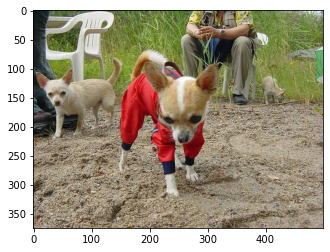

In [29]:
show_image(image_path="../data/val/n02085620-Chihuahua/n02085620_1152.jpg")

Display the first batch of images.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


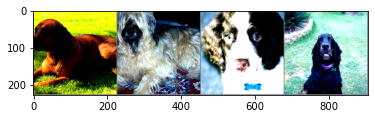

Image 1 label: Rhodesian_ridgeback
Image 2 label: briard
Image 3 label: English_springer
Image 4 label: Gordon_setter


In [36]:
# Get some random training images
dataiter = iter(dataloaders["val"])
images, labels = dataiter.next()

# Show images
show_batch_of_images(torchvision.utils.make_grid(images))

# Print labels
for i in range(len(images)):
    print(f"Image {i+1} label: {class_names[labels[i]].split('-')[1]}")

Calculate the mean and std of training images. This will be needed for the normalization transform of the dataloaders used for model training.

In [25]:
# Create dataloder for unnormalized training data
unnormalized_dataloader, _, _ = load_unnormalized_train_data("../data")

# Use the dataloader to calculate mean and std of the unnormalized images
# Note: the images have been rescaled to (0, 1) by transforms.ToTensor()
train_data_mean, train_data_std = get_mean_std(unnormalized_dataloader)

print(f"Mean of training data: {train_data_mean}")
print(f"Std of training data: {train_data_std}")

Calculating mean...
Calculating std...
Mean of training data: tensor([0.4777, 0.4451, 0.3876])
Std of training data: tensor([0.2597, 0.2527, 0.2549])


### Create and Register AML Dataset

Register the data as a file dataset in the AML workspace for easy accessibility throughout the ML lifecycle.

In [26]:
# Create a dataset object from the datastore location
dataset = Dataset.File.from_files(path=(datastore, "data/stanford_dogs"))

In [27]:
# Register the dataset
dataset = dataset.register(workspace=ws,
                           name="stanford-dogs-dataset",
                           description="Stanford Dogs Dataset containing training, validation and test data",
                           create_new_version=True)